In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files

In [ ]:
!cp /content/drive/MyDrive/thesis.py /content

In [ ]:
import thesis
#def IMPORT():
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis Dataset/CHF_USD_15min.csv')
df.dropna(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

df.set_index('timestamp', inplace=True)
print(df.shape)
df.head()

(74218, 4)


,open,close,low,high
timestamp,,,,
2020-01-01 17:00:00,0.96645,0.96831,0.96597,0.96831
2020-01-01 17:15:00,0.96820,0.96595,0.96531,0.96831
2020-01-01 17:30:00,0.96519,0.96611,0.96512,0.96614
2020-01-01 17:45:00,0.96610,0.96623,0.96610,0.96624
2020-01-01 18:00:00,0.96813,0.96689,0.96678,0.96813


In [ ]:
df=thesis.AddingColumn(df)
print(df.shape)
df.head()

(74217, 12)


/content/thesis.py:42: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week'] = df.index.week


,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price
timestamp,,,,,,,,,,,,
2020-01-01 17:00:00,0.96645,0.96831,0.96597,0.96831,0.96595,17,2,1,-0.00186,0.967140,0.00234,0.967260
2020-01-01 17:15:00,0.96820,0.96595,0.96531,0.96831,0.96611,17,2,1,0.00225,0.966810,0.00300,0.966942
2020-01-01 17:30:00,0.96519,0.96611,0.96512,0.96614,0.96623,17,2,1,-0.00092,0.965630,0.00102,0.965640
2020-01-01 17:45:00,0.96610,0.96623,0.96610,0.96624,0.96689,17,2,1,-0.00013,0.966170,0.00014,0.966167
2020-01-01 18:00:00,0.96813,0.96689,0.96678,0.96813,0.96708,18,2,1,0.00124,0.967455,0.00135,0.967483


In [ ]:
df=thesis.ApplyPCA(df)
df.head()

,open,close,low,high,previous_close,hour,day,week,momentum,avg_price,range,ohlc_price,pca
timestamp,,,,,,,,,,,,,
2020-01-01 17:00:00,0.96645,0.96831,0.96597,0.96831,0.96595,17,2,1,-0.00186,0.967140,0.00234,0.967260,-25.514984
2020-01-01 17:15:00,0.96820,0.96595,0.96531,0.96831,0.96611,17,2,1,0.00225,0.966810,0.00300,0.966942,-25.514841
2020-01-01 17:30:00,0.96519,0.96611,0.96512,0.96614,0.96623,17,2,1,-0.00092,0.965630,0.00102,0.965640,-25.514837
2020-01-01 17:45:00,0.96610,0.96623,0.96610,0.96624,0.96689,17,2,1,-0.00013,0.966170,0.00014,0.966167,-25.514847
2020-01-01 18:00:00,0.96813,0.96689,0.96678,0.96813,0.96708,18,2,1,0.00124,0.967455,0.00135,0.967483,-25.515293


In [ ]:
X = df.drop('close', axis=1)
print(X.head())
y=pd.DataFrame(df['close'])
print(y.head())

                        open      low     high  previous_close  hour  day  \
timestamp                                                                   
2020-01-01 17:00:00  0.96645  0.96597  0.96831         0.96595    17    2   
2020-01-01 17:15:00  0.96820  0.96531  0.96831         0.96611    17    2   
2020-01-01 17:30:00  0.96519  0.96512  0.96614         0.96623    17    2   
2020-01-01 17:45:00  0.96610  0.96610  0.96624         0.96689    17    2   
2020-01-01 18:00:00  0.96813  0.96678  0.96813         0.96708    18    2   

                     week  momentum  avg_price    range  ohlc_price        pca  
timestamp                                                                       
2020-01-01 17:00:00     1  -0.00186   0.967140  0.00234    0.967260 -25.514984  
2020-01-01 17:15:00     1   0.00225   0.966810  0.00300    0.966942 -25.514841  
2020-01-01 17:30:00     1  -0.00092   0.965630  0.00102    0.965640 -25.514837  
2020-01-01 17:45:00     1  -0.00013   0.966170  0.00014

In [ ]:
x_train, y_train, x_val, y_val, x_test, y_test = thesis.Train_Val_Test_split_15Min(X,y)

59373
59373
7500
7500
7344
7344


In [ ]:
x_train = x_train.values.astype('float32')
x_train=thesis.NormalizeDataset(x_train)

y_train = y_train.values.astype('float32')
y_train = np.reshape(y_train, (-1, 1))
y_train=thesis.NormalizeDataset(y_train)

x_train.shape



(59373, 12)

In [ ]:
x_val = x_val.values.astype('float32')
x_val=thesis.NormalizeDataset(x_val)

y_val = y_val.values.astype('float32')
y_val = np.reshape(y_val, (-1, 1))
y_val=thesis.NormalizeDataset(y_val)


In [ ]:
x_test = x_test.values.astype('float32')
x_test=thesis.NormalizeDataset(x_test)

y_test = y_test.values.astype('float32')
y_test = np.reshape(y_test, (-1, 1))
y_test=thesis.NormalizeDataset(y_test)

In [ ]:
window=24
x_train, x_val, x_test = thesis.df_to_numpy_array_features(x_train, x_val, x_test, window)
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(59348, 24, 12)
(7475, 24, 12)
(7319, 24, 12)


In [ ]:
y_train, y_val, y_test= thesis.df_to_numpy_array_target(y_train, y_val, y_test, window)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)
y_train

(59348, 1)
(7475, 1)
(7319, 1)


array([[0.7150121],
       [0.7166295],
       [0.7172456],
       ...,
       [0.7499037],
       [0.7530618],
       [0.7513671]], dtype=float32)

In [ ]:
y_train=y_train[:,-1]
y_val=y_val[:,-1]
y_test=y_test[:,-1]
y_train

array([0.7150121, 0.7166295, 0.7172456, ..., 0.7499037, 0.7530618,
       0.7513671], dtype=float32)

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 544.4337 - mae: 8.0610 - mse: 544.4337 - root_mean_squared_error: 23.3331 - mape: 42495.7539
Epoch 1: val_mse improved from inf to 2.55160, saving model to weights.best.hdf5
464/464 [==============================] - 137s 279ms/step - loss: 544.4337 - mae: 8.0610 - mse: 544.4337 - root_mean_squared_error: 23.3331 - mape: 42495.7539 - val_loss: 2.5516 - val_mae: 1.5867 - val_mse: 2.5516 - val_root_mean_squared_error: 1.5974 - val_mape: 270347.8438
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 1.4751 - mae: 1.1678 - mse: 1.4751 - root_mean_squared_error: 1.2145 - mape: 24980.7676
Epoch 2: val_mse improved from 2.55160 to 0.61550, saving model to weights.best.hdf5
464/464 [==============================] - 134s 289ms/step - loss: 1.4751 - mae: 1.1678 - mse: 1.4751 - root_mean_squared_error: 1.2145 - mape: 24980.7676 - val_loss: 0.6155 - val_mae: 0.7626 - val_mse: 0.6155 - val_root_mean_squared_er

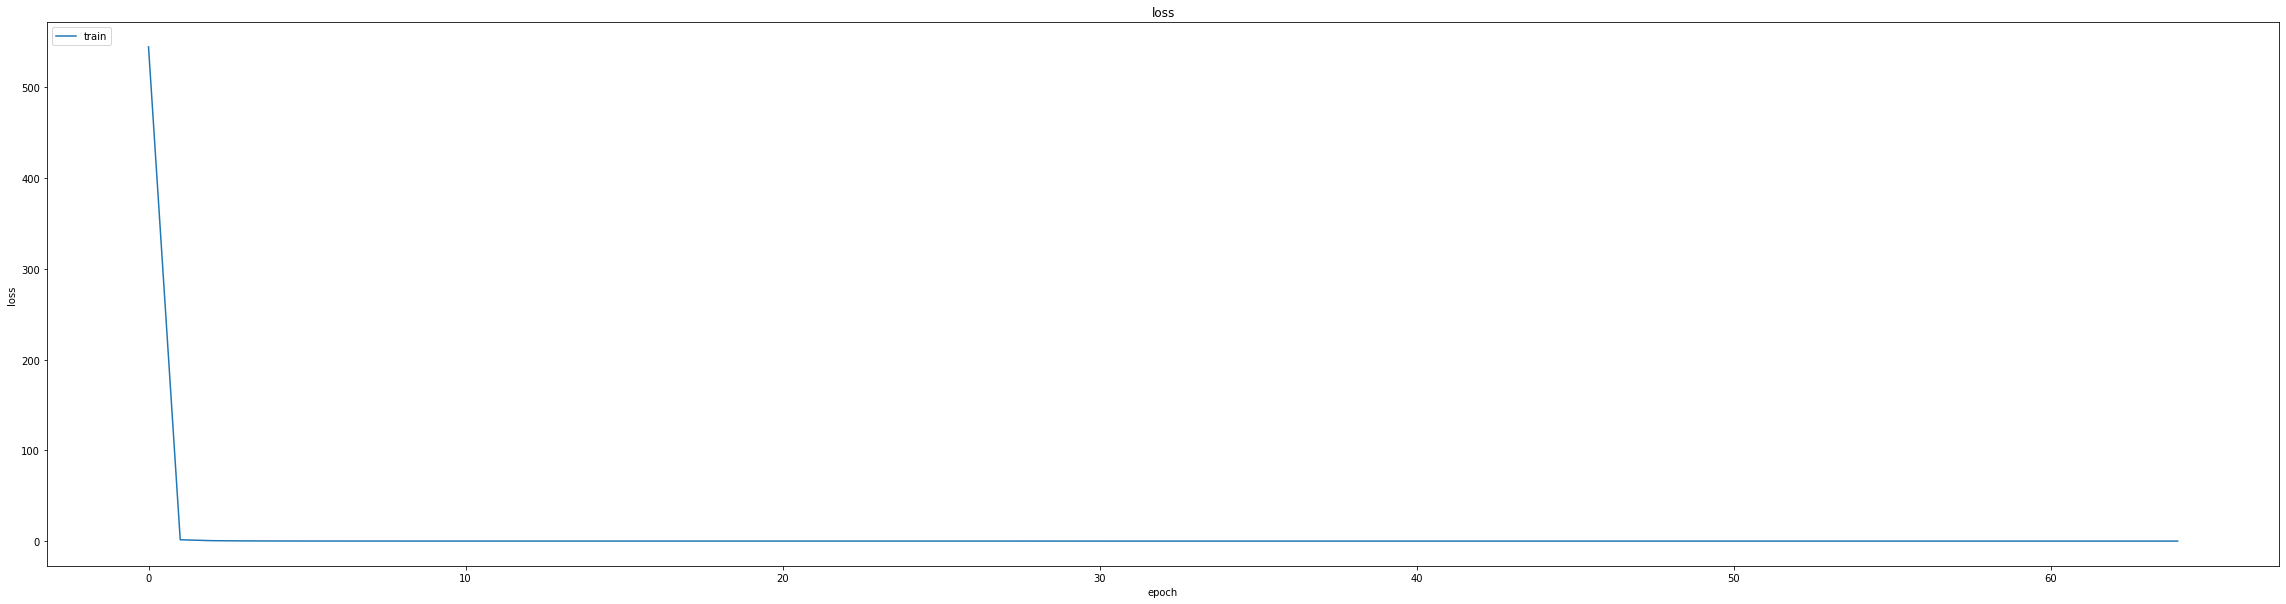

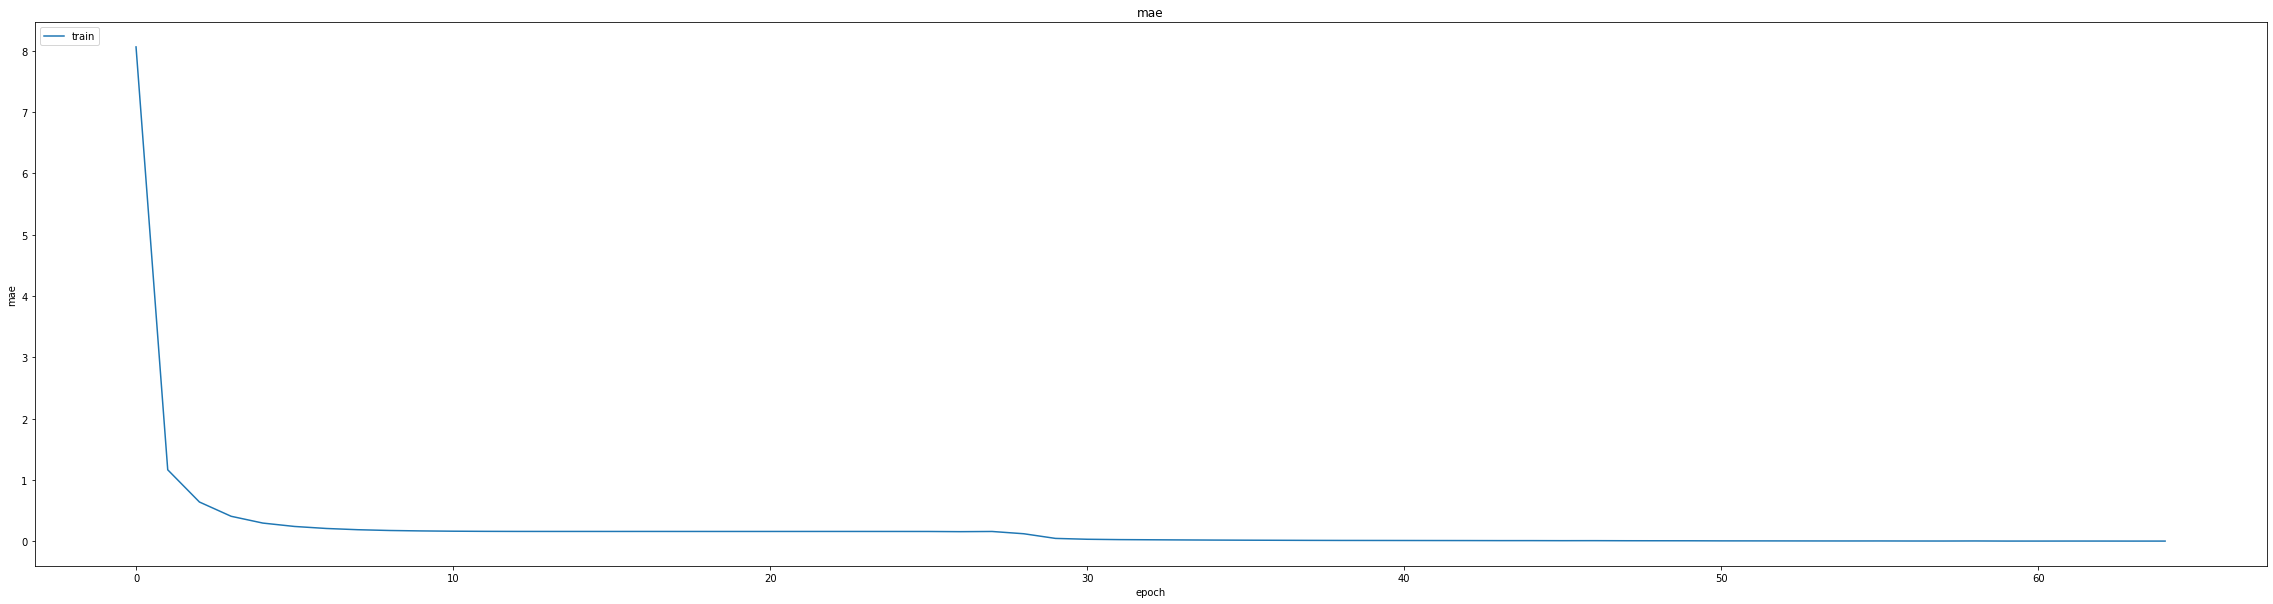

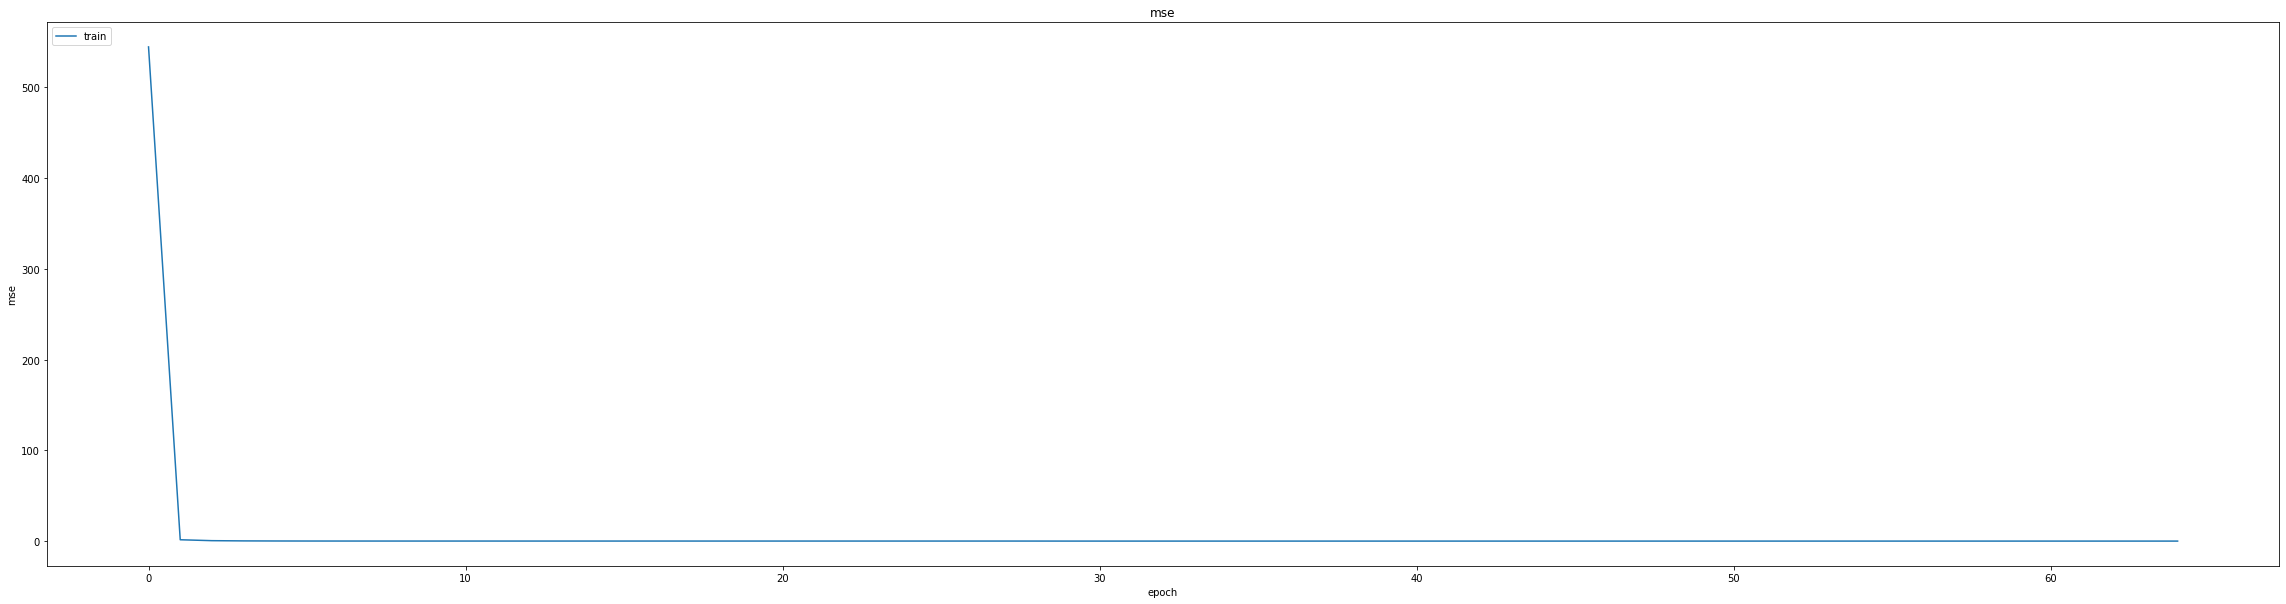

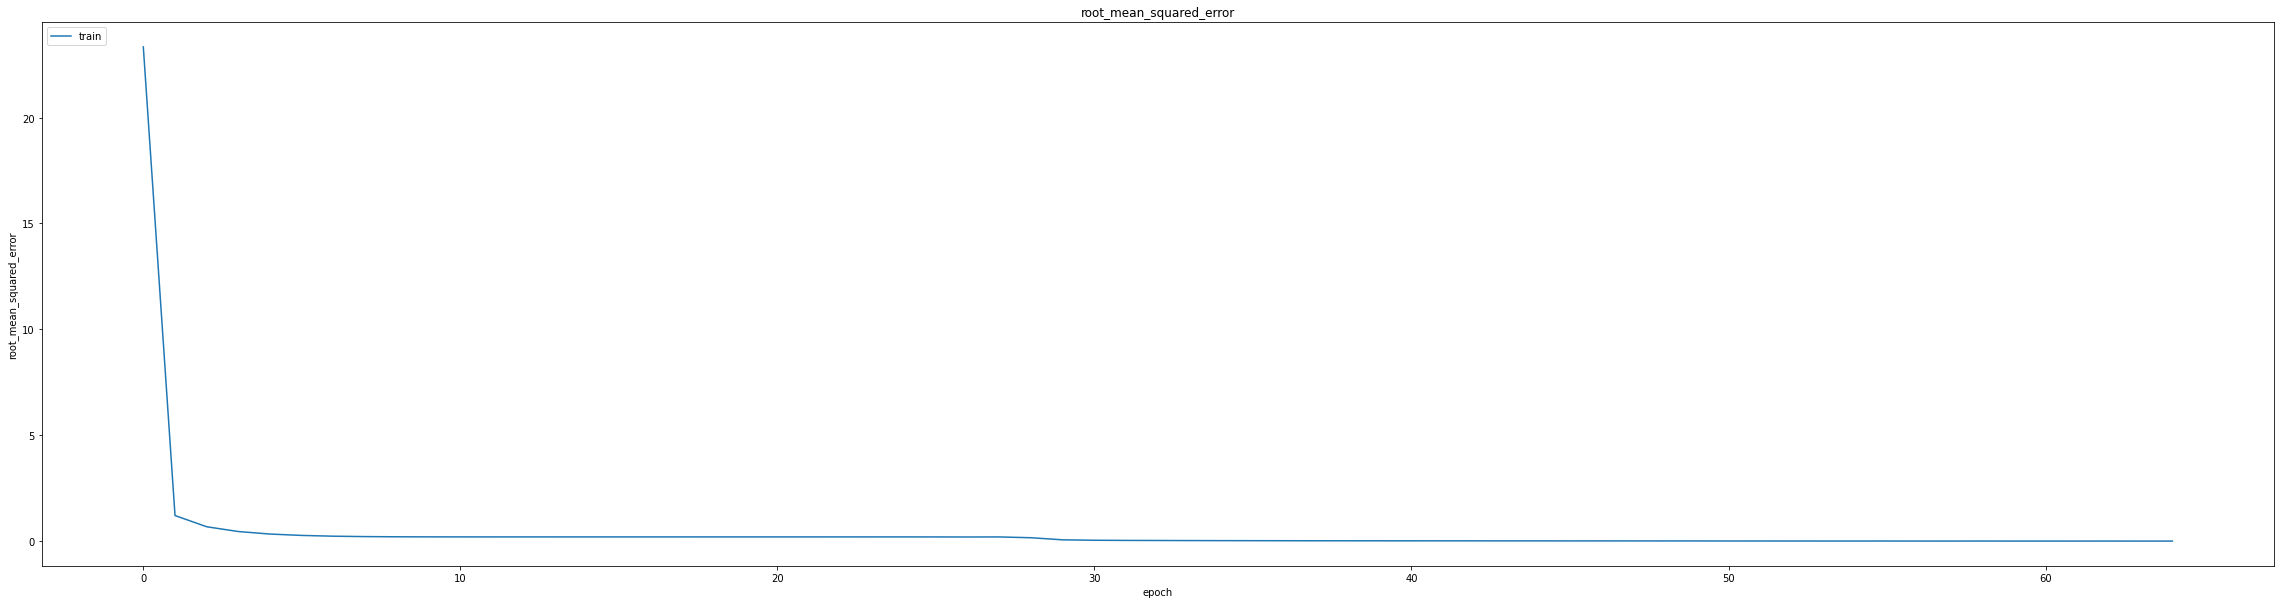

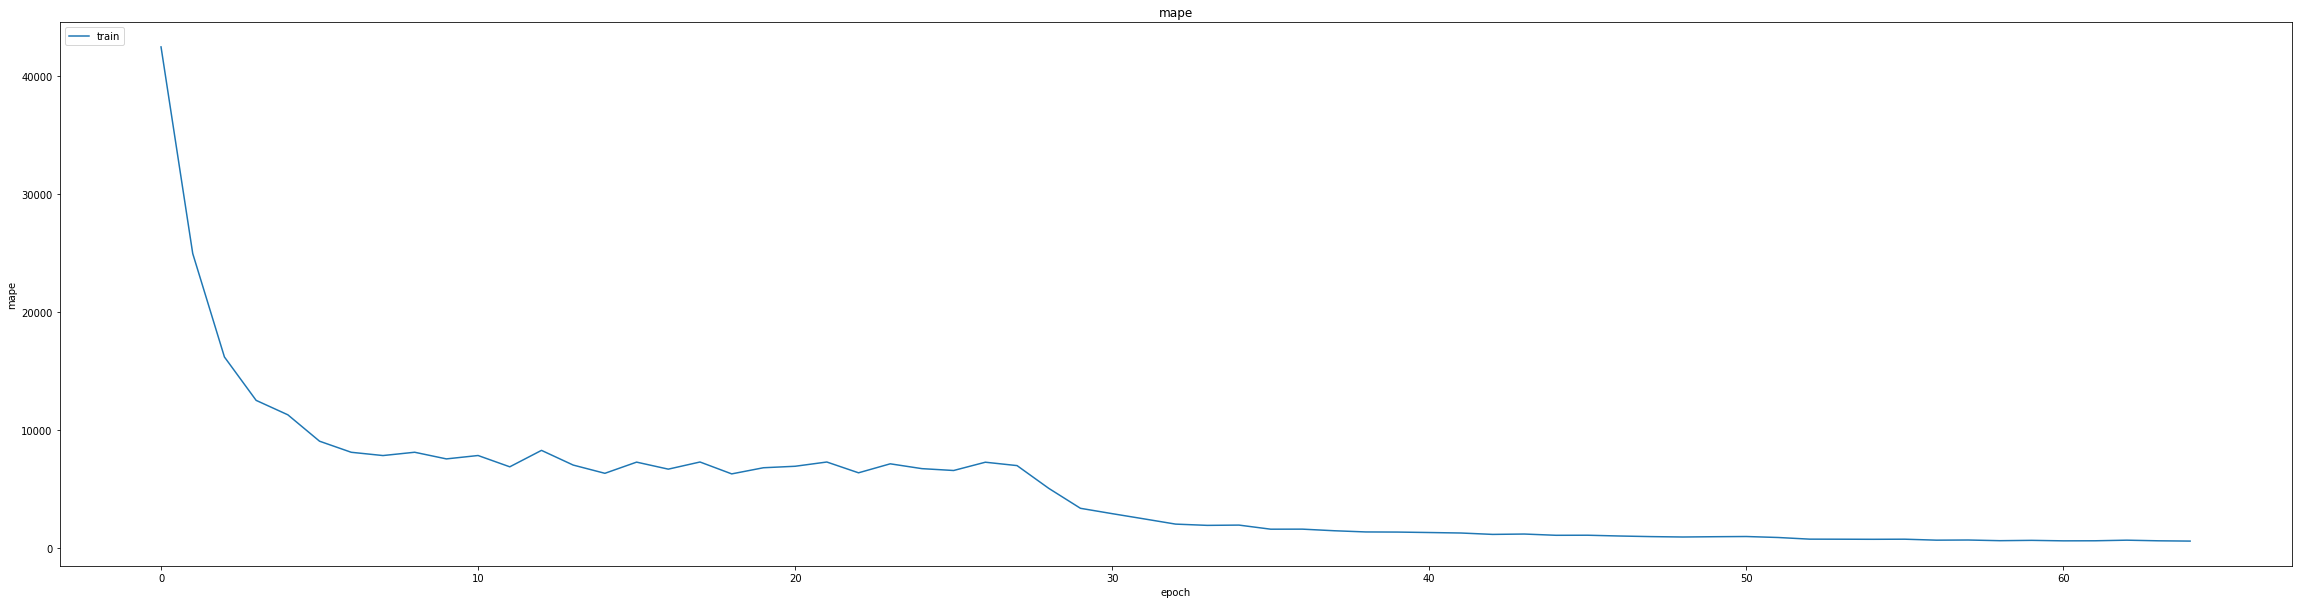

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.027057211846113205
0.0370195172727108
234/234 [==============================] - 11s 41ms/step
0.8886861091525172


In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 0.0045 - mae: 0.0357 - mse: 0.0045 - root_mean_squared_error: 0.0669 - mape: 1840.3459
Epoch 1: val_mse did not improve from 0.00137
464/464 [==============================] - 137s 281ms/step - loss: 0.0045 - mae: 0.0357 - mse: 0.0045 - root_mean_squared_error: 0.0669 - mape: 1840.3459 - val_loss: 0.0024 - val_mae: 0.0380 - val_mse: 0.0024 - val_root_mean_squared_error: 0.0489 - val_mape: 12754.9443 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 4.5785e-04 - mae: 0.0161 - mse: 4.5785e-04 - root_mean_squared_error: 0.0214 - mape: 1799.6481
Epoch 2: val_mse did not improve from 0.00137
464/464 [==============================] - 130s 280ms/step - loss: 4.5785e-04 - mae: 0.0161 - mse: 4.5785e-04 - root_mean_squared_error: 0.0214 - mape: 1799.6481 - val_loss: 0.0033 - val_mae: 0.0470 - val_mse: 0.0033 - val_root_mean_squared_error: 0.0572 - val_mape: 11499.0254 - lr: 0.0010
lr changed t

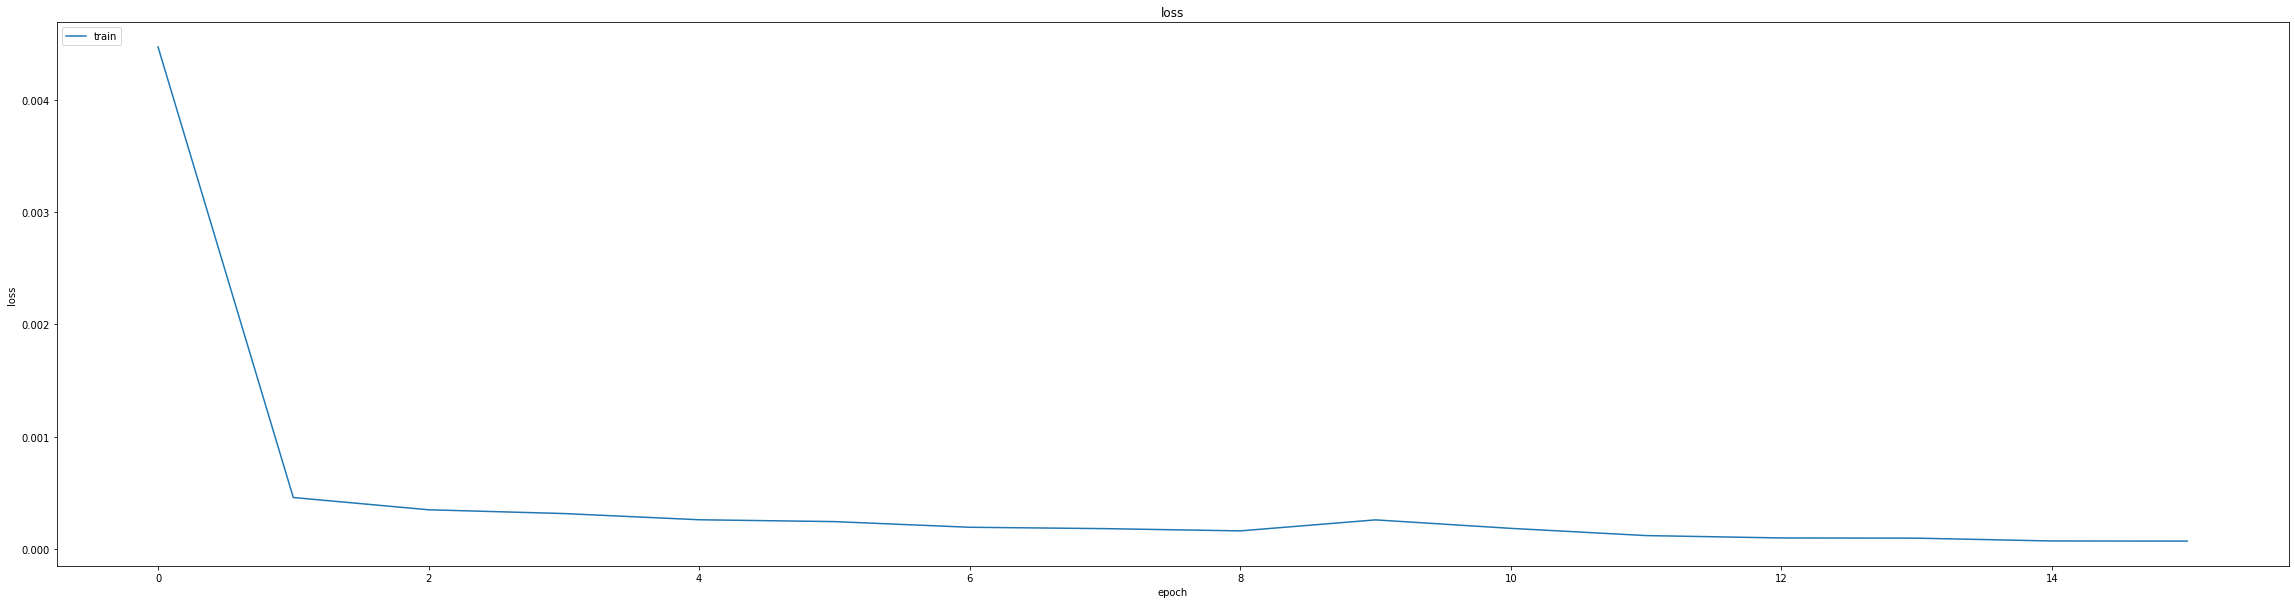

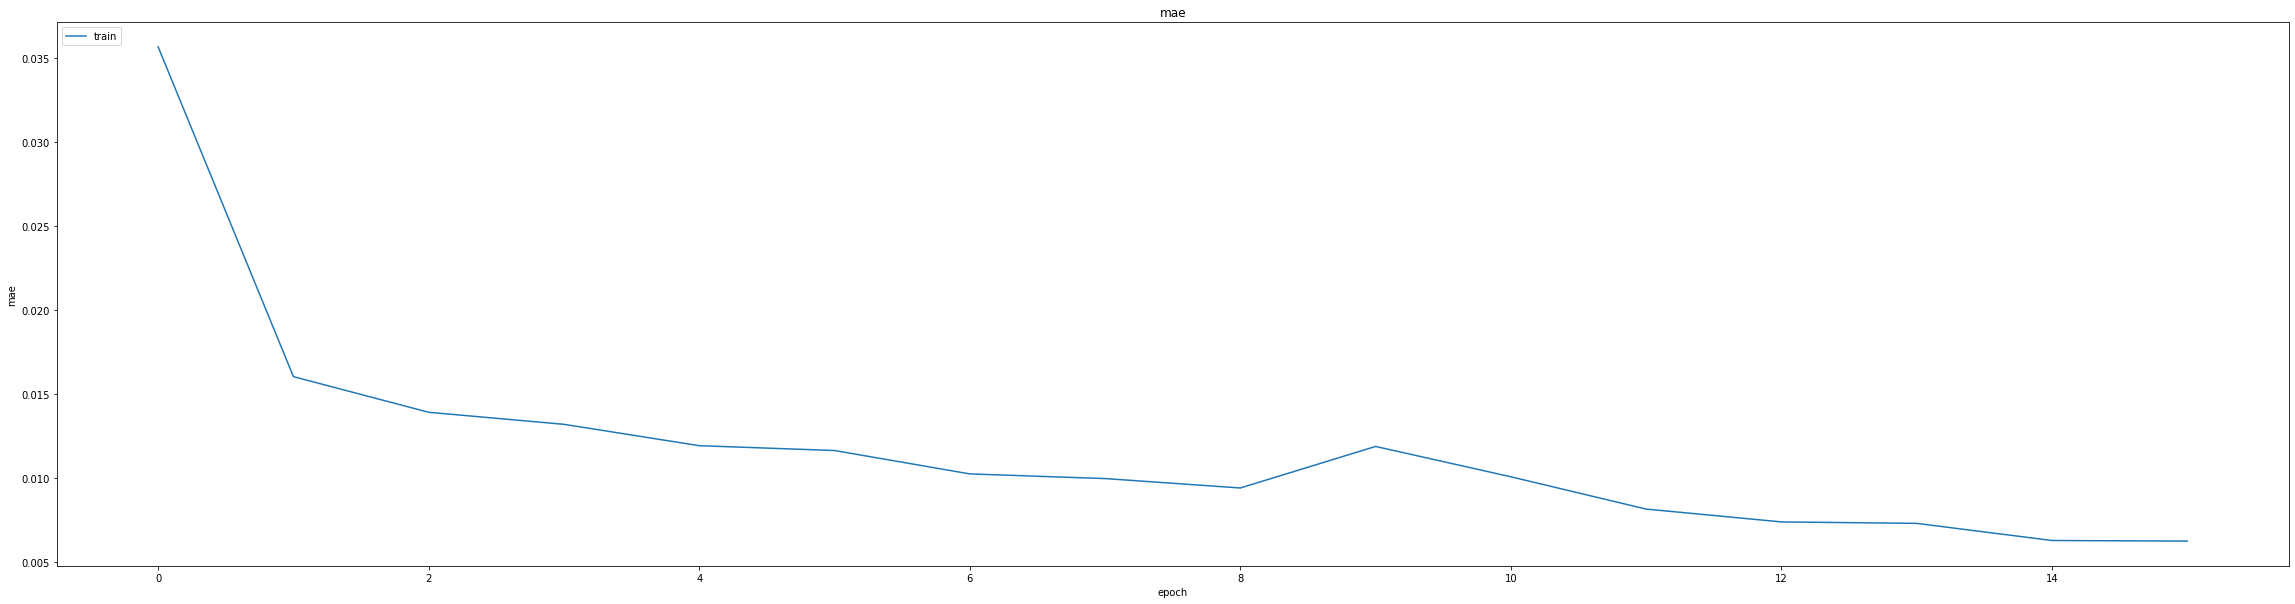

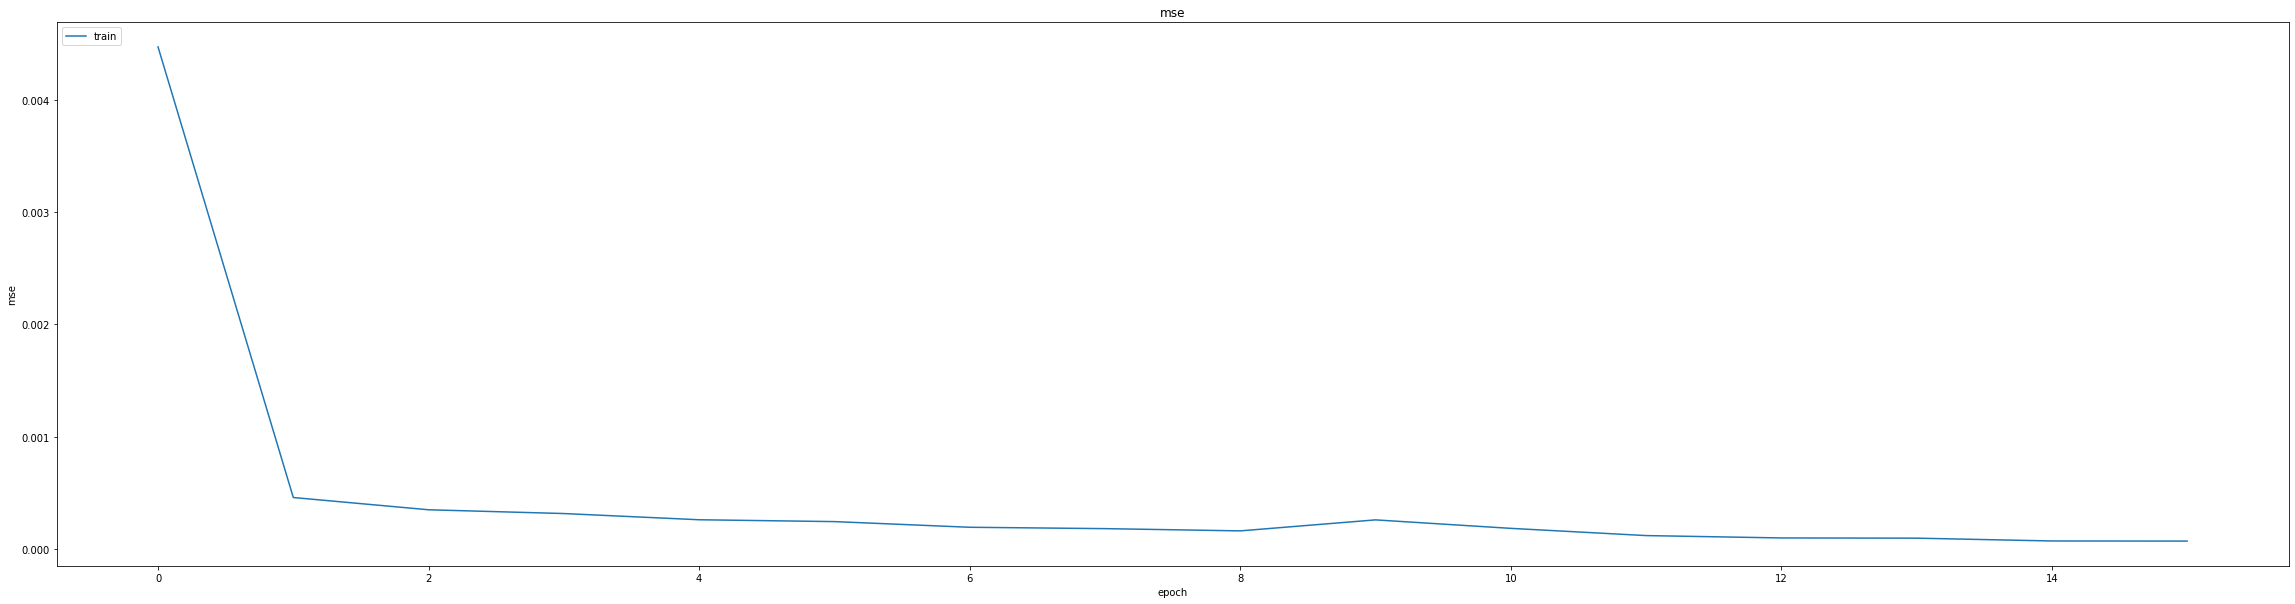

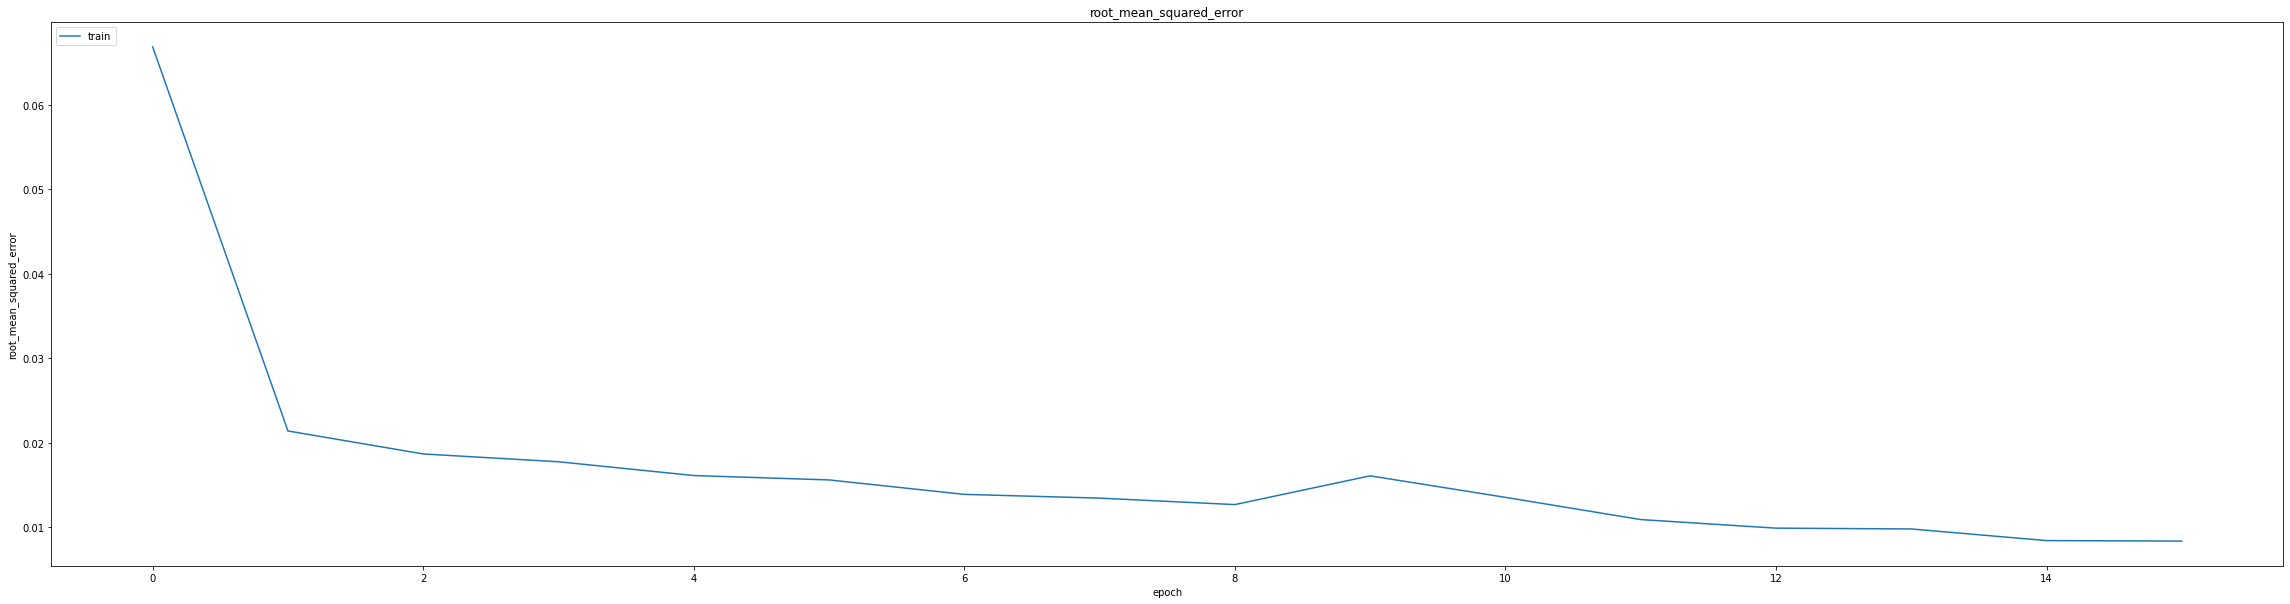

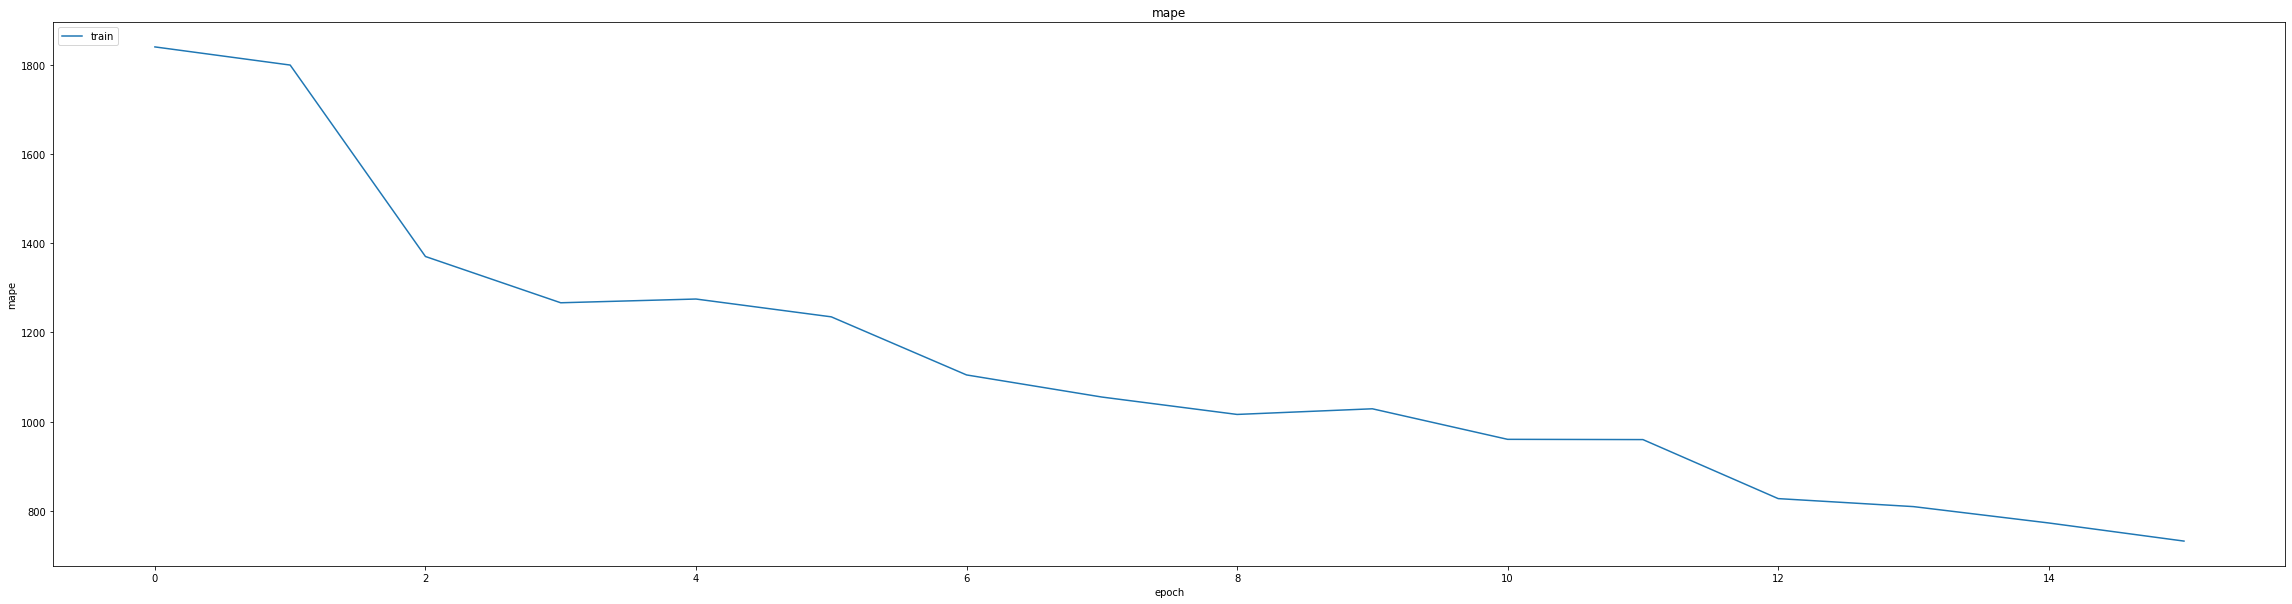

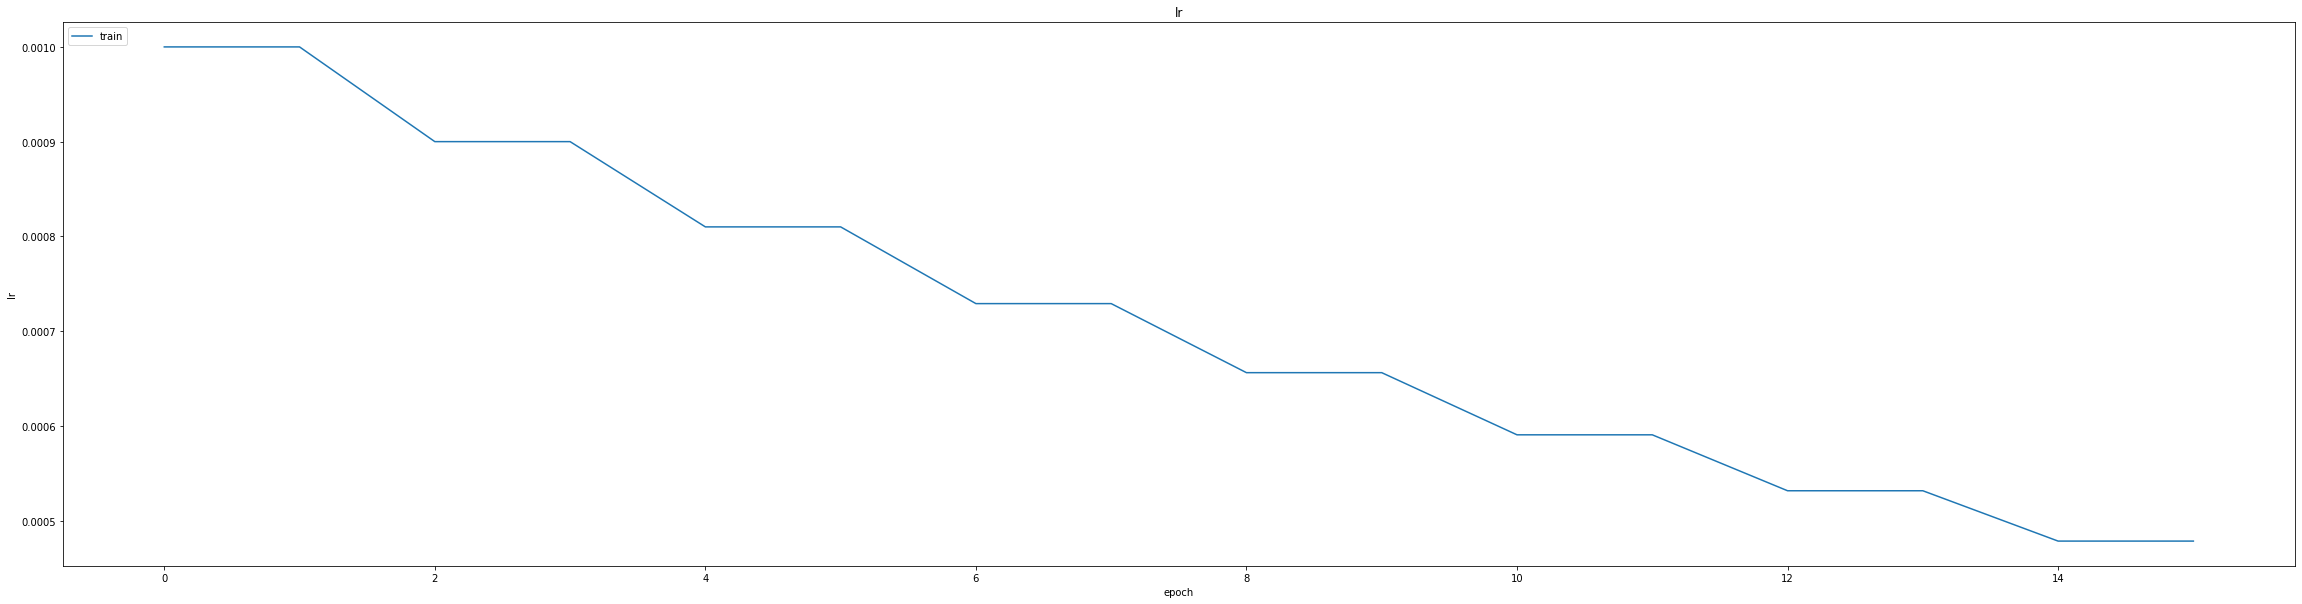

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.038007110357284546
0.04885326325893402
234/234 [==============================] - 10s 38ms/step
0.779574057484095


234/234 [==============================] - 9s 38ms/step


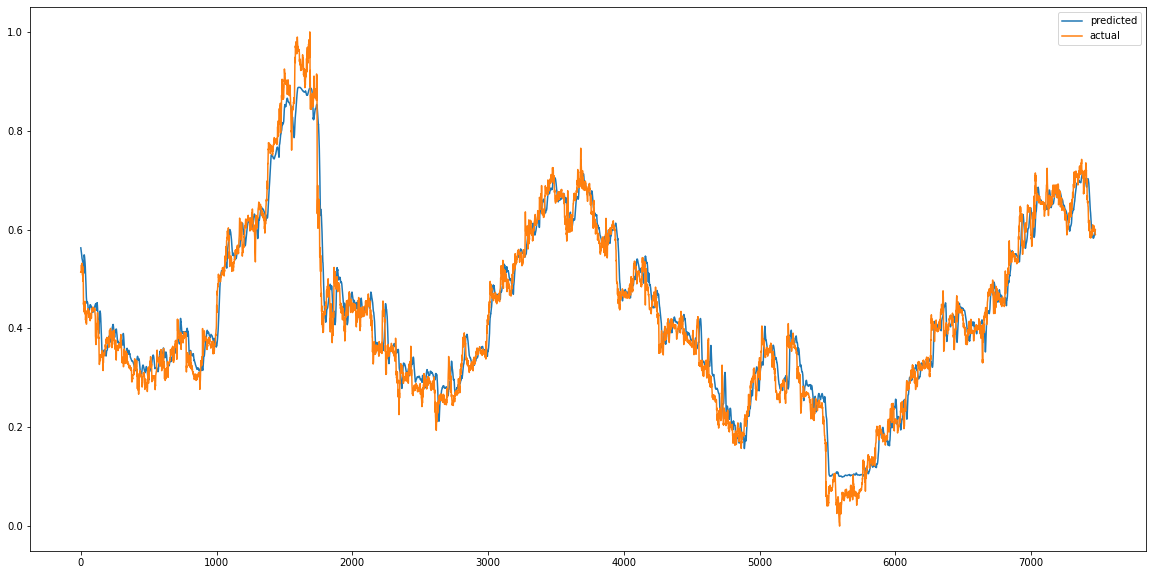

In [ ]:
model.load_weights("weights.best.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


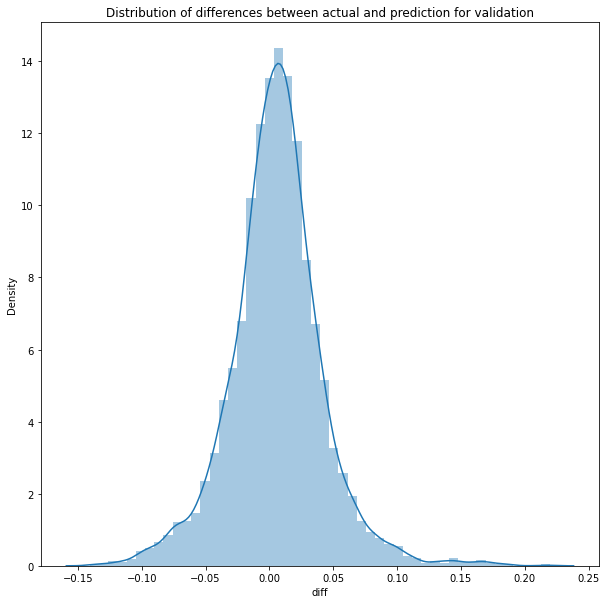

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 9s 38ms/step


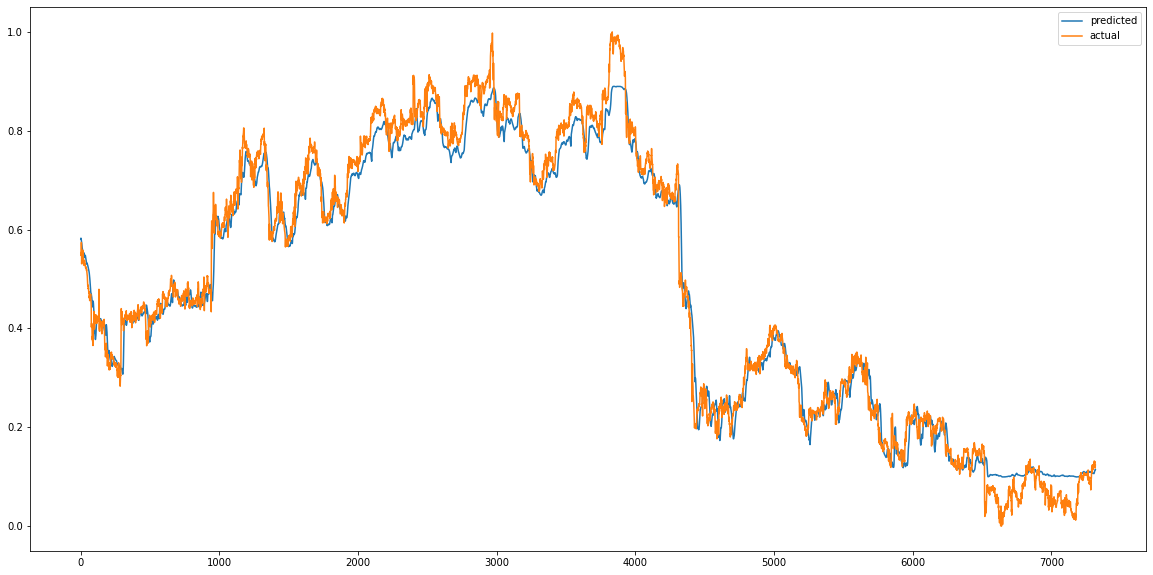

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


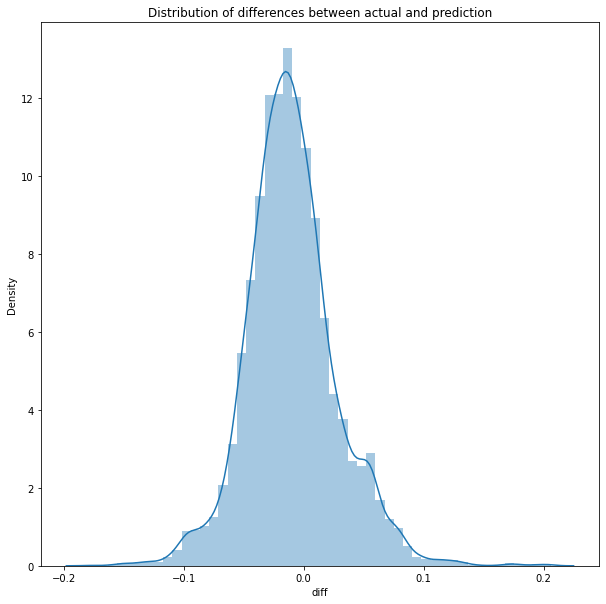

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0015261498664940068
MAE :  0.03011269970439565
RMSE  : 0.0390659681371652
229/229 [==============================] - 9s 39ms/step
R2_Score  : 0.9809543243806529


count    7319.000000
mean       -0.010001
std         0.037767
min        -0.178797
25%        -0.032724
50%        -0.012609
75%         0.009822
max         0.205853
Name: diff, dtype: float64

In [ ]:
TargetIndex = df.columns.tolist().index('close')
HighIndex = df.columns.tolist().index('high')
LowIndex = df.columns.tolist().index('low')

In [ ]:
model= thesis.CNN_BiLSTM_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 bidirectional (Bidirectiona  (None, 24, 256)          197632    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                5

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 464.0299 - mae: 3.5025 - mse: 464.0299 - root_mean_squared_error: 21.5414 - mape: 15226.6143
Epoch 1: val_mse improved from inf to 0.04155, saving model to weights.best.hdf5
464/464 [==============================] - 155s 317ms/step - loss: 464.0299 - mae: 3.5025 - mse: 464.0299 - root_mean_squared_error: 21.5414 - mape: 15226.6143 - val_loss: 0.0415 - val_mae: 0.1719 - val_mse: 0.0415 - val_root_mean_squared_error: 0.2038 - val_mape: 68676.0547
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.0477 - mae: 0.1868 - mse: 0.0477 - root_mean_squared_error: 0.2184 - mape: 7989.4604
Epoch 2: val_mse improved from 0.04155 to 0.03601, saving model to weights.best.hdf5
464/464 [==============================] - 142s 305ms/step - loss: 0.0477 - mae: 0.1868 - mse: 0.0477 - root_mean_squared_error: 0.2184 - mape: 7989.4604 - val_loss: 0.0360 - val_mae: 0.1498 - val_mse: 0.0360 - val_root_mean_squared_error

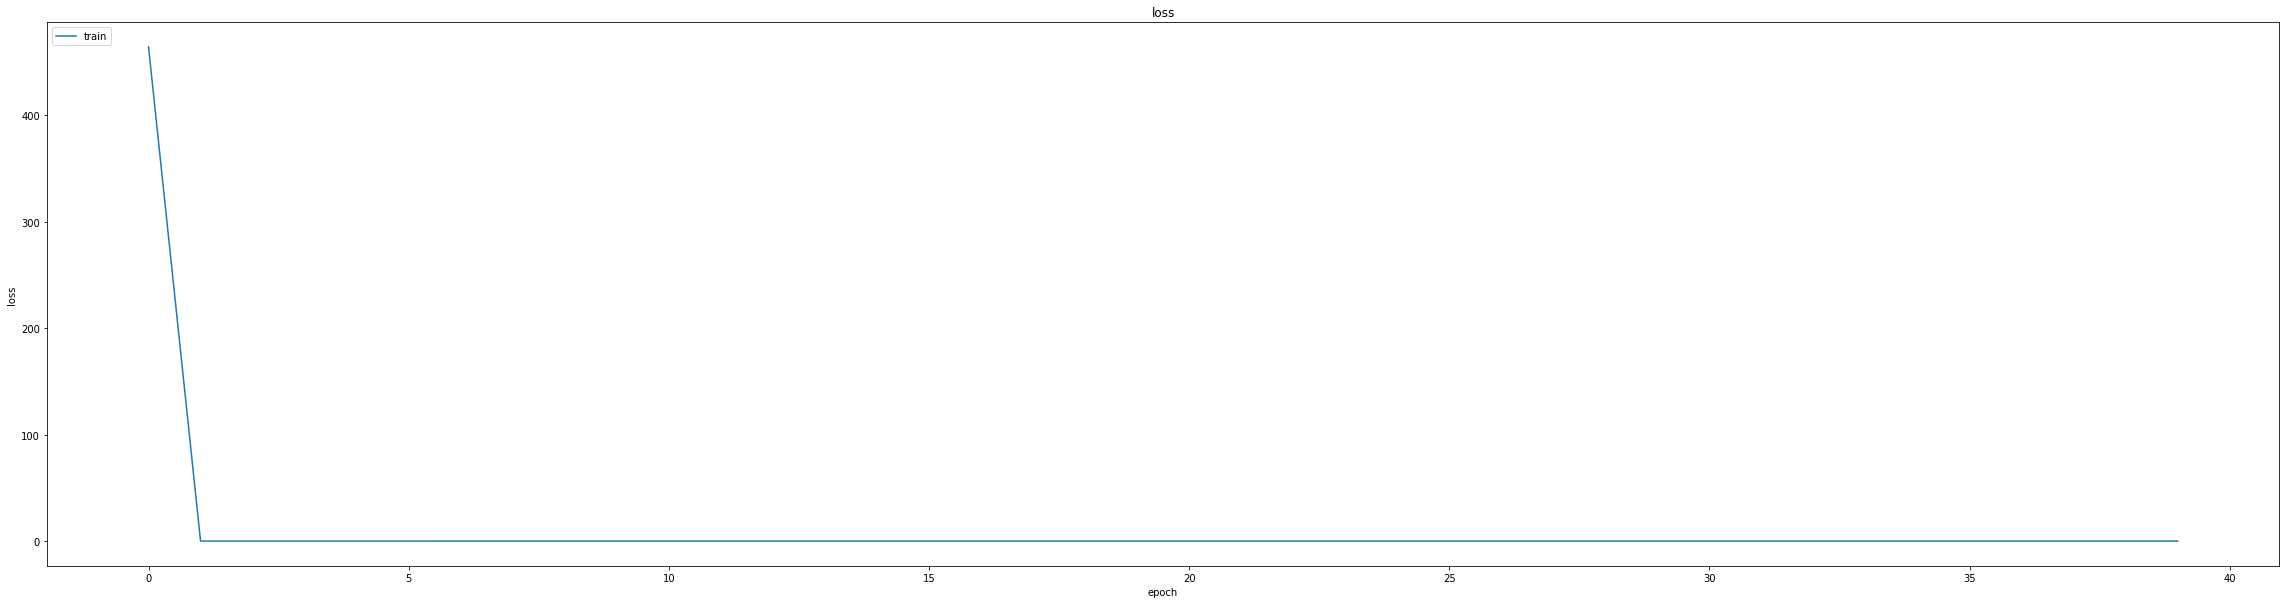

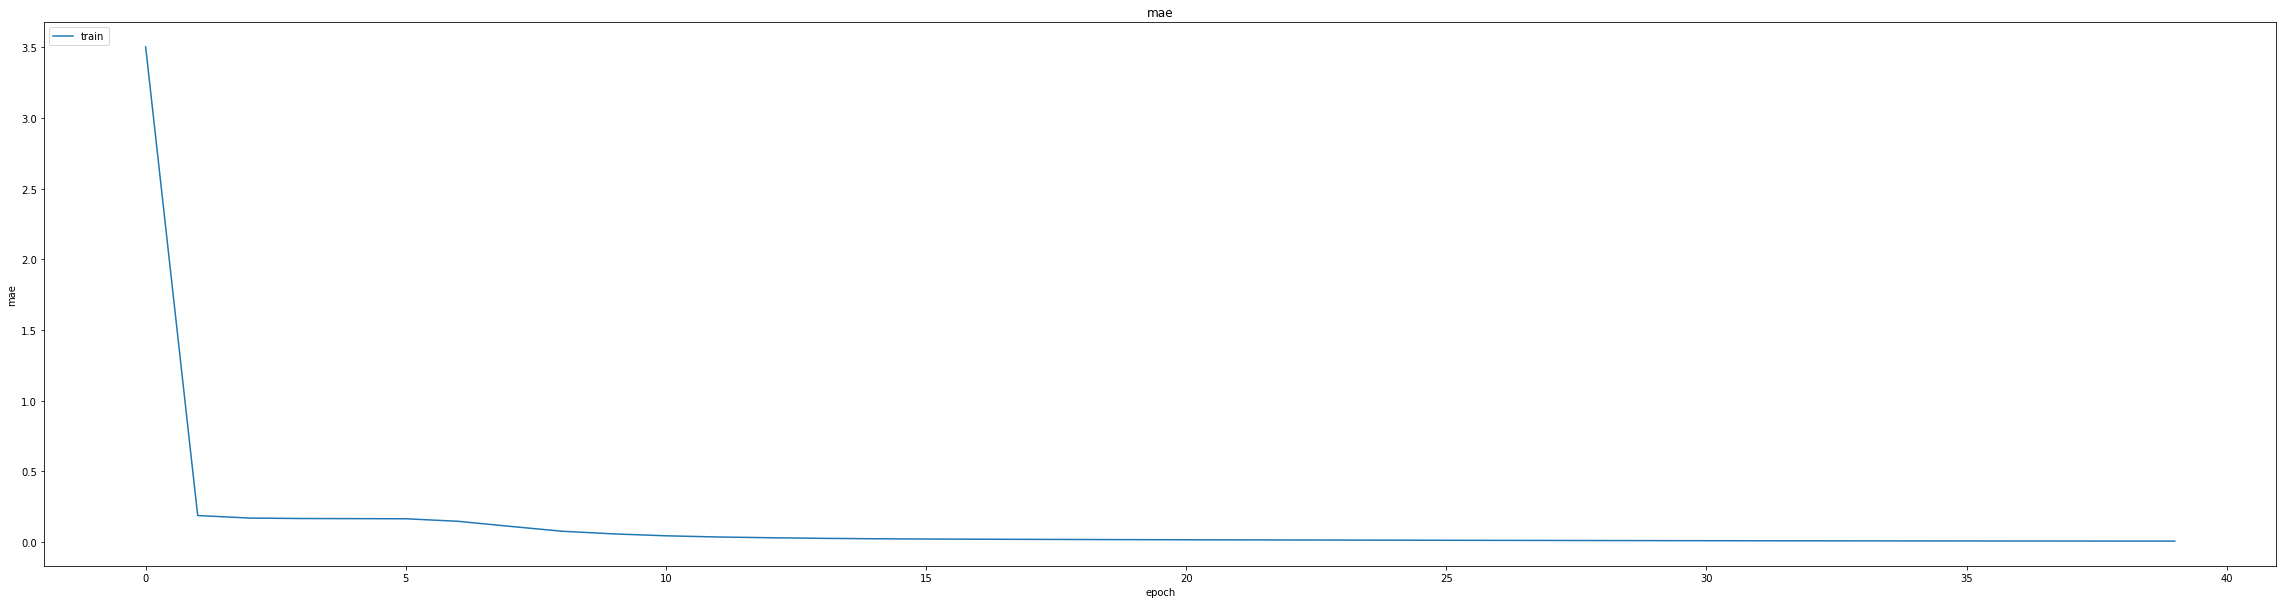

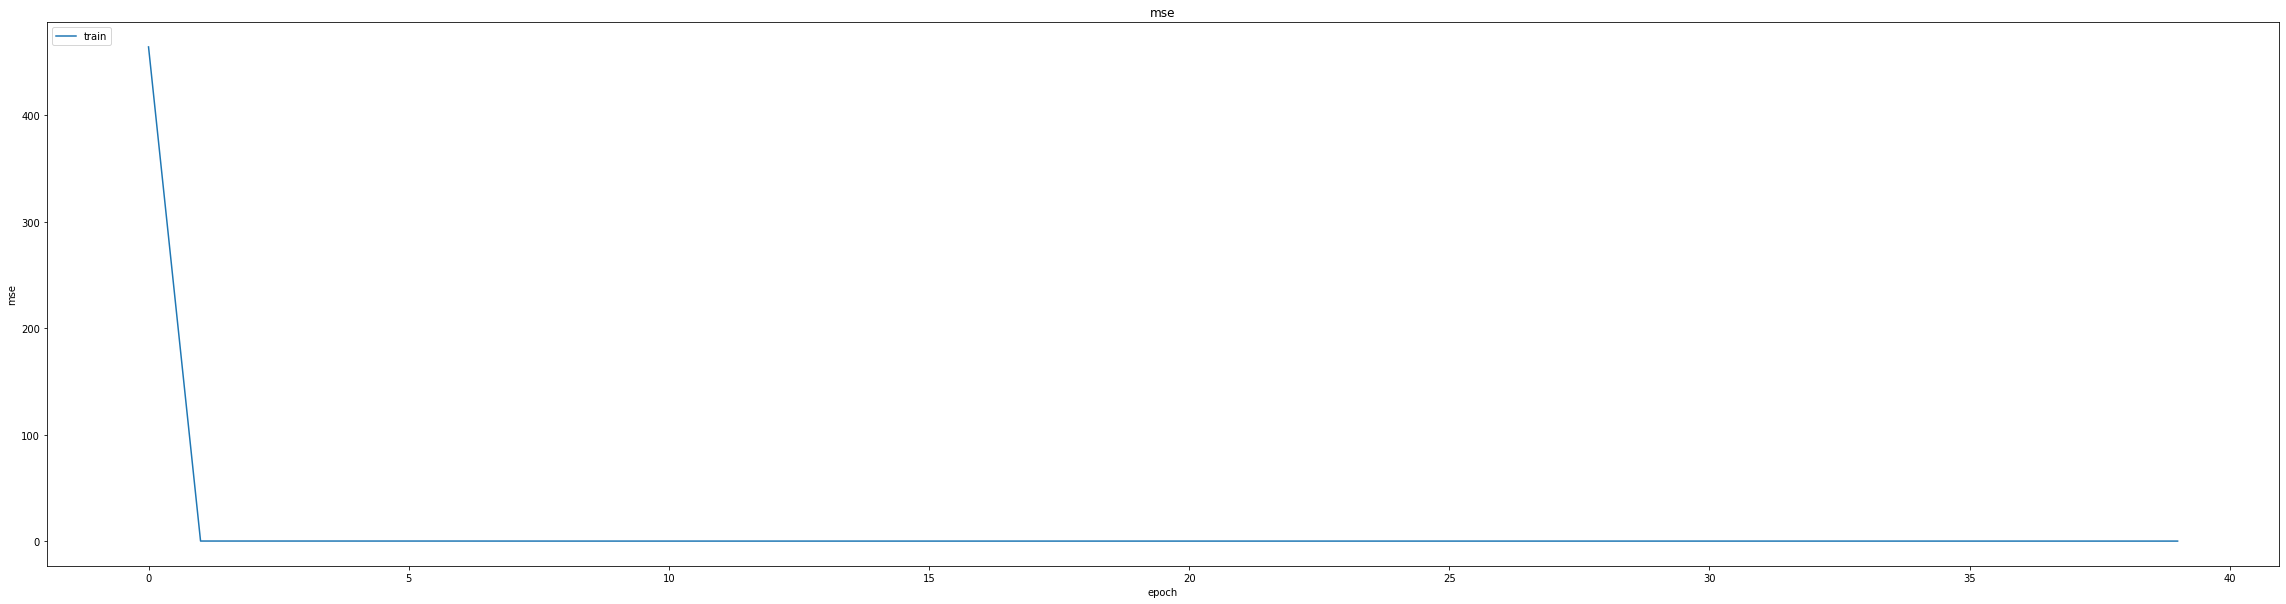

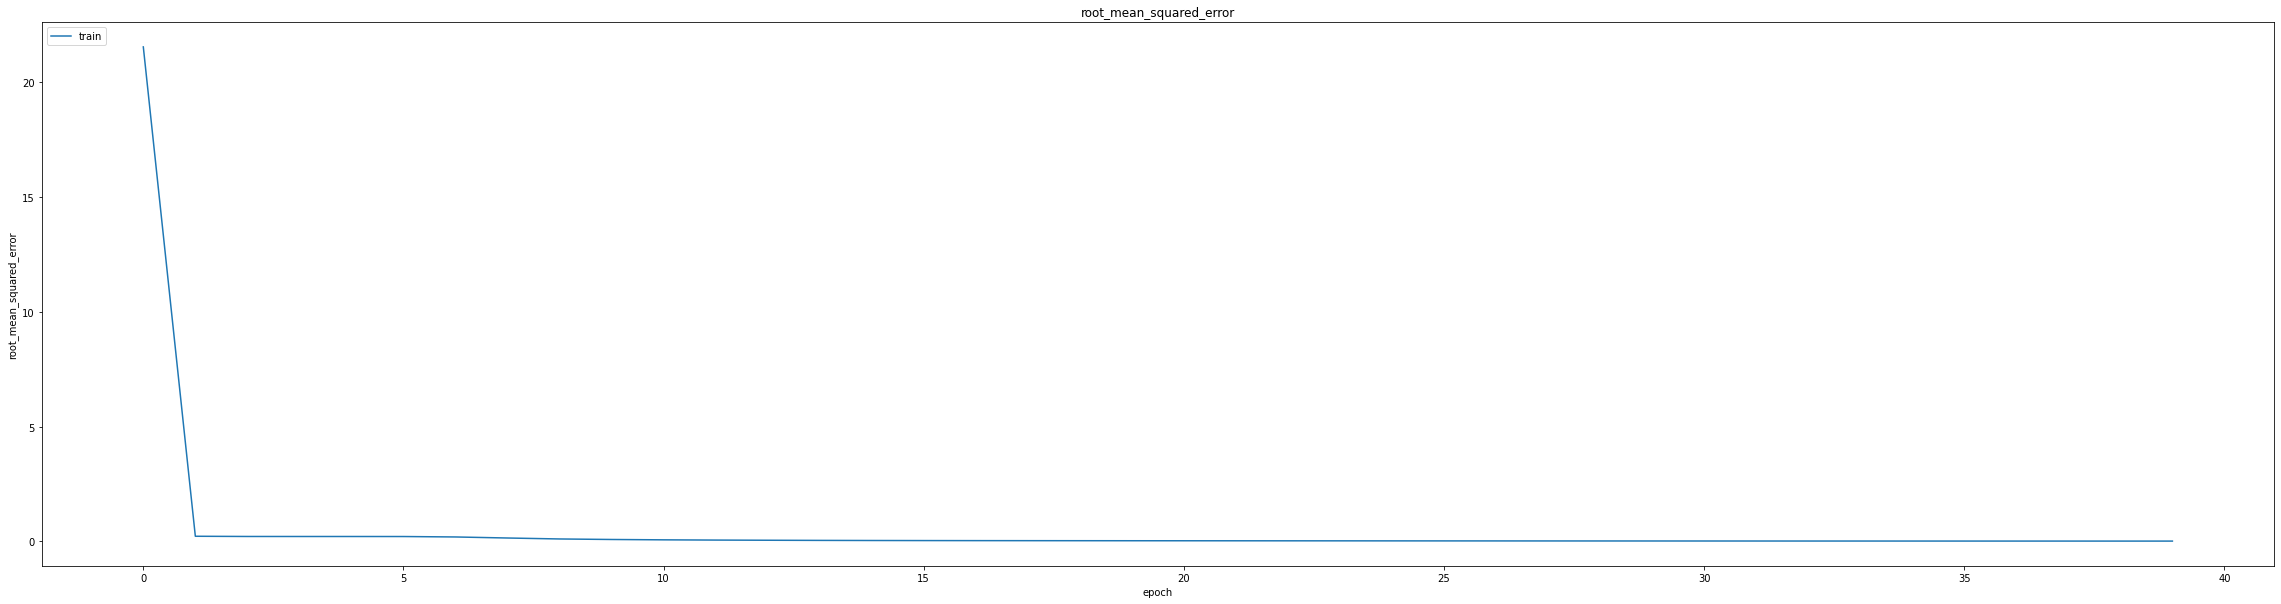

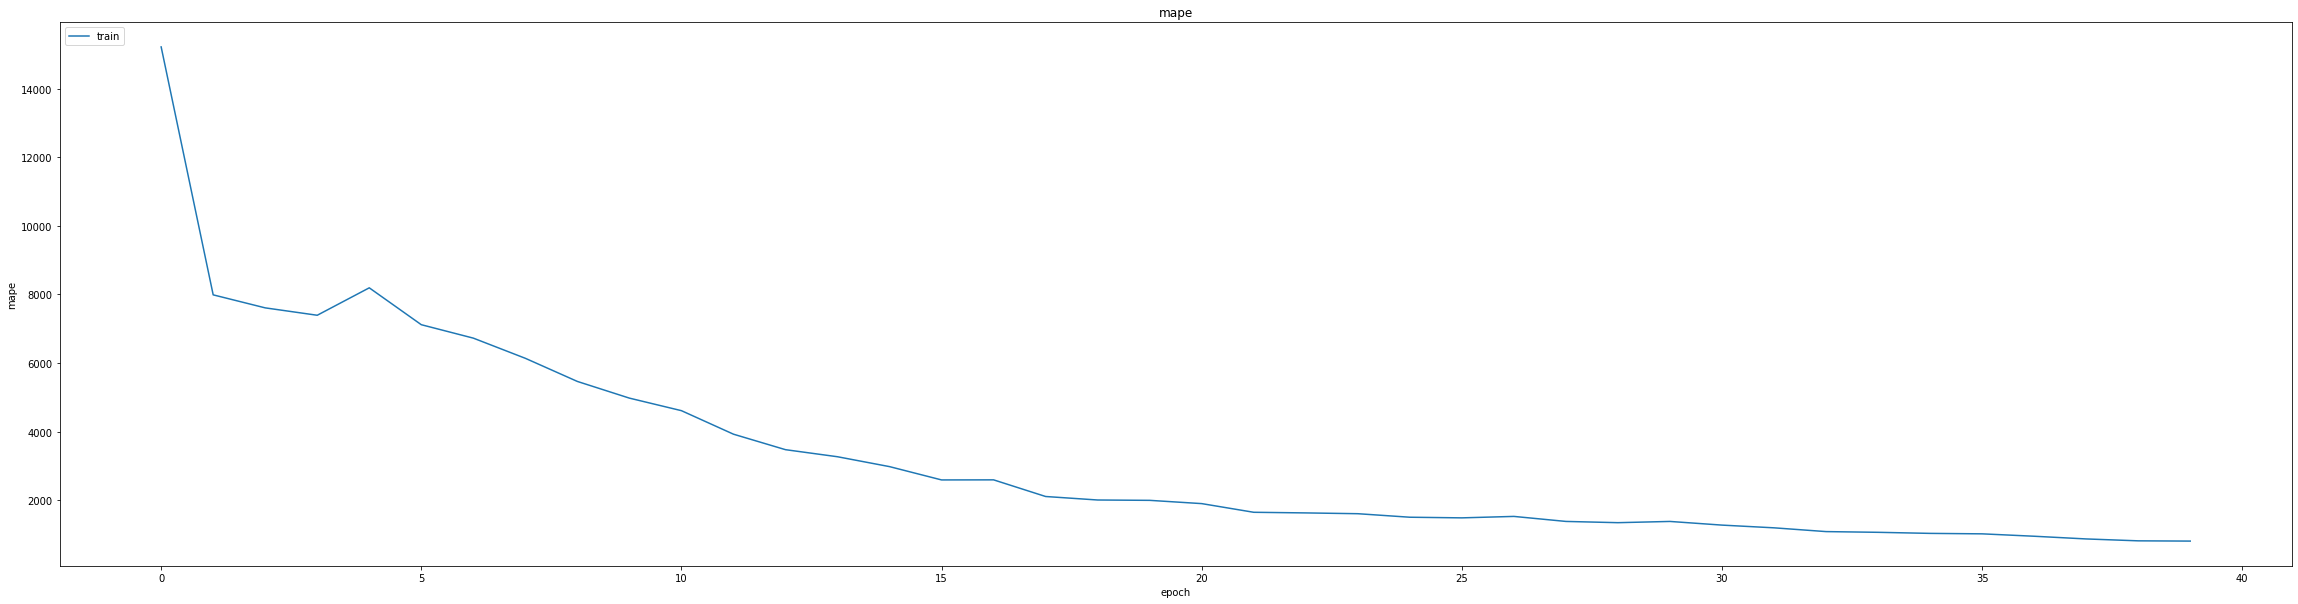

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.08299455046653748
0.10113056749105453
234/234 [==============================] - 11s 38ms/step
0.6164411056017205


In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0210 - mse: 0.0011 - root_mean_squared_error: 0.0333 - mape: 4121.4966
Epoch 1: val_mse improved from 0.01023 to 0.00375, saving model to weights.best.hdf5
464/464 [==============================] - 153s 313ms/step - loss: 0.0011 - mae: 0.0210 - mse: 0.0011 - root_mean_squared_error: 0.0333 - mape: 4121.4966 - val_loss: 0.0037 - val_mae: 0.0572 - val_mse: 0.0037 - val_root_mean_squared_error: 0.0612 - val_mape: 12868.4932 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 1.6764e-04 - mae: 0.0096 - mse: 1.6764e-04 - root_mean_squared_error: 0.0129 - mape: 1168.6747
Epoch 2: val_mse did not improve from 0.00375
464/464 [==============================] - 145s 313ms/step - loss: 1.6764e-04 - mae: 0.0096 - mse: 1.6764e-04 - root_mean_squared_error: 0.0129 - mape: 1168.6747 - val_loss: 0.0055 - val_mae: 0.0714 - val_mse: 0.0055 - val_root_mean_squared_error: 0.0741 - val_map

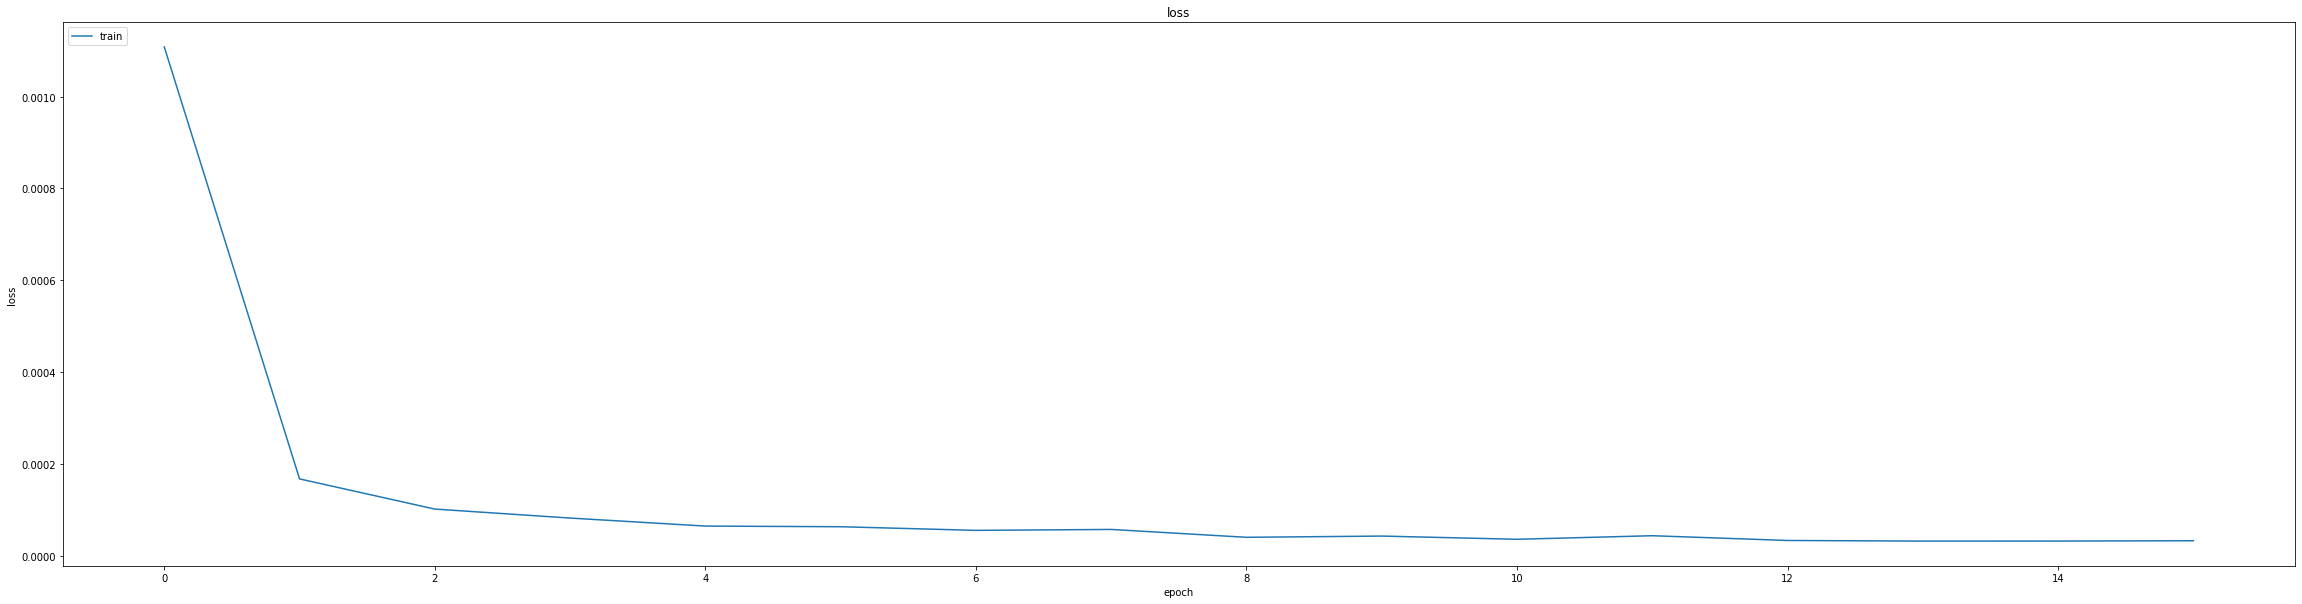

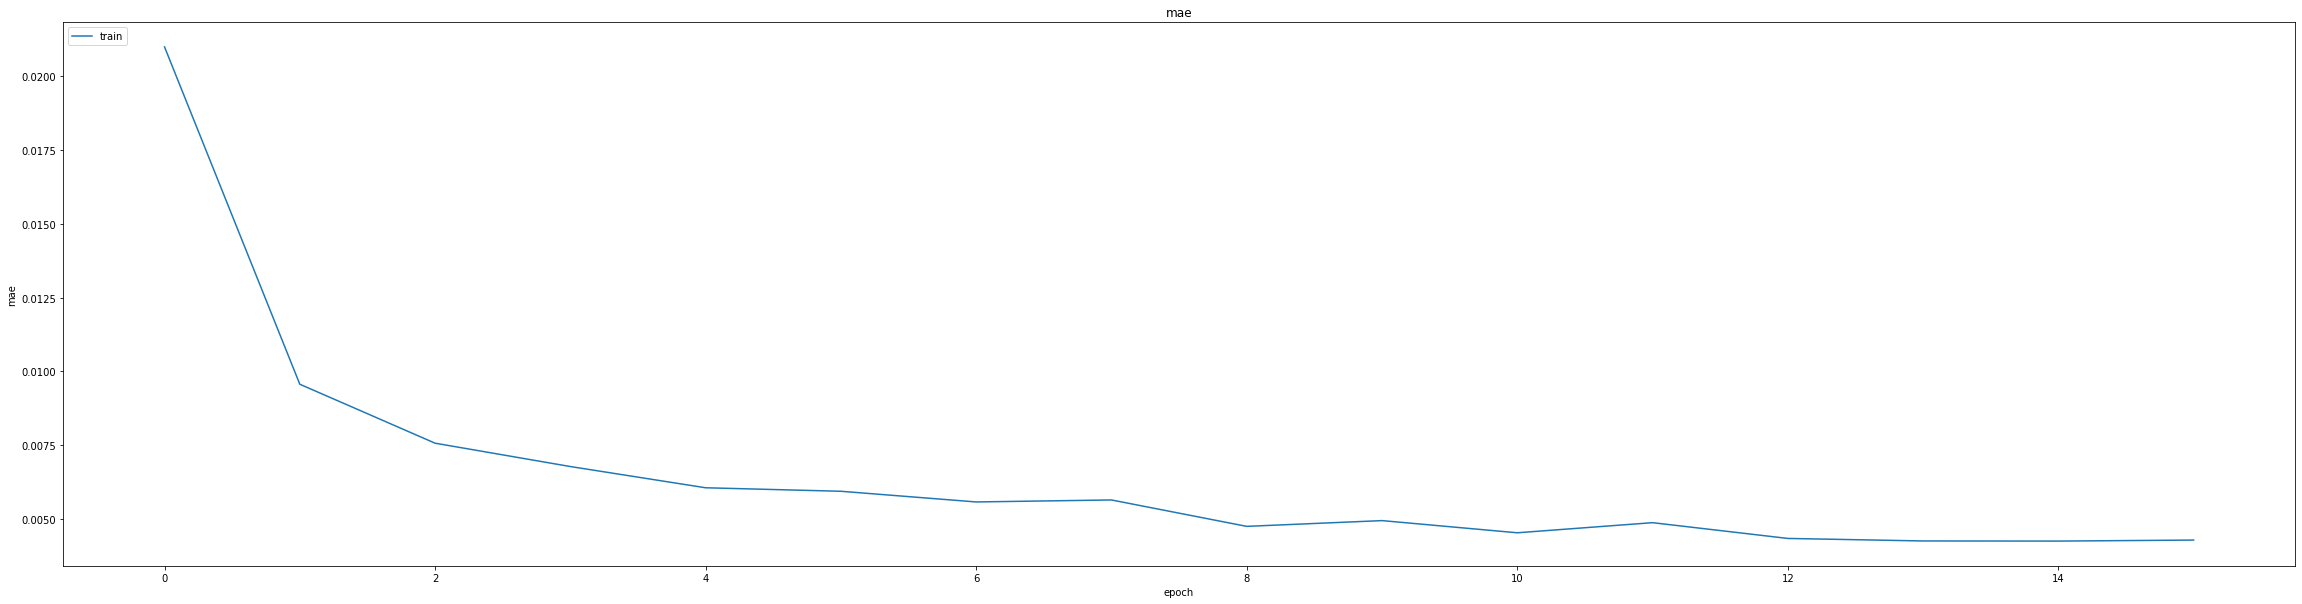

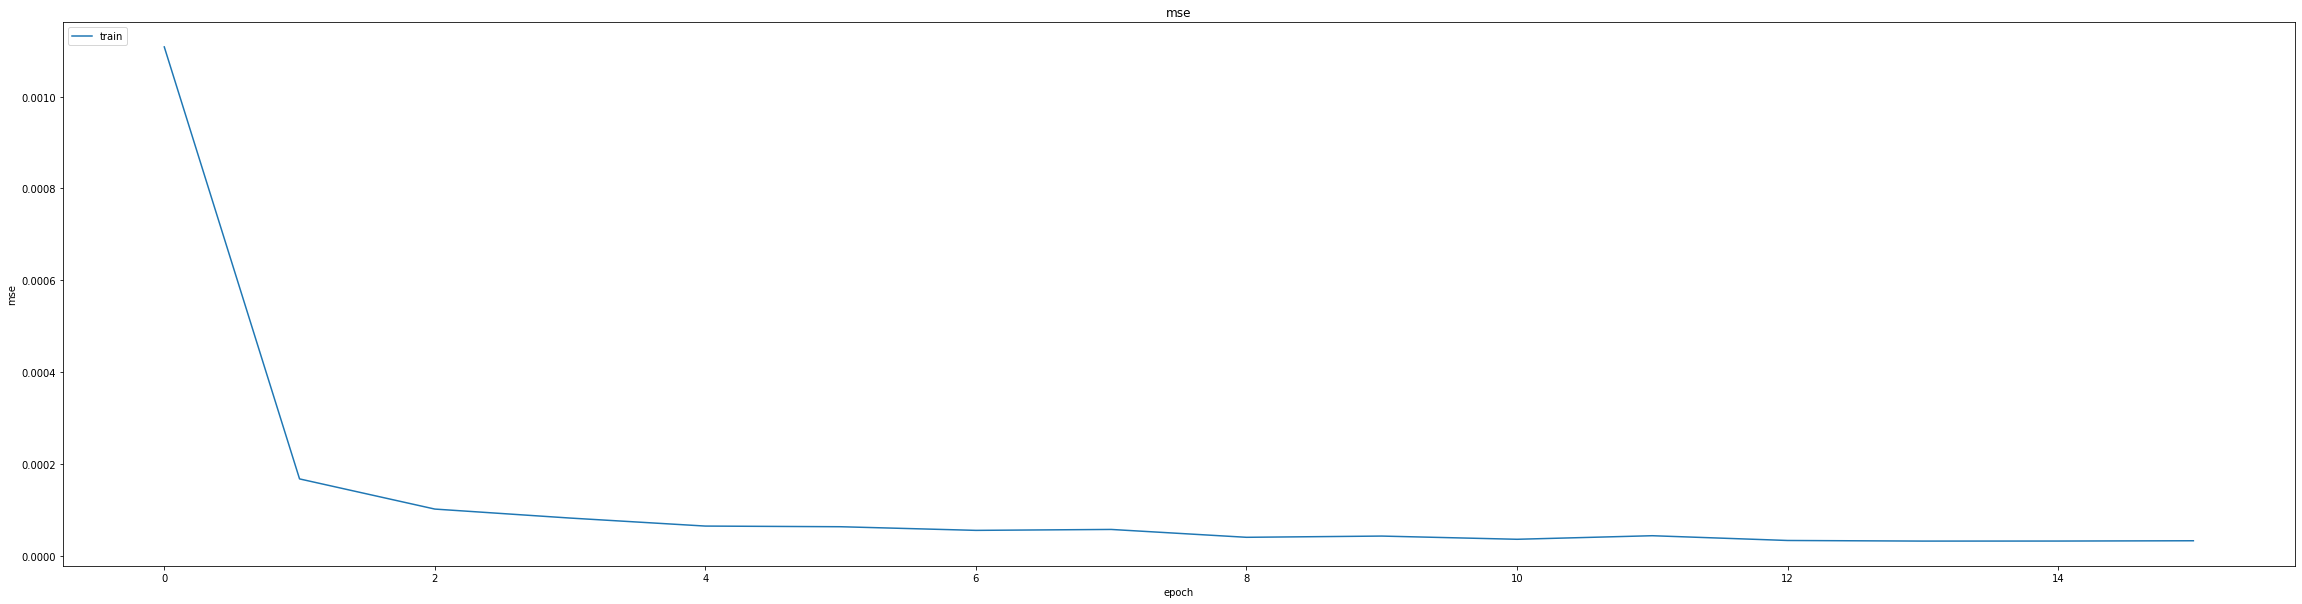

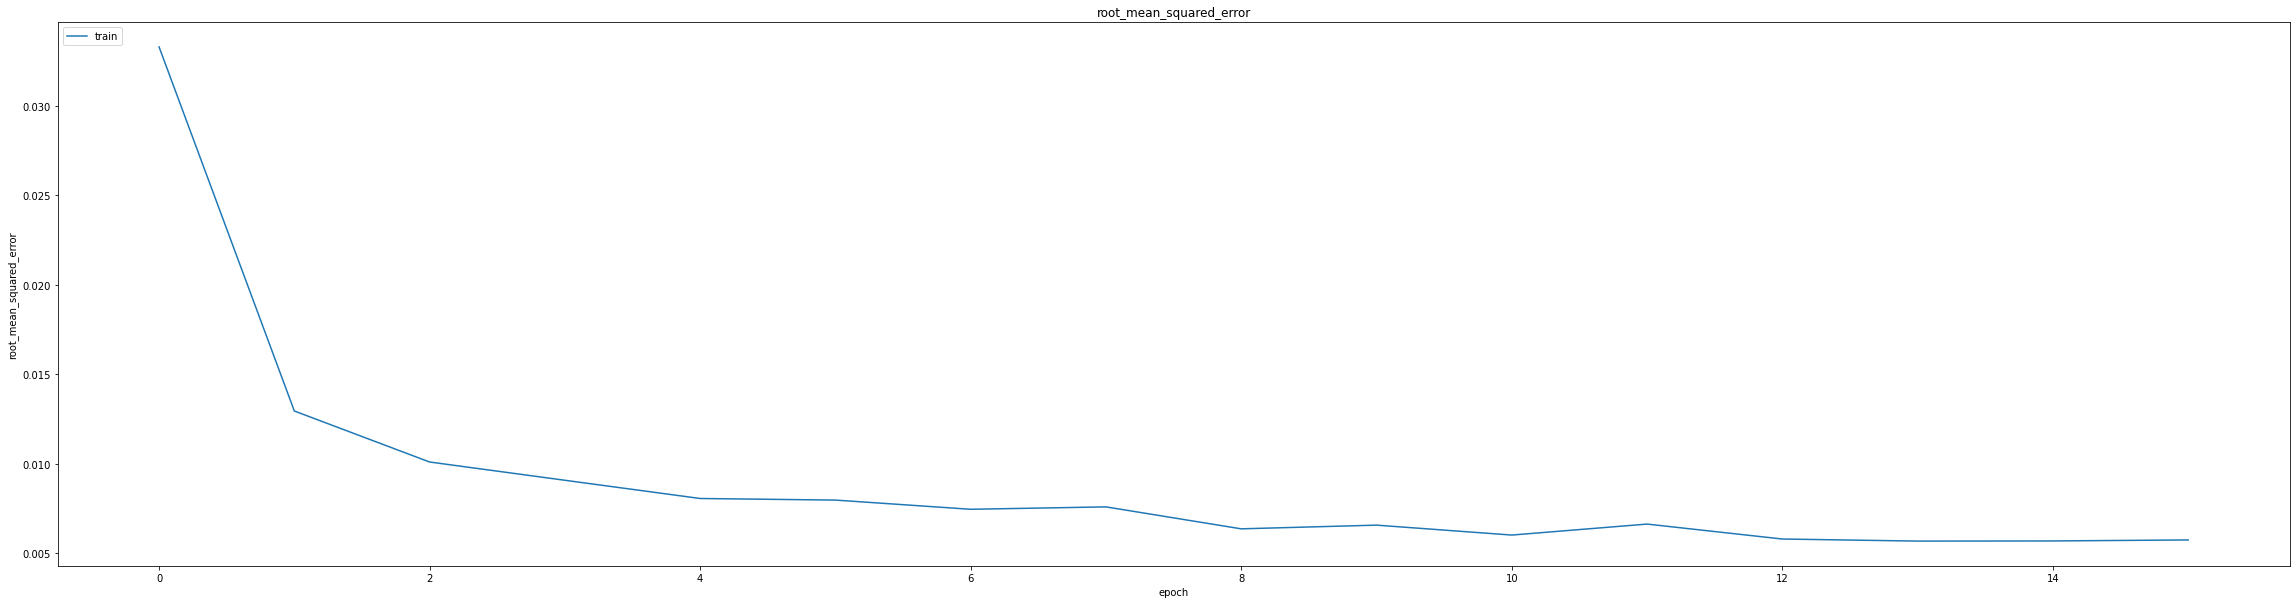

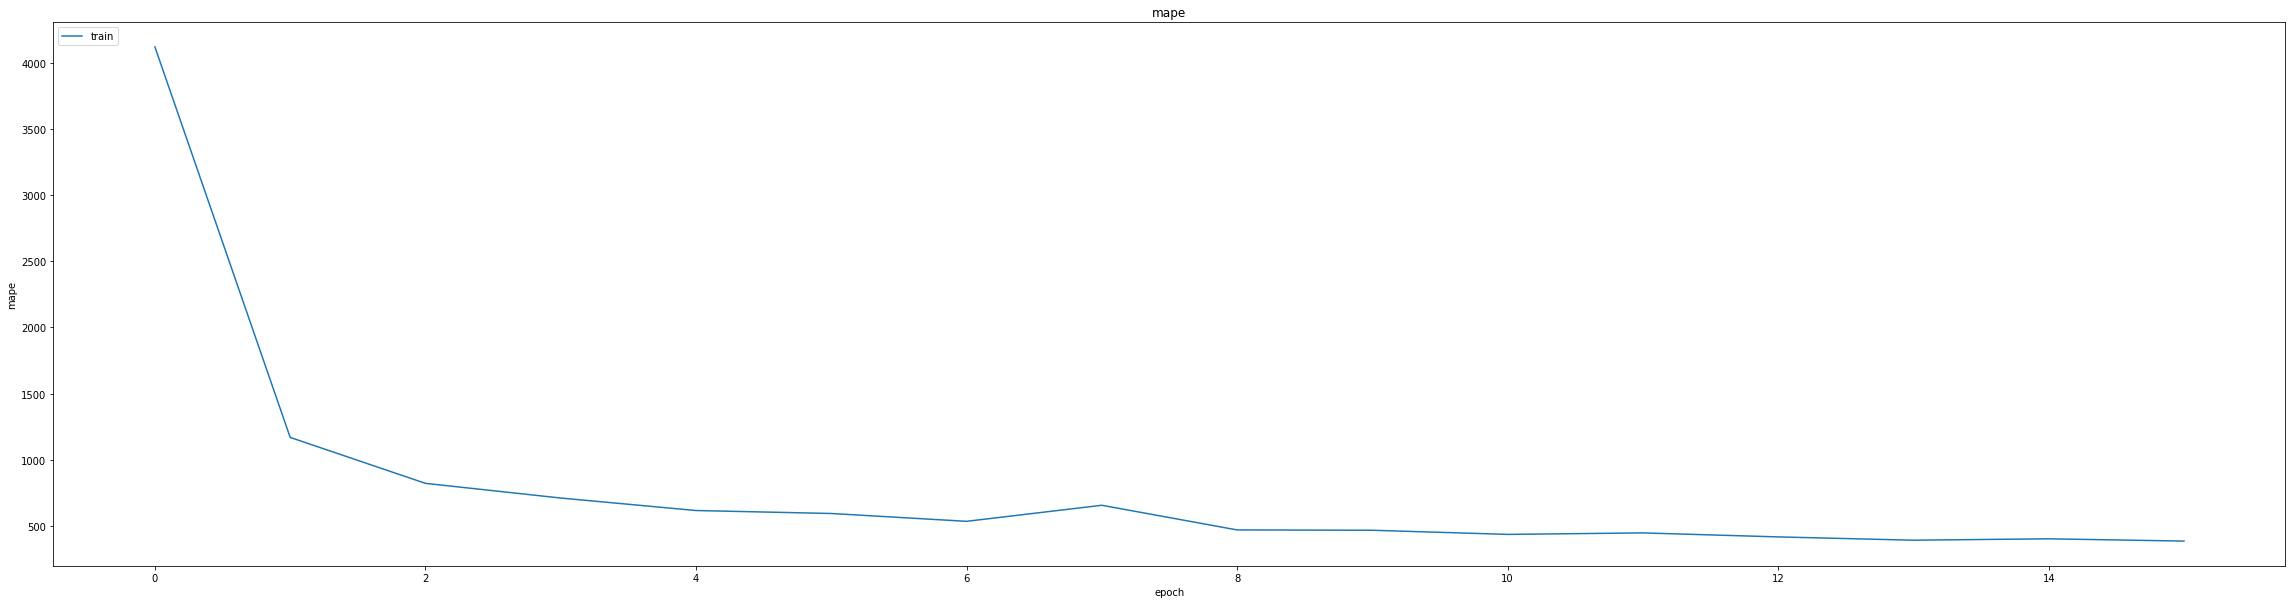

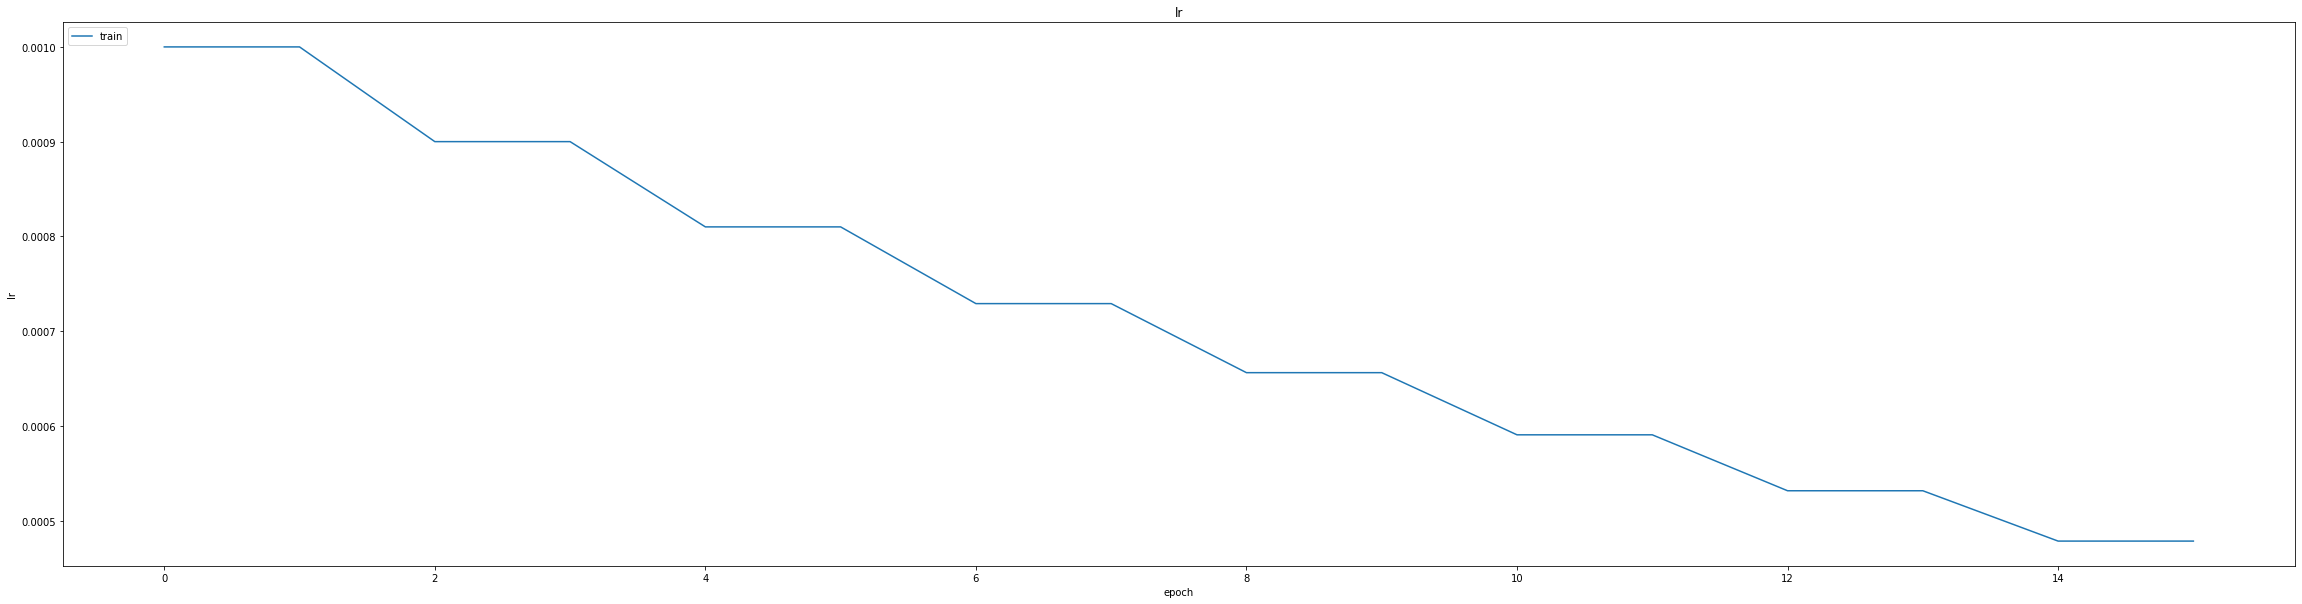

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.05716269463300705
0.061201270669698715
234/234 [==============================] - 13s 50ms/step
0.757362057244378


234/234 [==============================] - 9s 39ms/step


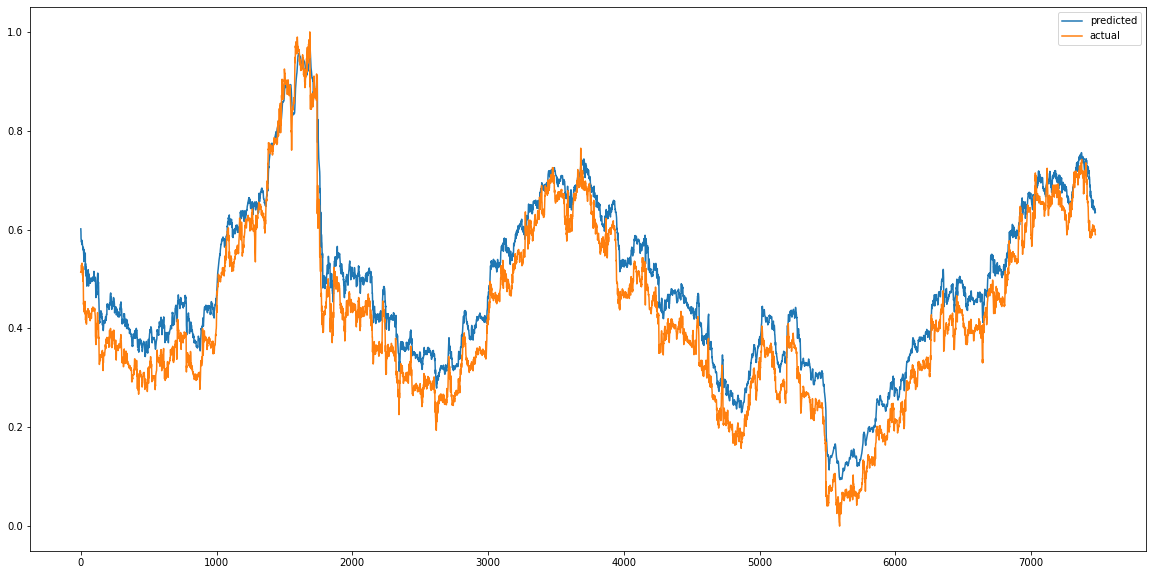

In [ ]:
model.load_weights("weights.best.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


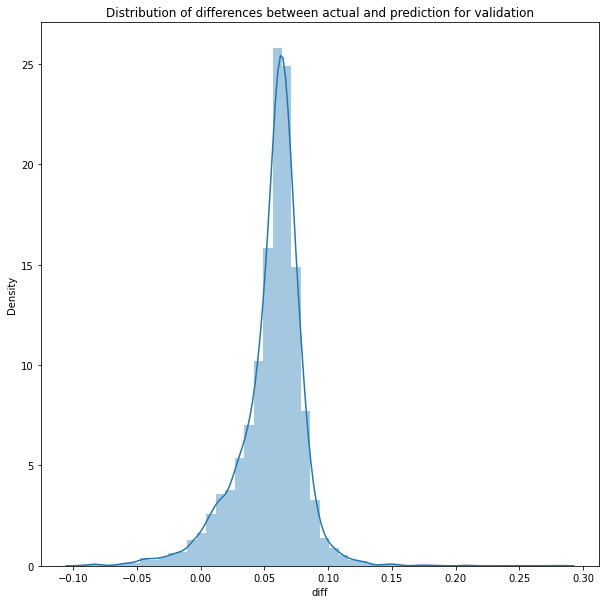

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 11s 49ms/step


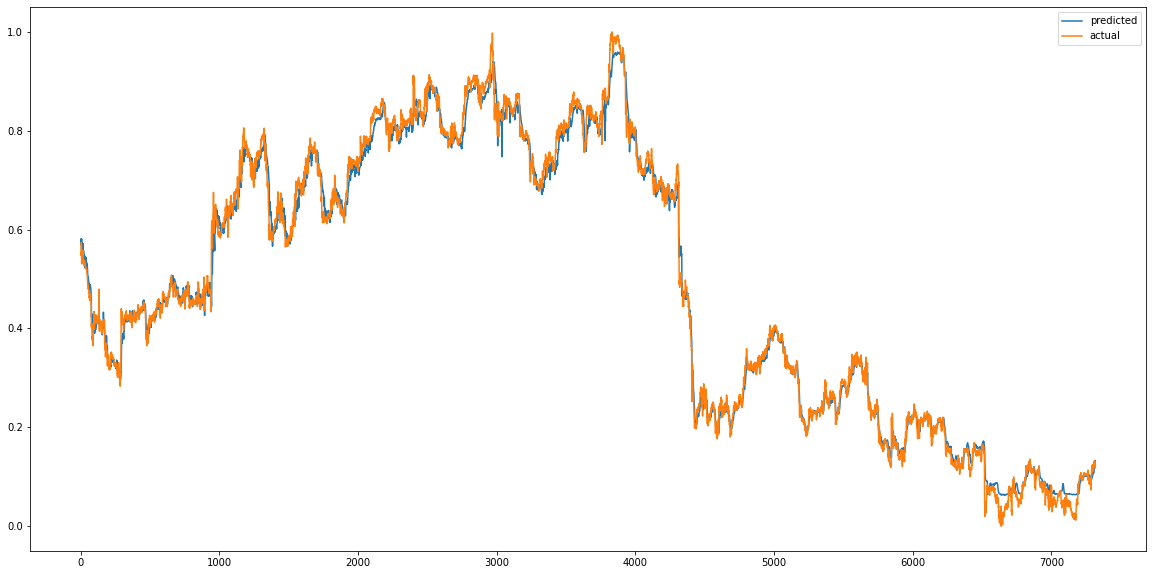

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


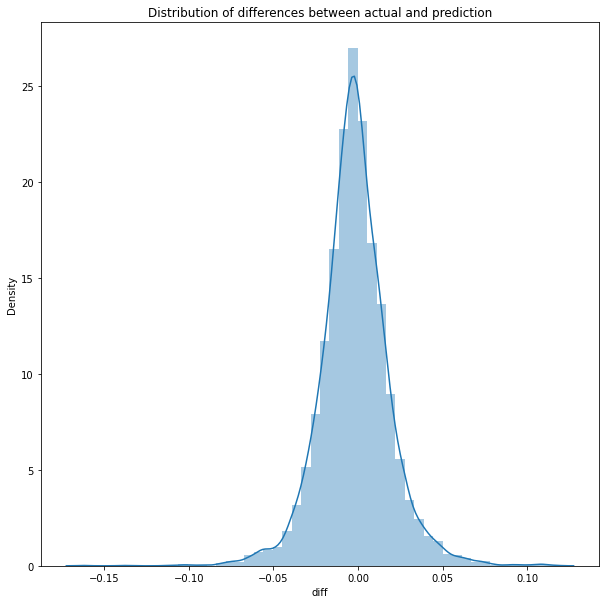

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.00042592907850918973
MAE :  0.014982340165925069
RMSE  : 0.020638049290308175
229/229 [==============================] - 9s 39ms/step
R2_Score  : 0.9946845933947708


count    7319.000000
mean       -0.001930
std         0.020549
min        -0.161945
25%        -0.012919
50%        -0.002254
75%         0.009159
max         0.117044
Name: diff, dtype: float64

In [ ]:
model= thesis.CNN_GRU_Model(x_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 gru (GRU)                   (None, 24, 256)           247296    
                                                                 
 dropout (Dropout)           (None, 24, 256)           0         
                                                                 
 gru_1 (GRU)                 (None, 64)                61824     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [ ]:
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)

checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 344.6023 - mae: 2.9850 - mse: 344.6023 - root_mean_squared_error: 18.5635 - mape: 13412.4492
Epoch 1: val_mse improved from inf to 0.03830, saving model to weights.best.hdf5
464/464 [==============================] - 140s 288ms/step - loss: 344.6023 - mae: 2.9850 - mse: 344.6023 - root_mean_squared_error: 18.5635 - mape: 13412.4492 - val_loss: 0.0383 - val_mae: 0.1633 - val_mse: 0.0383 - val_root_mean_squared_error: 0.1957 - val_mape: 71696.2500
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.0227 - mae: 0.1127 - mse: 0.0227 - root_mean_squared_error: 0.1506 - mape: 6453.3823
Epoch 2: val_mse improved from 0.03830 to 0.01057, saving model to weights.best.hdf5
464/464 [==============================] - 122s 263ms/step - loss: 0.0227 - mae: 0.1127 - mse: 0.0227 - root_mean_squared_error: 0.1506 - mape: 6453.3823 - val_loss: 0.0106 - val_mae: 0.0800 - val_mse: 0.0106 - val_root_mean_squared_error

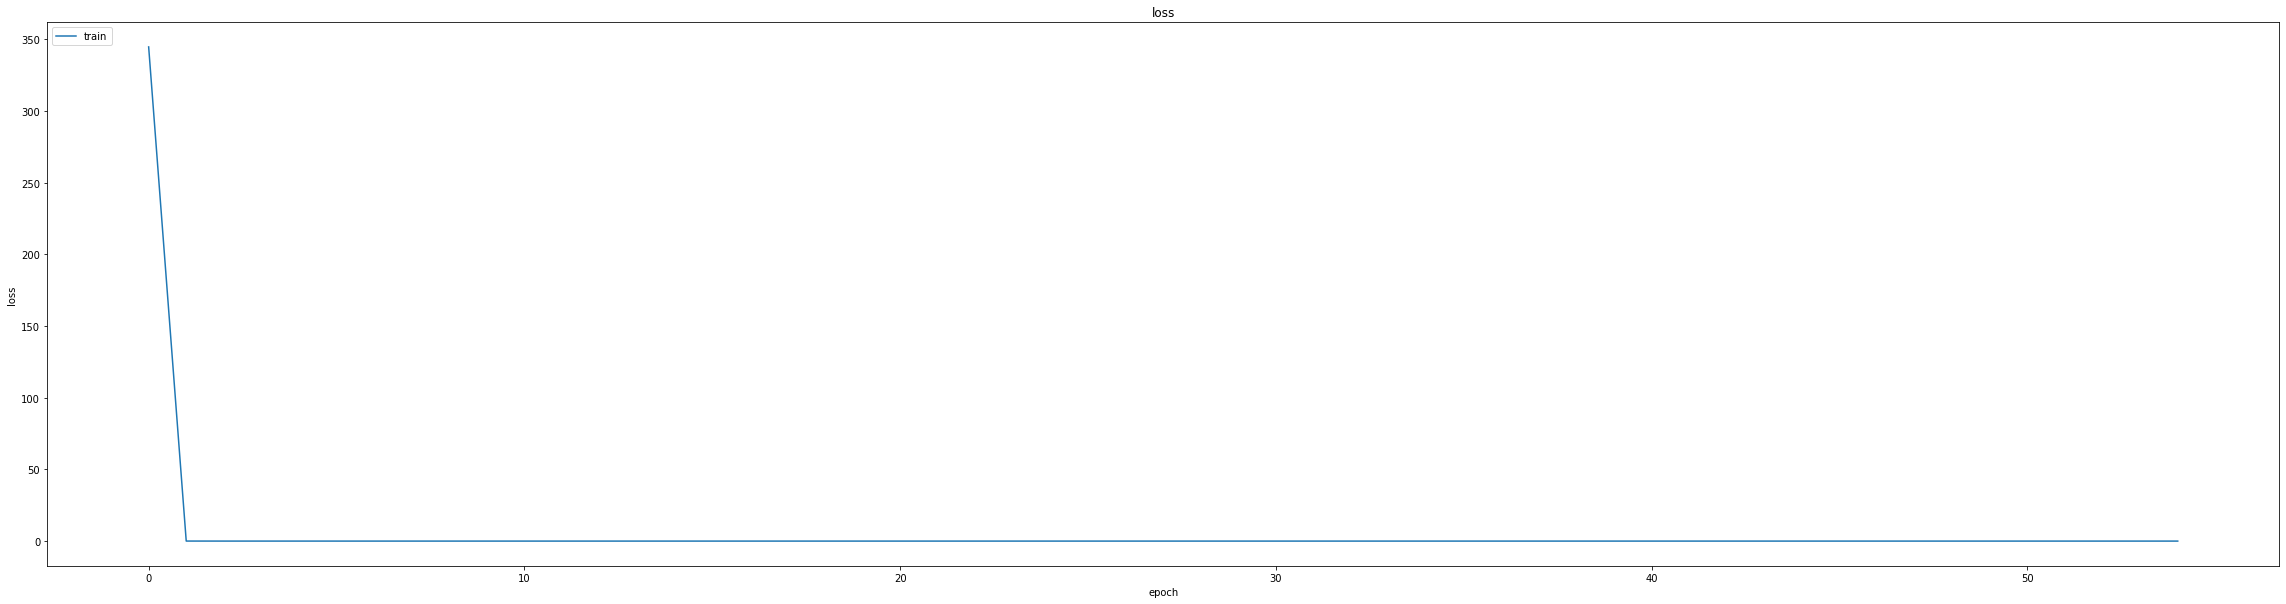

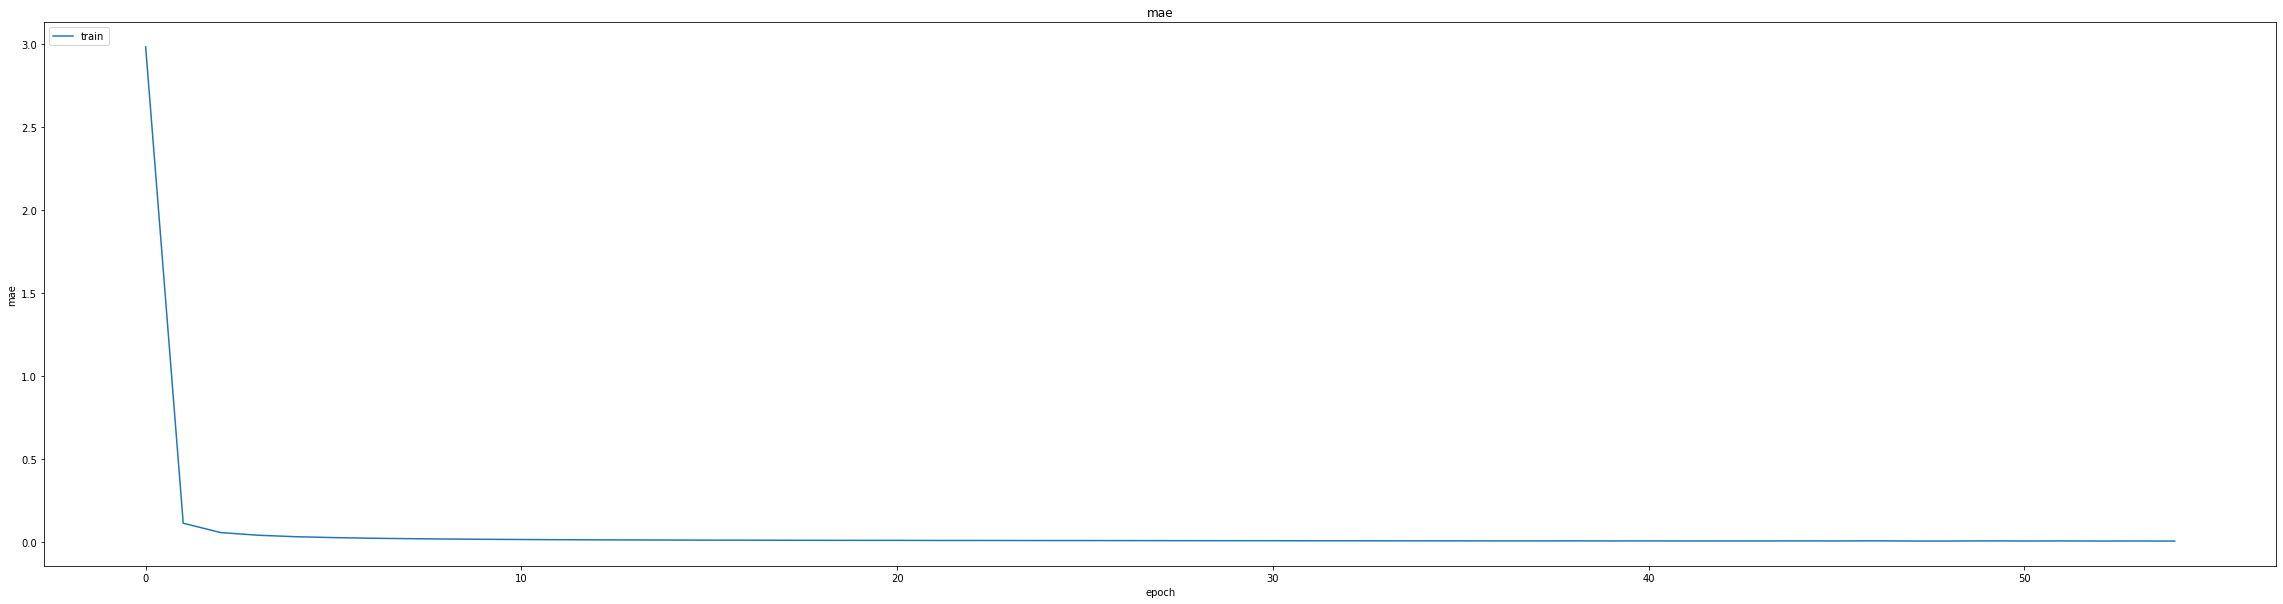

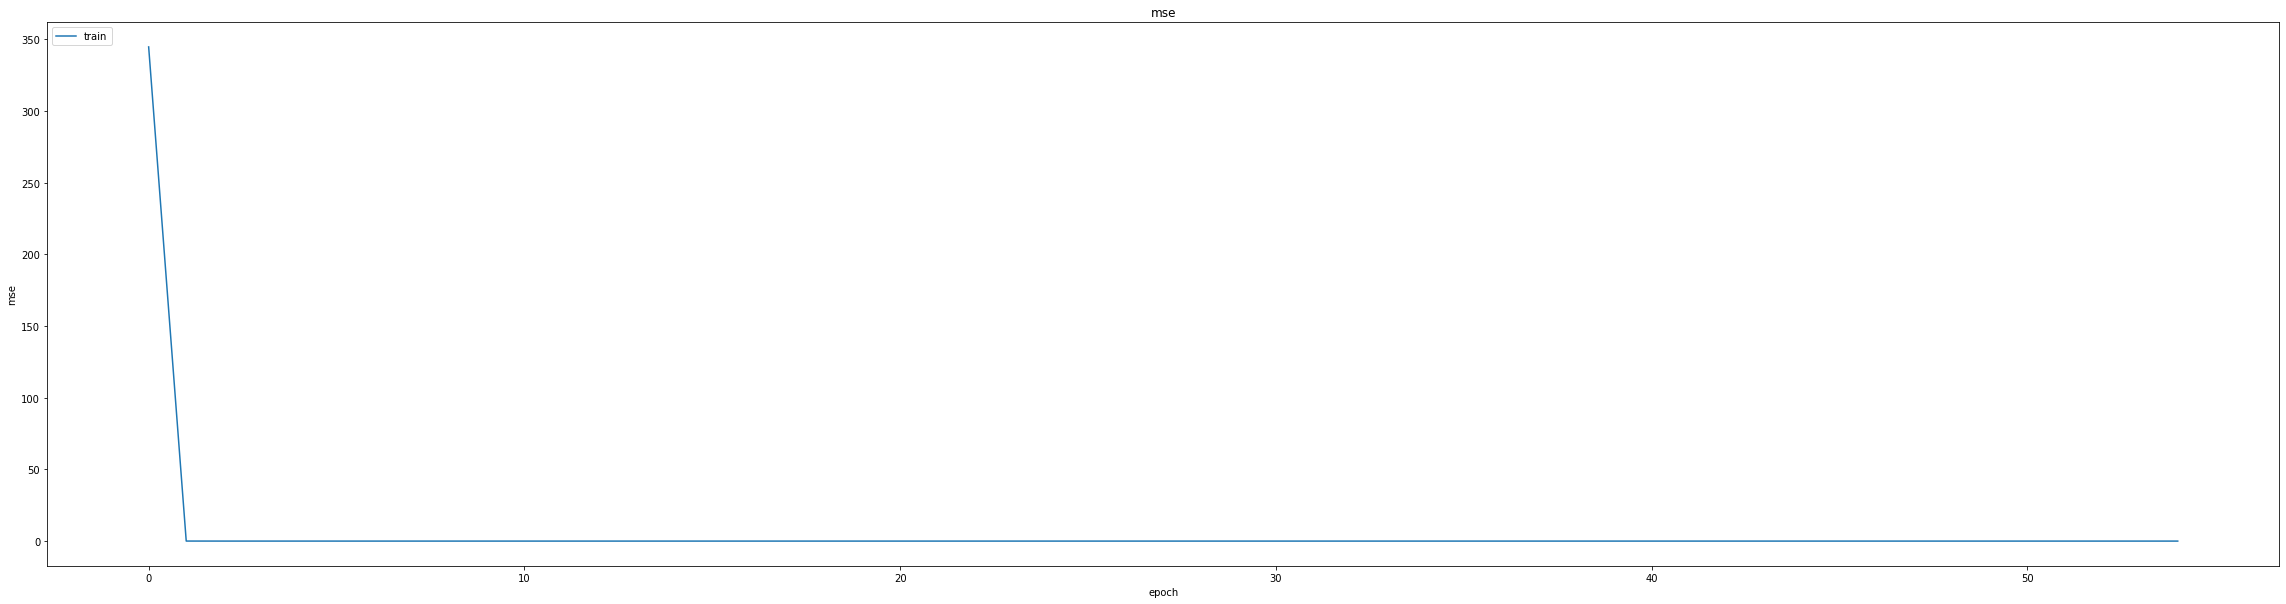

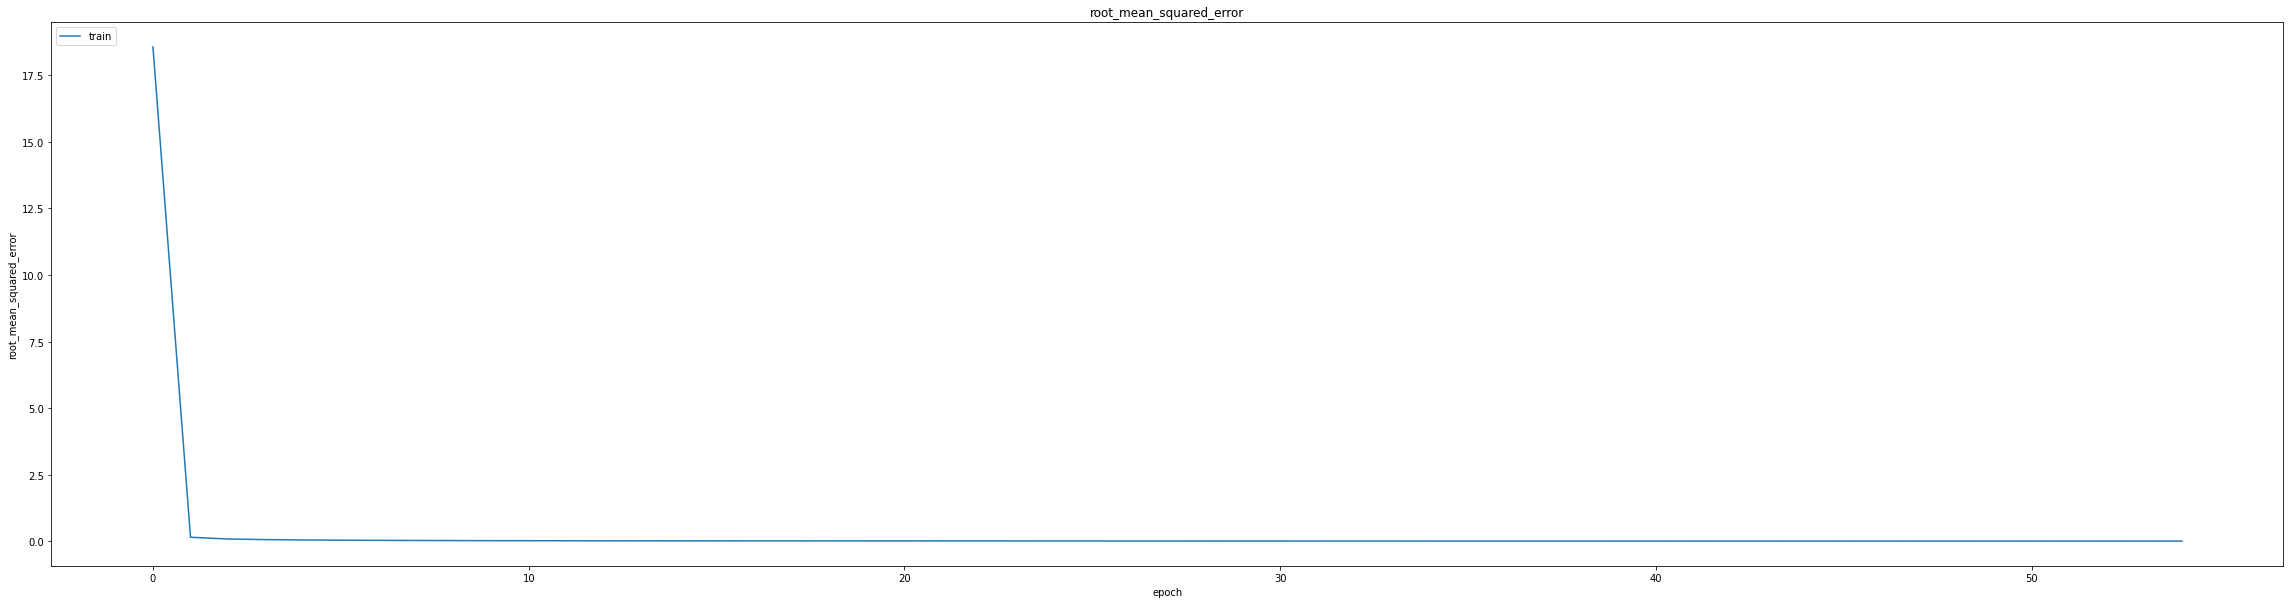

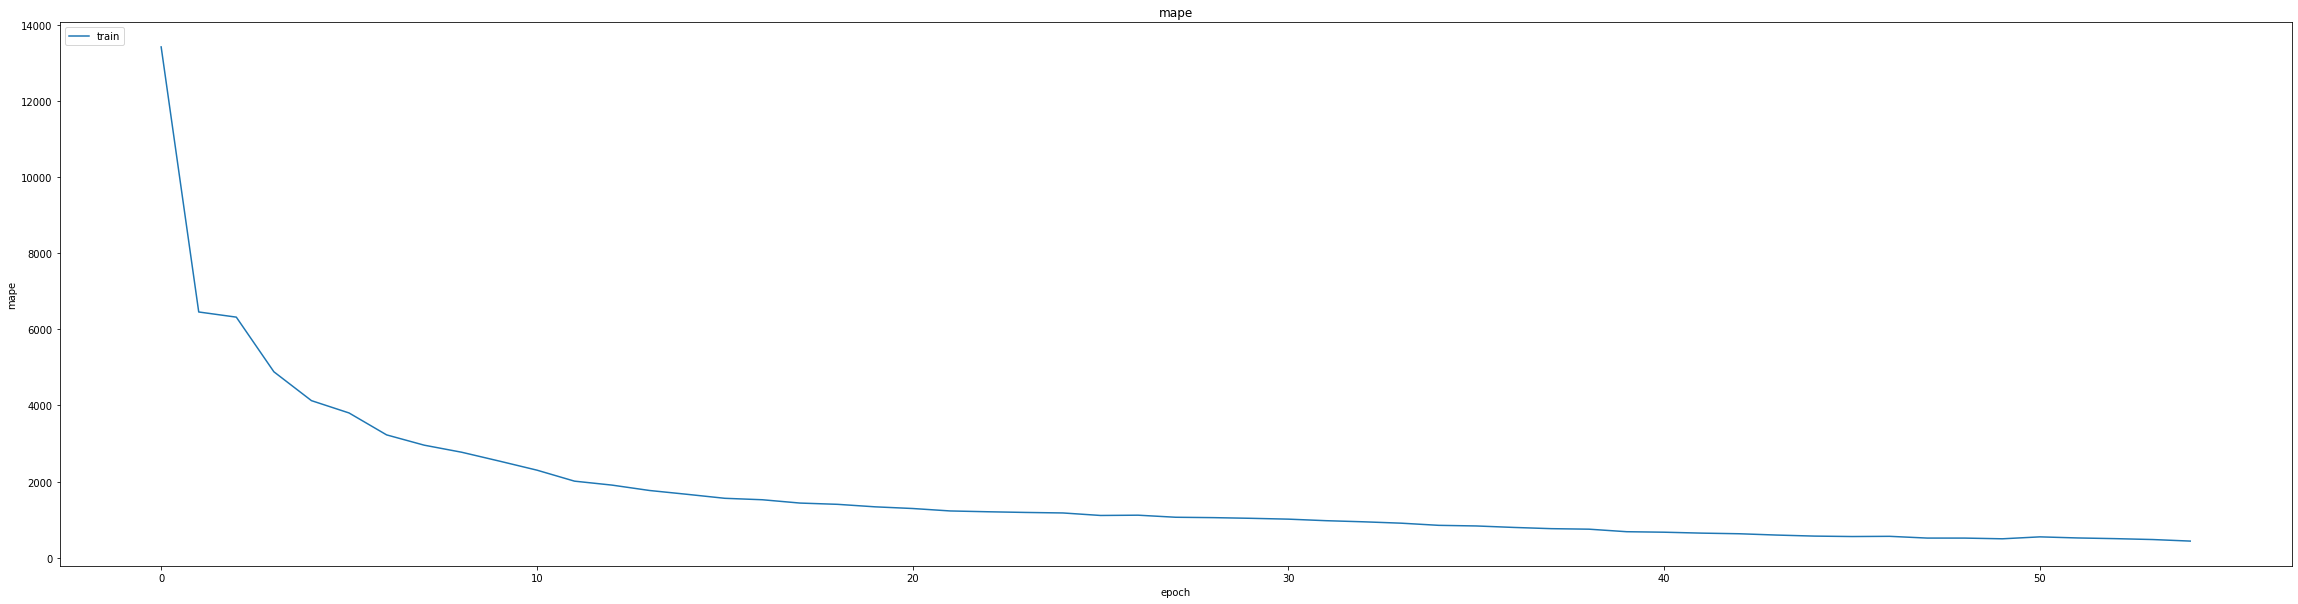

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.01667042262852192
0.0239139162003994
234/234 [==============================] - 8s 31ms/step
0.7132904263355182


In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)
from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/25
464/464 [==============================] - ETA: 0s - loss: 0.0011 - mae: 0.0144 - mse: 0.0011 - root_mean_squared_error: 0.0338 - mape: 1328.8593
Epoch 1: val_mse did not improve from 0.00057
464/464 [==============================] - 115s 237ms/step - loss: 0.0011 - mae: 0.0144 - mse: 0.0011 - root_mean_squared_error: 0.0338 - mape: 1328.8593 - val_loss: 9.3652e-04 - val_mae: 0.0228 - val_mse: 9.3652e-04 - val_root_mean_squared_error: 0.0306 - val_mape: 8235.4600 - lr: 0.0010
Epoch 2/25
464/464 [==============================] - ETA: 0s - loss: 1.3761e-04 - mae: 0.0087 - mse: 1.3761e-04 - root_mean_squared_error: 0.0117 - mape: 860.9949
Epoch 2: val_mse did not improve from 0.00057
464/464 [==============================] - 110s 236ms/step - loss: 1.3761e-04 - mae: 0.0087 - mse: 1.3761e-04 - root_mean_squared_error: 0.0117 - mape: 860.9949 - val_loss: 0.0011 - val_mae: 0.0264 - val_mse: 0.0011 - val_root_mean_squared_error: 0.0336 - val_mape: 6633.5830 - lr: 0.0010
lr chang

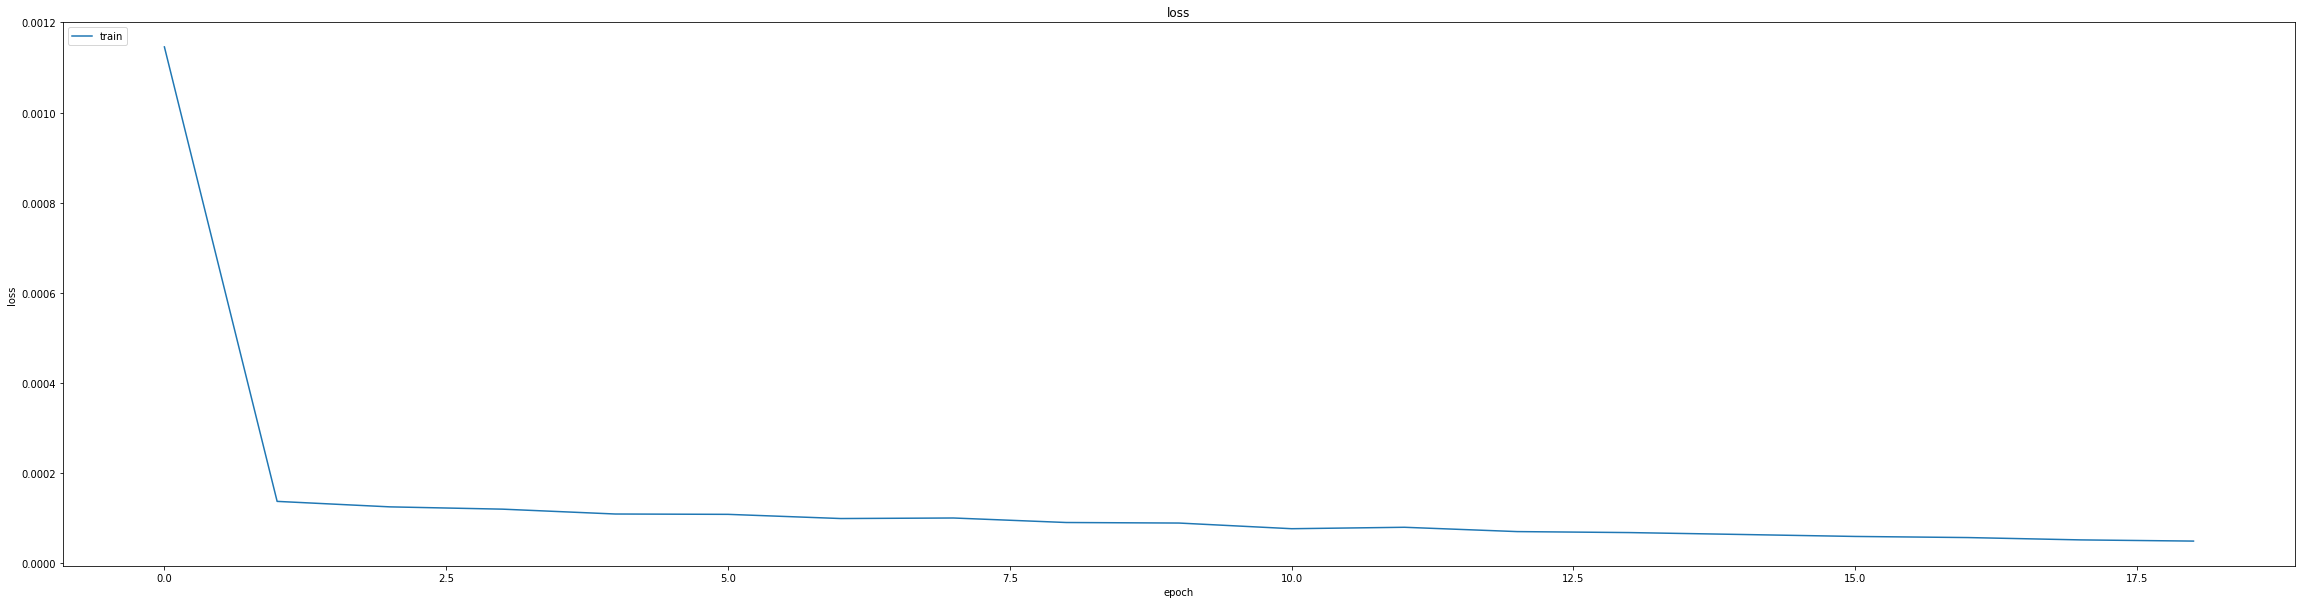

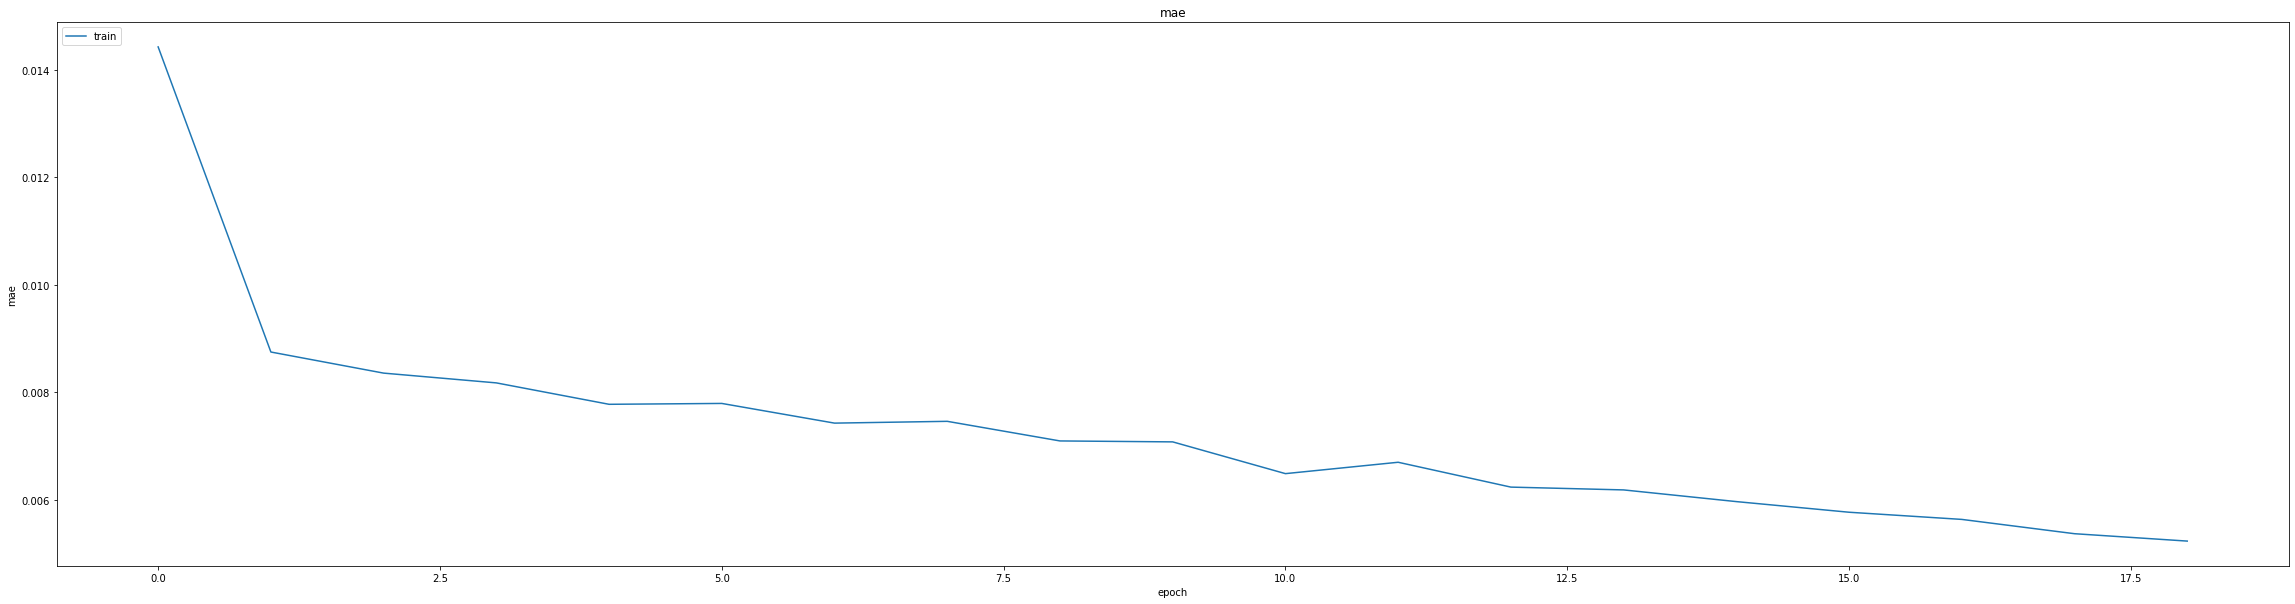

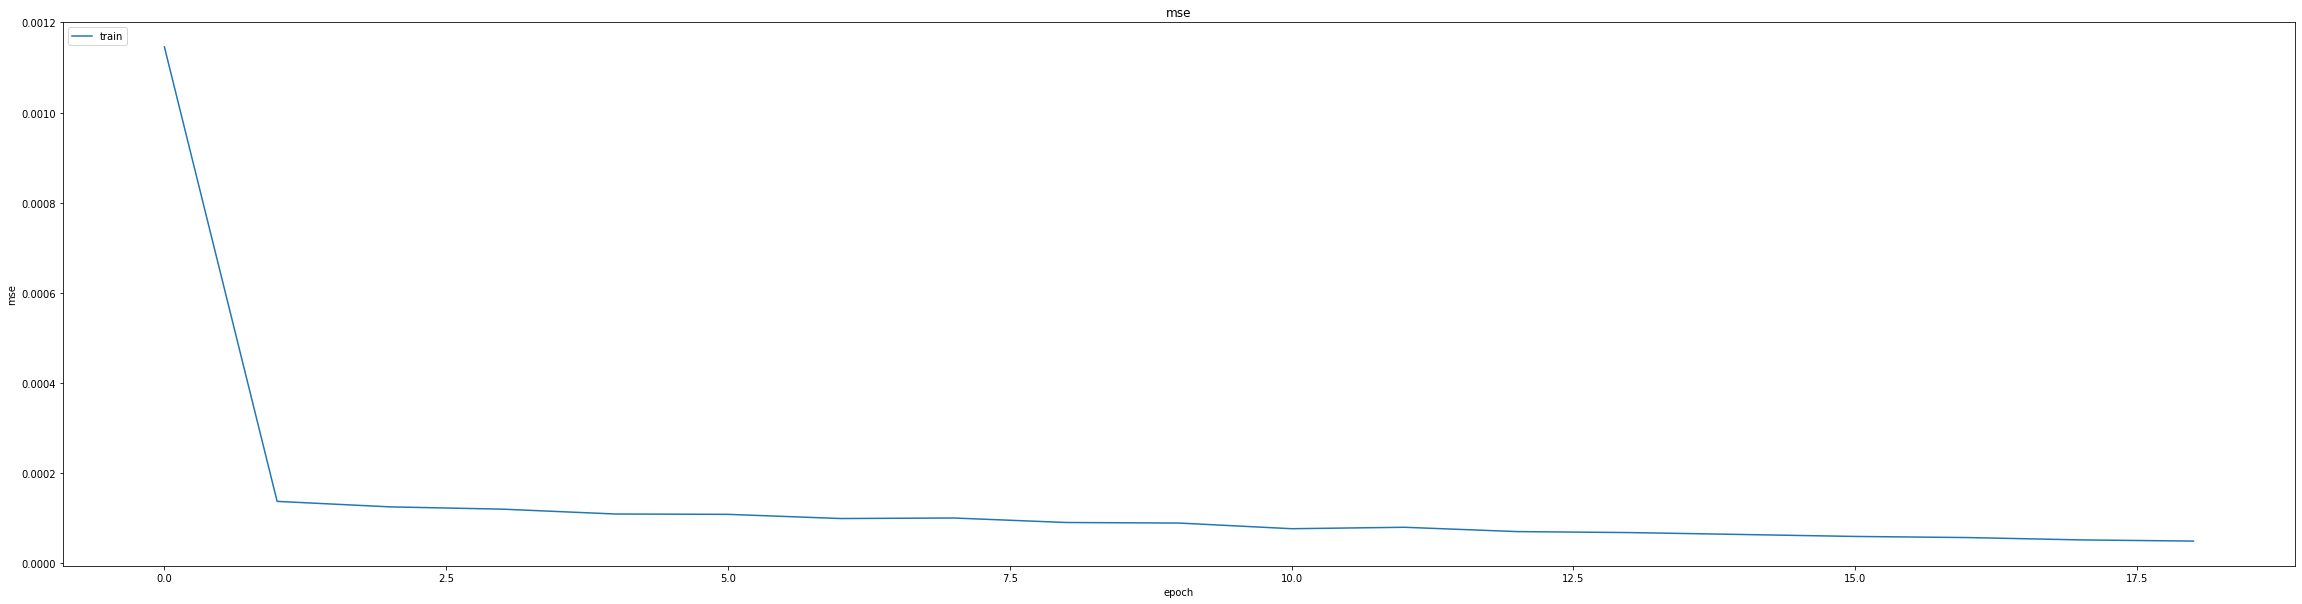

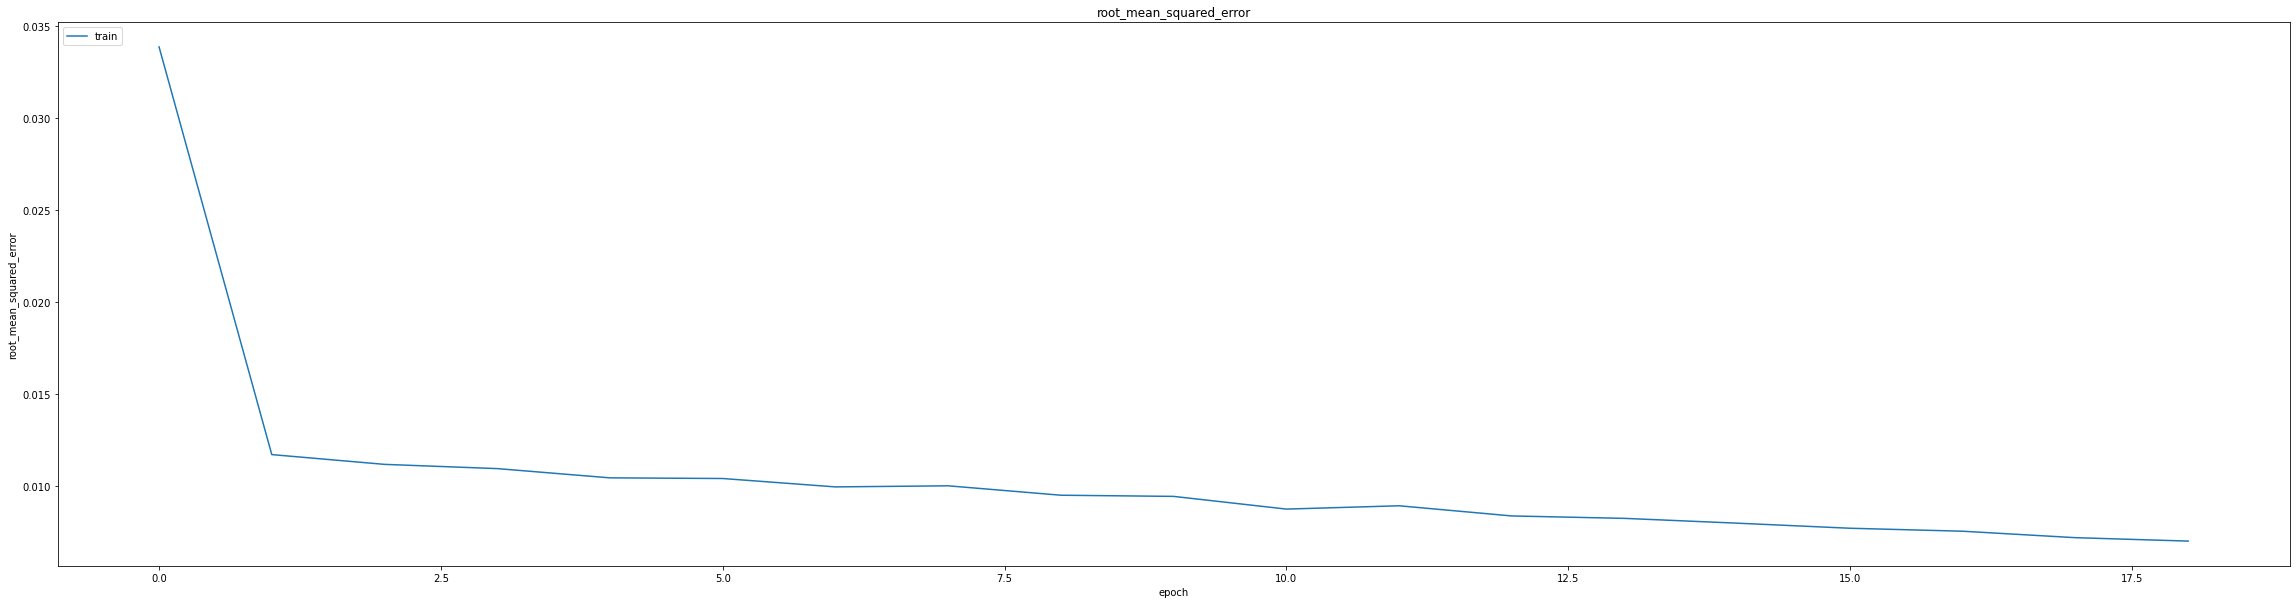

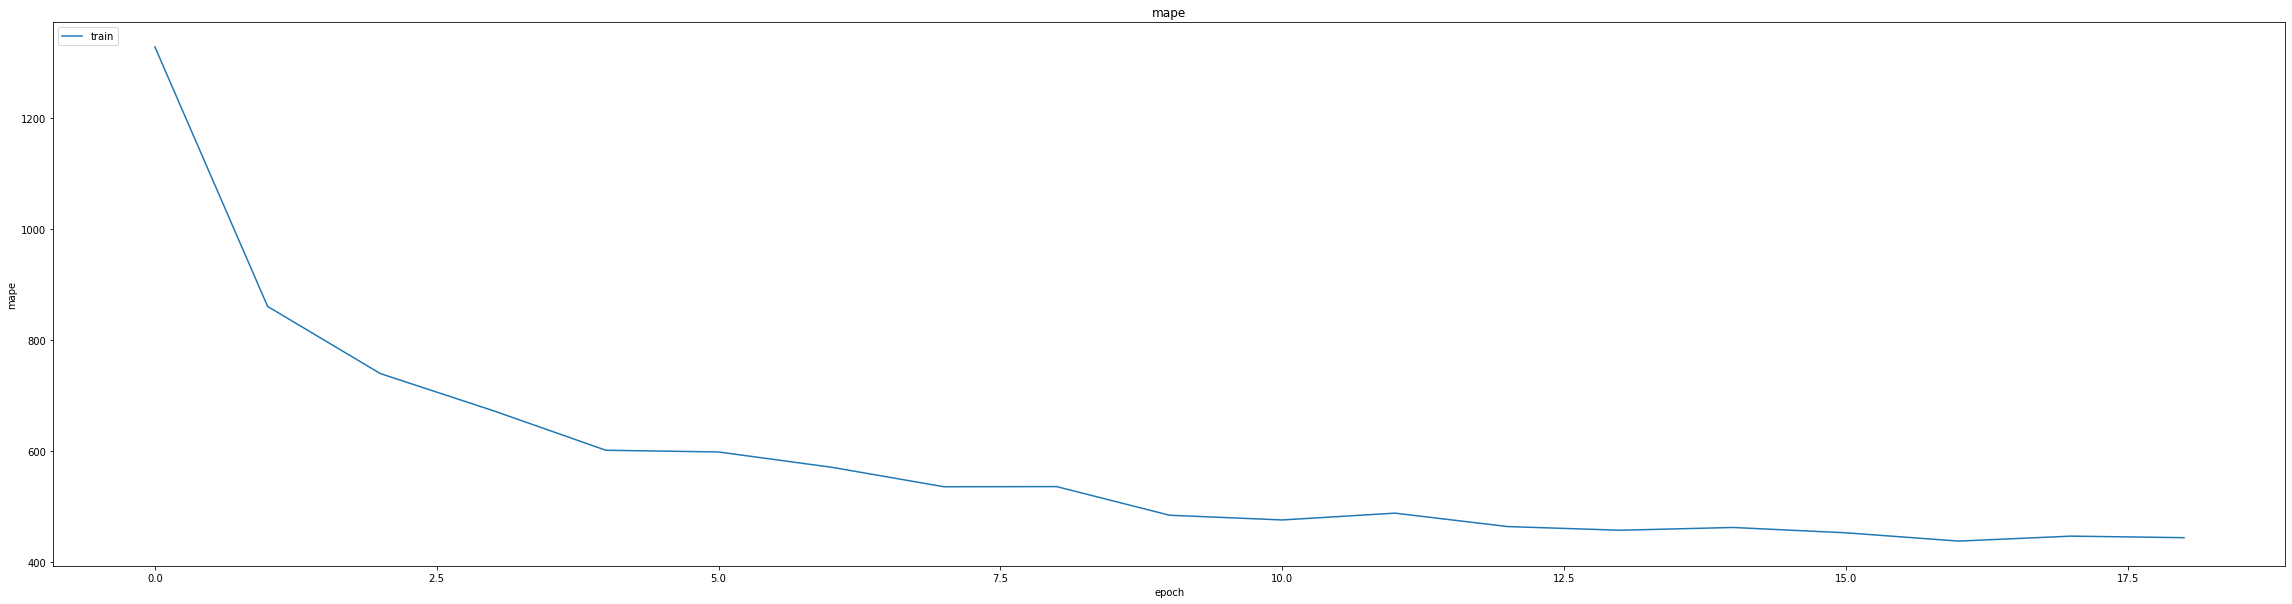

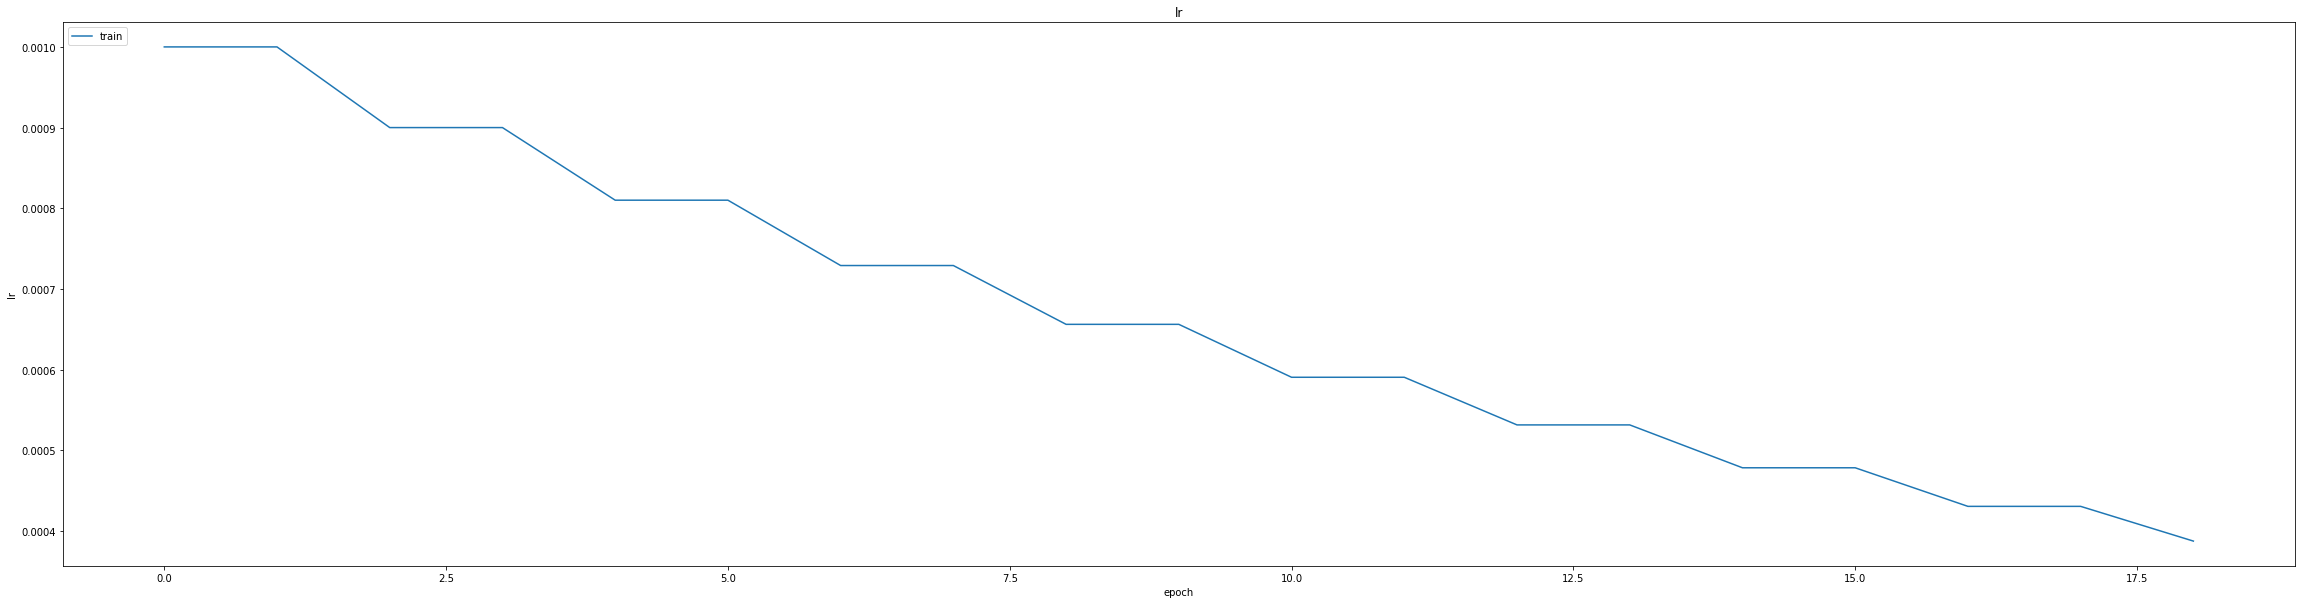

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
#print(min(histroy.history['val_mape']))
r2_scr = thesis.R_Squared_Score(model, x_val, y_val)
print(r2_scr)

0.022825069725513458
0.030373021960258484
234/234 [==============================] - 10s 42ms/step
0.9831222072020548


234/234 [==============================] - 9s 40ms/step


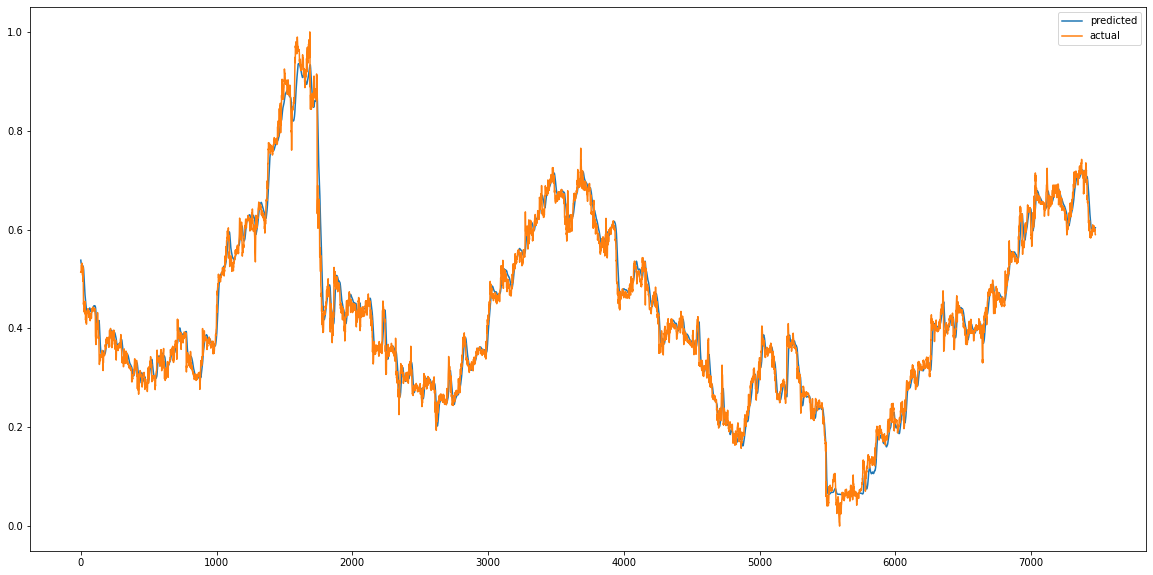

In [ ]:
model.load_weights("weights.best.hdf5")
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


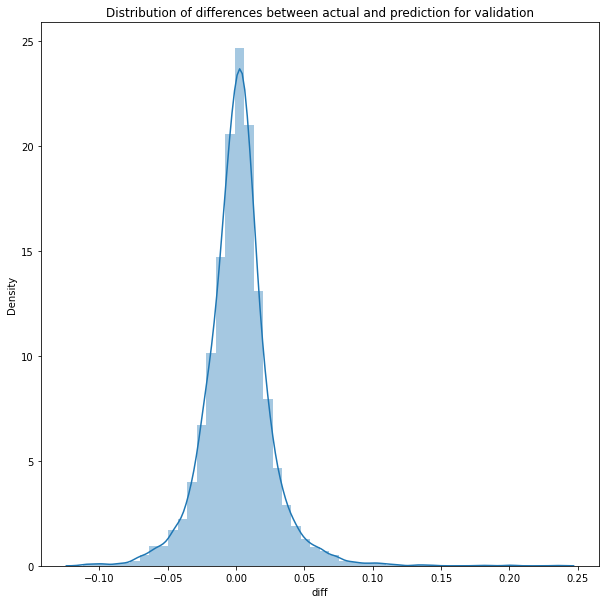

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 7s 30ms/step


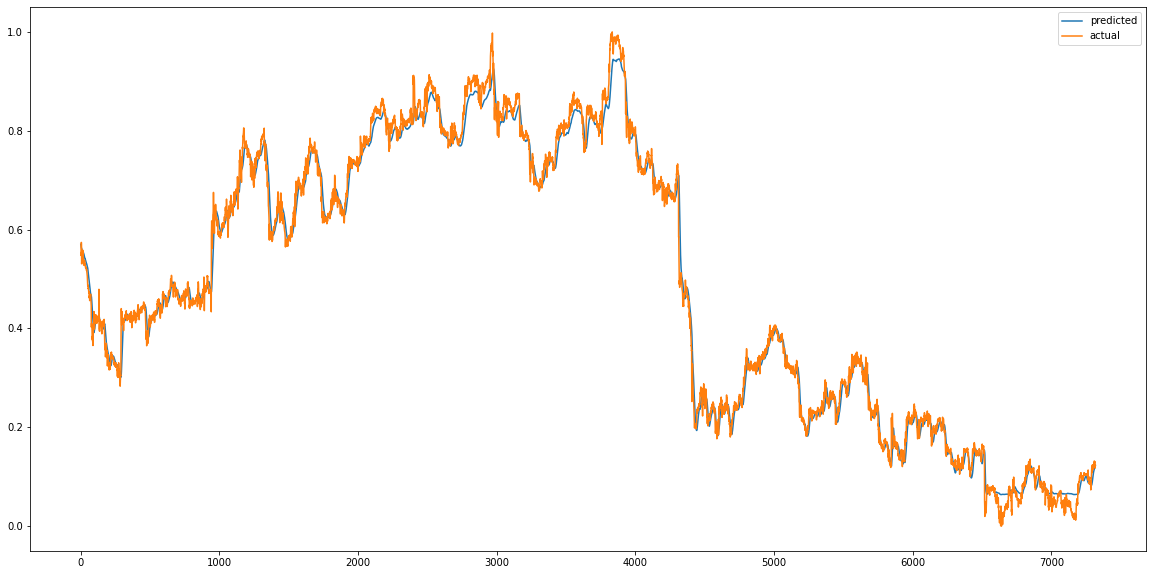

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


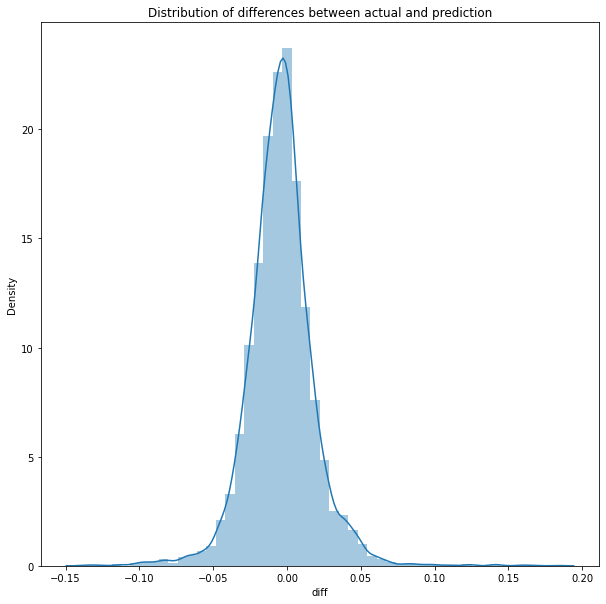

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt

print('RMSE  :', sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_scr = thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :',test_r2_scr)


predictions['diff'].describe()

MSE :  0.0005245319559760405
MAE :  0.016401308847631746
RMSE  : 0.022902662639440866
229/229 [==============================] - 7s 30ms/step
R2_Score  : 0.9934540730747718


count    7319.000000
mean       -0.004201
std         0.022516
min        -0.138123
25%        -0.016203
50%        -0.004240
75%         0.006878
max         0.182699
Name: diff, dtype: float64

In [ ]:
model= thesis.CNN_LSTM_Model(x_train)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            2368      
                                                                 
 lstm_2 (LSTM)               (None, 24, 256)           328704    
                                                                 
 dropout_1 (Dropout)         (None, 24, 256)           0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                82176     
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Set the metric you want to monitor, the threshold, and the patience value
early_stopping = EarlyStopping(monitor='val_mse', patience=30)


In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint("weights.best.hdf5", monitor='val_mse', verbose=1, save_best_only=True, mode='min')

# Fit
callbacks_list = [checkpoint, early_stopping ]

In [ ]:
Epochs=75
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/75
464/464 [==============================] - ETA: 0s - loss: 460.2766 - mae: 4.7736 - mse: 460.2766 - root_mean_squared_error: 21.4541 - mape: 13336.2617
Epoch 1: val_mse improved from inf to 0.07305, saving model to weights.best.hdf5
464/464 [==============================] - 123s 255ms/step - loss: 460.2766 - mae: 4.7736 - mse: 460.2766 - root_mean_squared_error: 21.4541 - mape: 13336.2617 - val_loss: 0.0730 - val_mae: 0.2312 - val_mse: 0.0730 - val_root_mean_squared_error: 0.2703 - val_mape: 84070.2344
Epoch 2/75
464/464 [==============================] - ETA: 0s - loss: 0.0558 - mae: 0.2073 - mse: 0.0558 - root_mean_squared_error: 0.2363 - mape: 9063.5254
Epoch 2: val_mse improved from 0.07305 to 0.03405, saving model to weights.best.hdf5
464/464 [==============================] - 117s 252ms/step - loss: 0.0558 - mae: 0.2073 - mse: 0.0558 - root_mean_squared_error: 0.2363 - mape: 9063.5254 - val_loss: 0.0340 - val_mae: 0.1483 - val_mse: 0.0340 - val_root_mean_squared_error

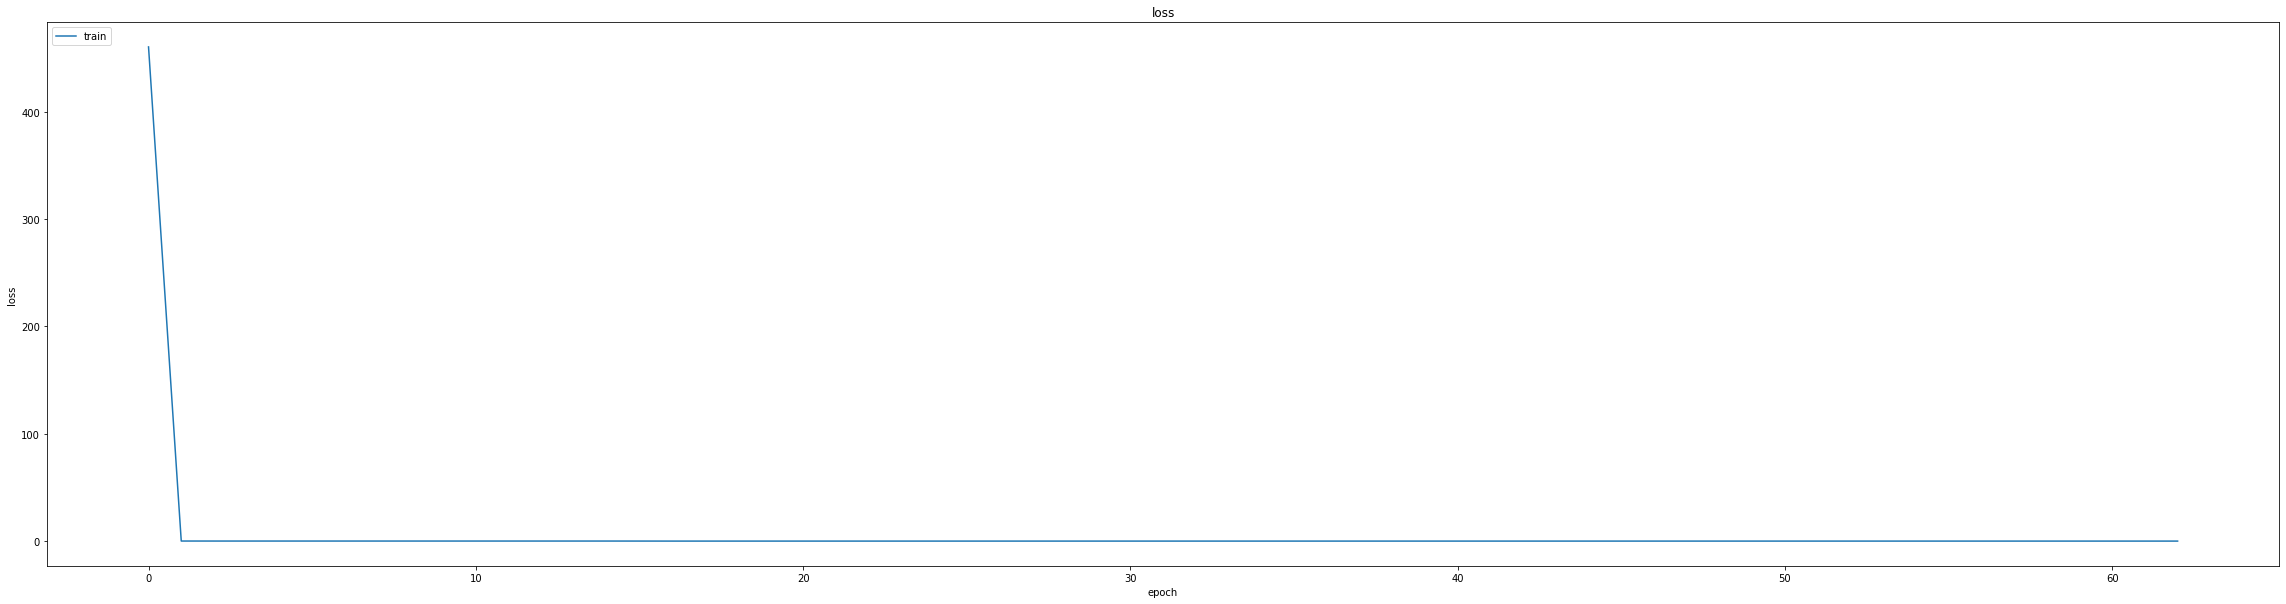

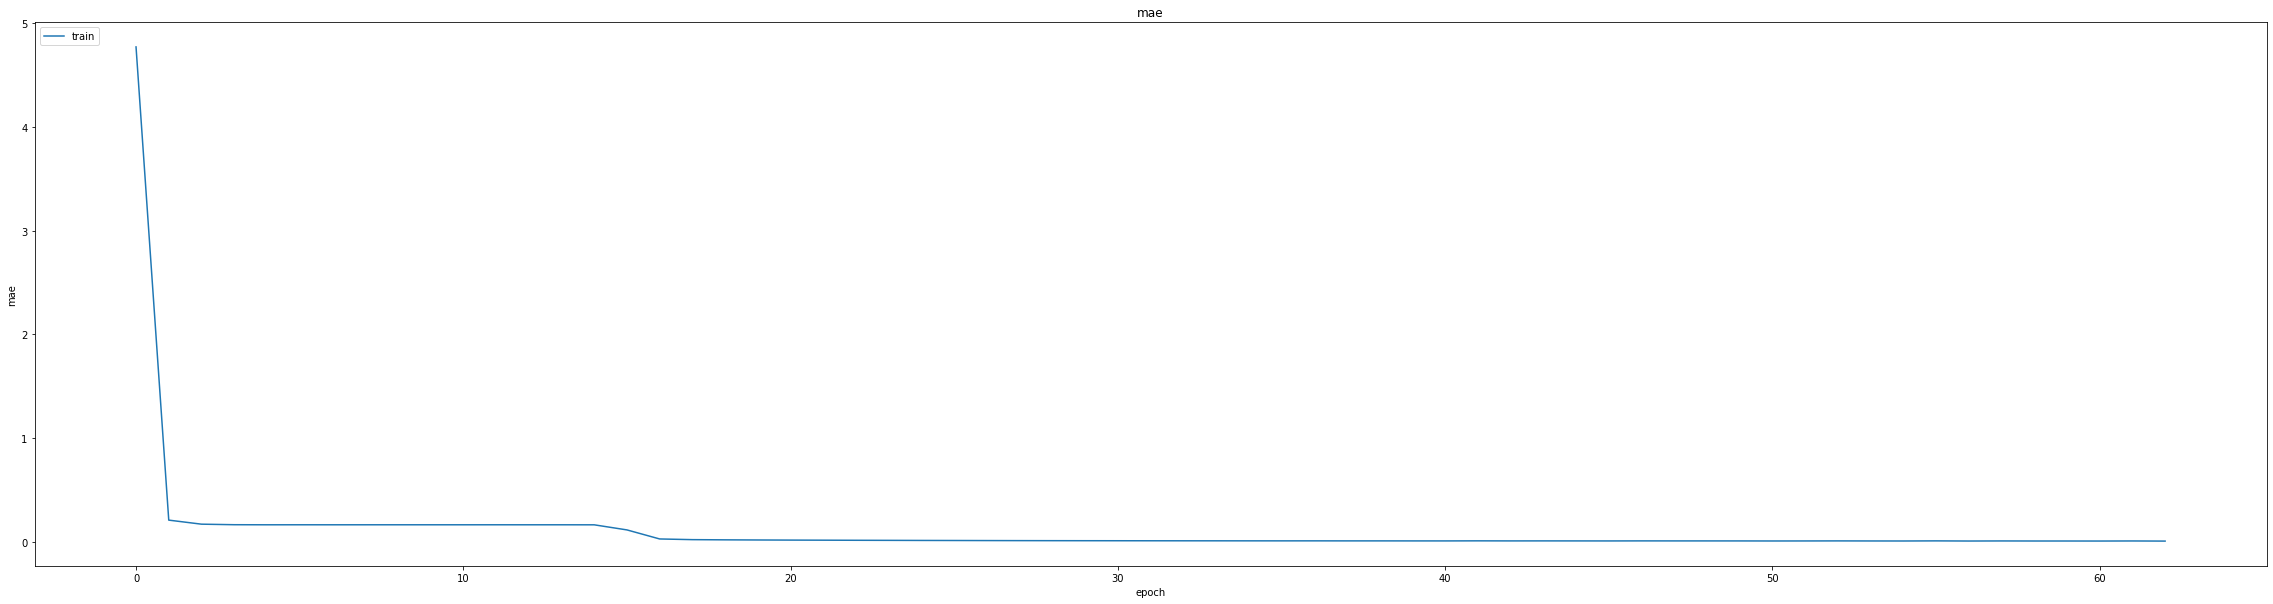

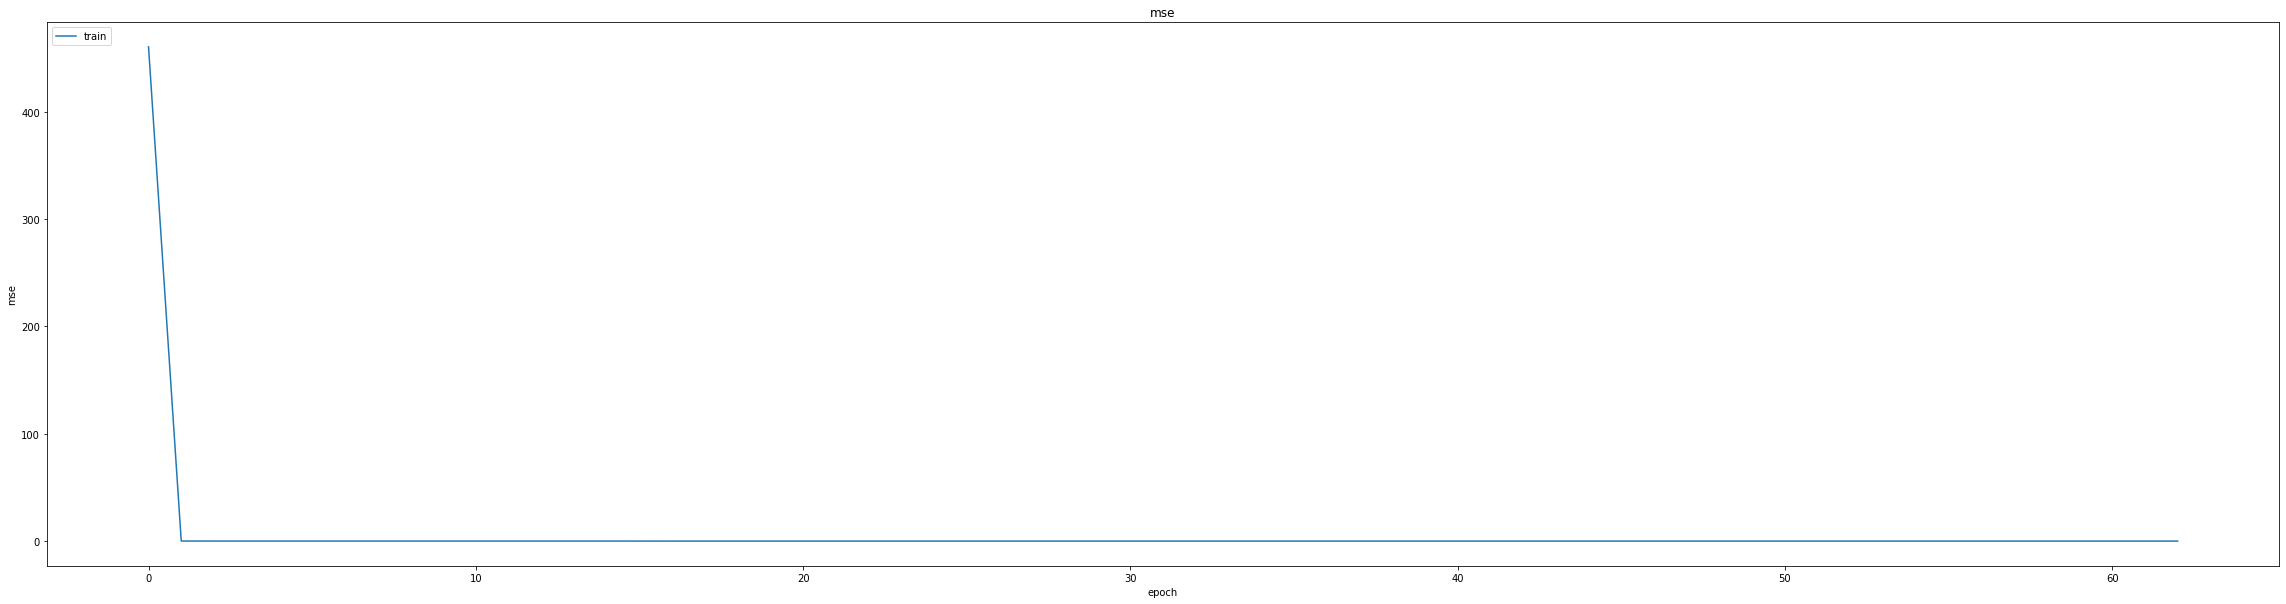

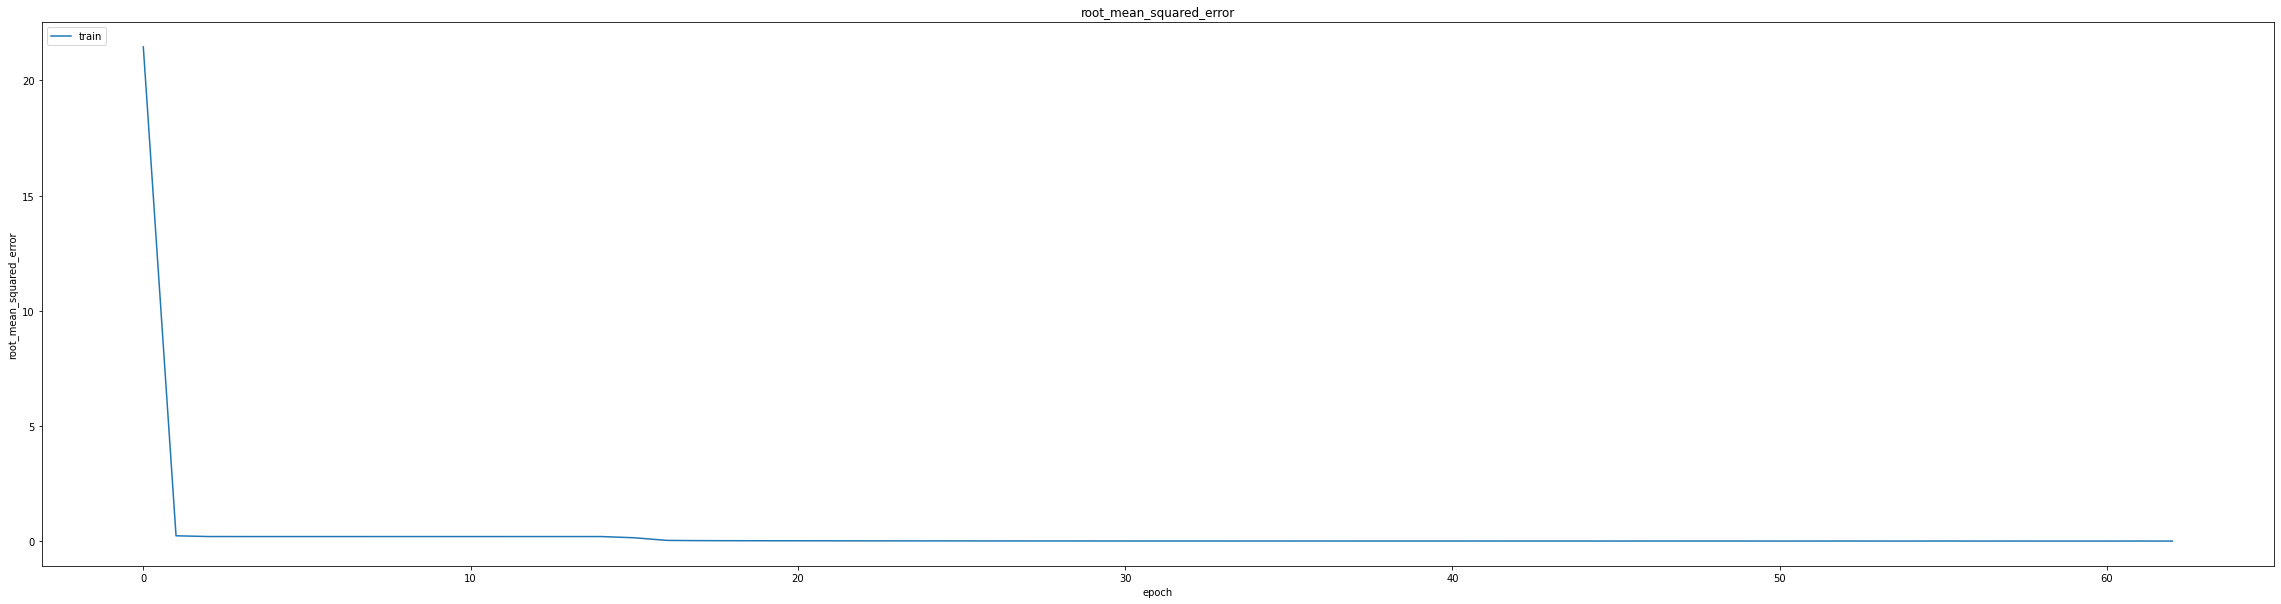

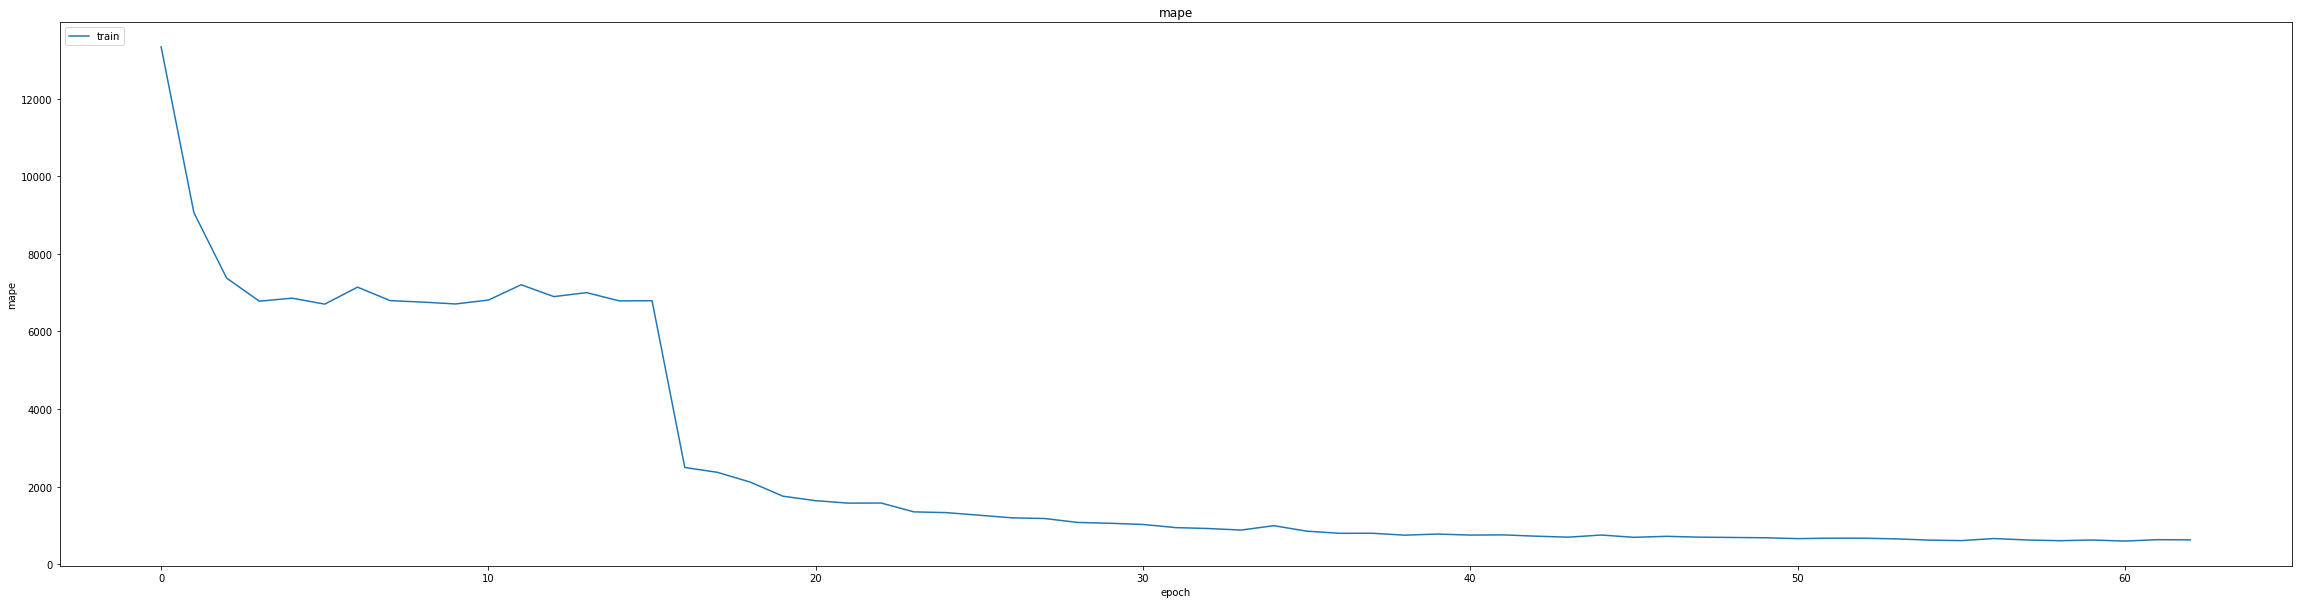

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.011026911437511444
0.011026911437511444
0.016581537202000618
234/234 [==============================] - 8s 35ms/step
0.964865575907924


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
model.load_weights("weights.best.hdf5")

In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=int(Epochs/3)
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/8
464/464 [==============================] - ETA: 0s - loss: 2.2739e-04 - mae: 0.0097 - mse: 2.2739e-04 - root_mean_squared_error: 0.0151 - mape: 1039.6770
Epoch 1: val_mse did not improve from 0.00027
464/464 [==============================] - 131s 273ms/step - loss: 2.2739e-04 - mae: 0.0097 - mse: 2.2739e-04 - root_mean_squared_error: 0.0151 - mape: 1039.6770 - val_loss: 2.8320e-04 - val_mae: 0.0116 - val_mse: 2.8320e-04 - val_root_mean_squared_error: 0.0168 - val_mape: 7453.4336 - lr: 0.0010
Epoch 2/8
464/464 [==============================] - ETA: 0s - loss: 1.0321e-04 - mae: 0.0077 - mse: 1.0321e-04 - root_mean_squared_error: 0.0102 - mape: 908.7222
Epoch 2: val_mse did not improve from 0.00027
464/464 [==============================] - 119s 256ms/step - loss: 1.0321e-04 - mae: 0.0077 - mse: 1.0321e-04 - root_mean_squared_error: 0.0102 - mape: 908.7222 - val_loss: 6.8326e-04 - val_mae: 0.0218 - val_mse: 6.8326e-04 - val_root_mean_squared_error: 0.0261 - val_mape: 7000.4341

In [ ]:
model.load_weights("weights.best.hdf5")
early_stopping = EarlyStopping(monitor='val_mse', patience=15)

from keras.callbacks import LearningRateScheduler
import keras.backend as K

def scheduler(epoch):
    if epoch%2==0 and epoch!=0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr*.9)
        print("lr changed to {}".format(lr*.9))
    return K.get_value(model.optimizer.lr)
lr_decay = LearningRateScheduler(scheduler)

callbacks_list = [checkpoint, lr_decay, early_stopping]

Epochs=10
Batch_size=128
history=thesis.CreateHistory(x_train, y_train, x_val, y_val, model, callbacks_list, Epochs, Batch_size)

Epoch 1/10
464/464 [==============================] - ETA: 0s - loss: 5.0558e-04 - mae: 0.0100 - mse: 5.0558e-04 - root_mean_squared_error: 0.0225 - mape: 786.1969
Epoch 1: val_mse did not improve from 0.00025
464/464 [==============================] - 121s 252ms/step - loss: 5.0558e-04 - mae: 0.0100 - mse: 5.0558e-04 - root_mean_squared_error: 0.0225 - mape: 786.1969 - val_loss: 3.2896e-04 - val_mae: 0.0137 - val_mse: 3.2896e-04 - val_root_mean_squared_error: 0.0181 - val_mape: 6772.3735 - lr: 0.0010
Epoch 2/10
464/464 [==============================] - ETA: 0s - loss: 5.6179e-05 - mae: 0.0057 - mse: 5.6179e-05 - root_mean_squared_error: 0.0075 - mape: 655.4675
Epoch 2: val_mse did not improve from 0.00025
464/464 [==============================] - 121s 260ms/step - loss: 5.6179e-05 - mae: 0.0057 - mse: 5.6179e-05 - root_mean_squared_error: 0.0075 - mape: 655.4675 - val_loss: 4.0787e-04 - val_mae: 0.0159 - val_mse: 4.0787e-04 - val_root_mean_squared_error: 0.0202 - val_mape: 6814.2280

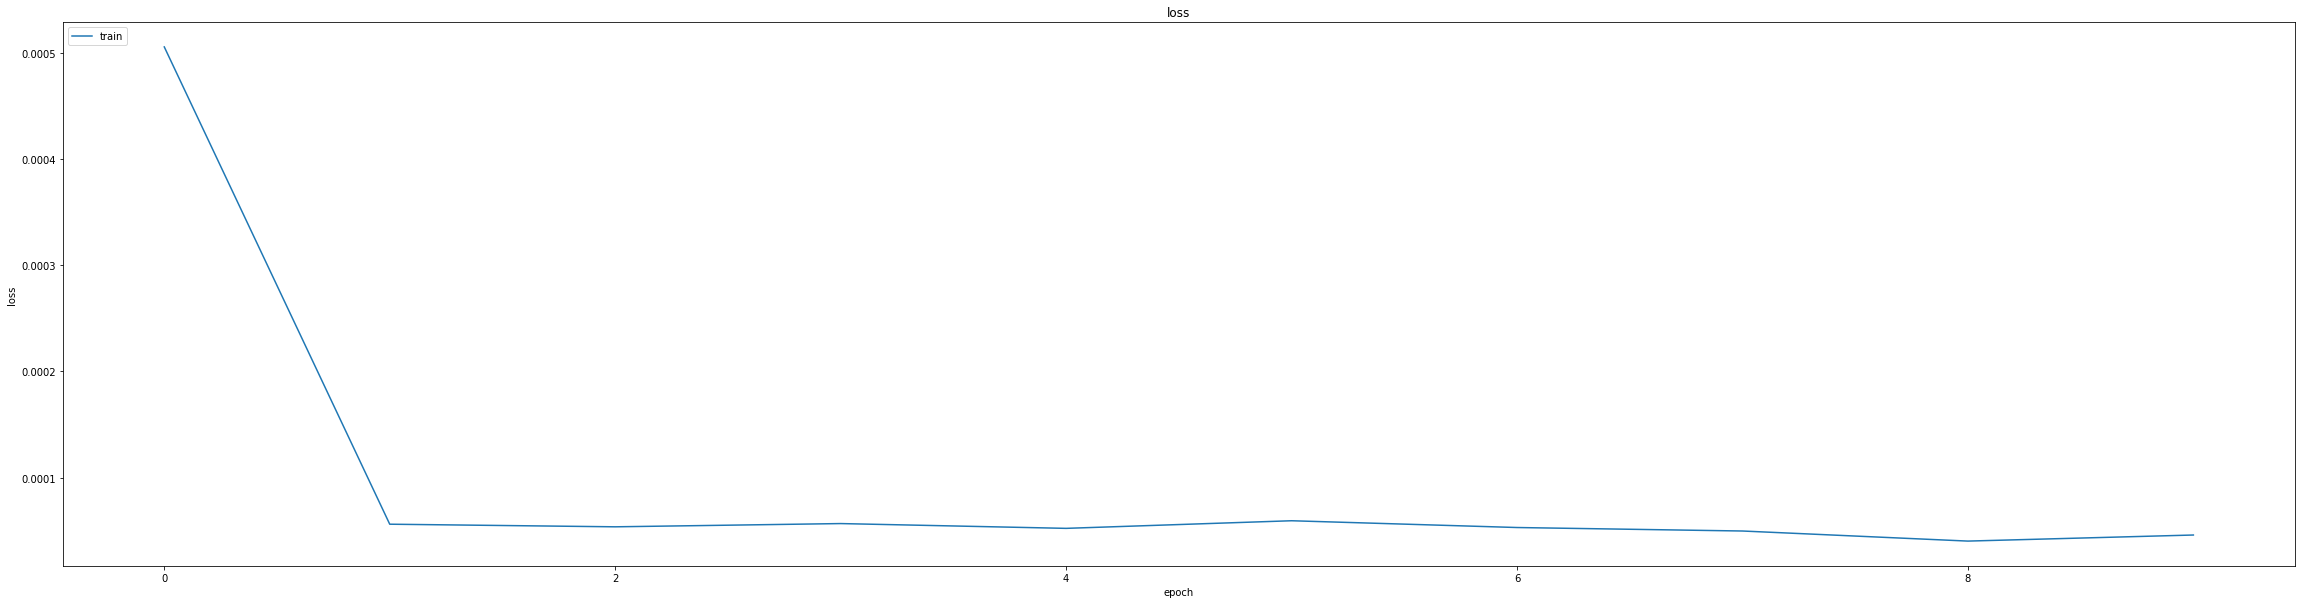

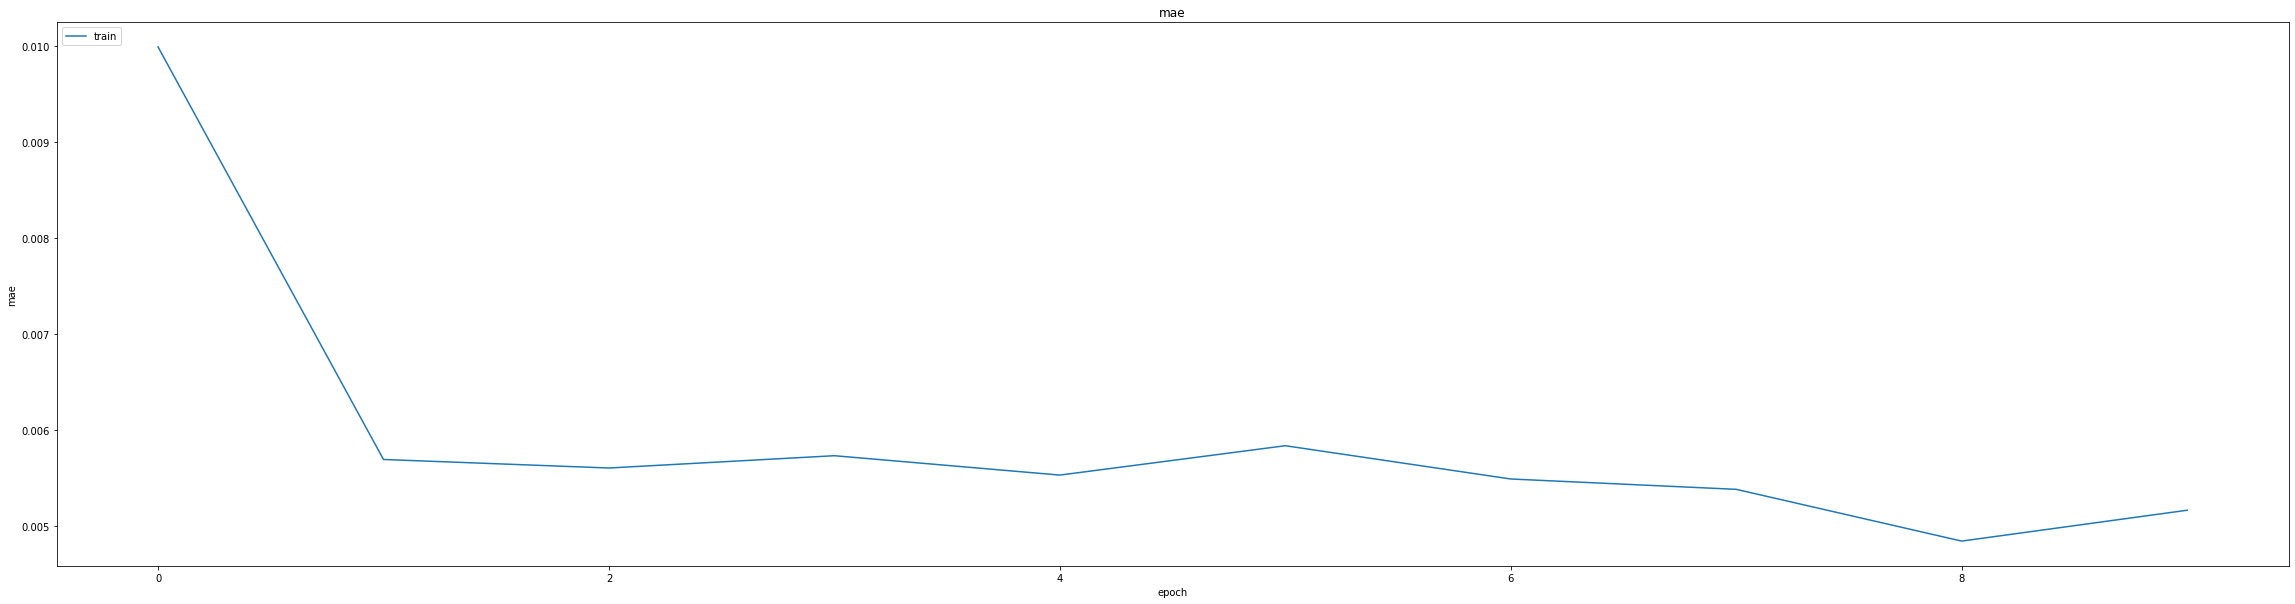

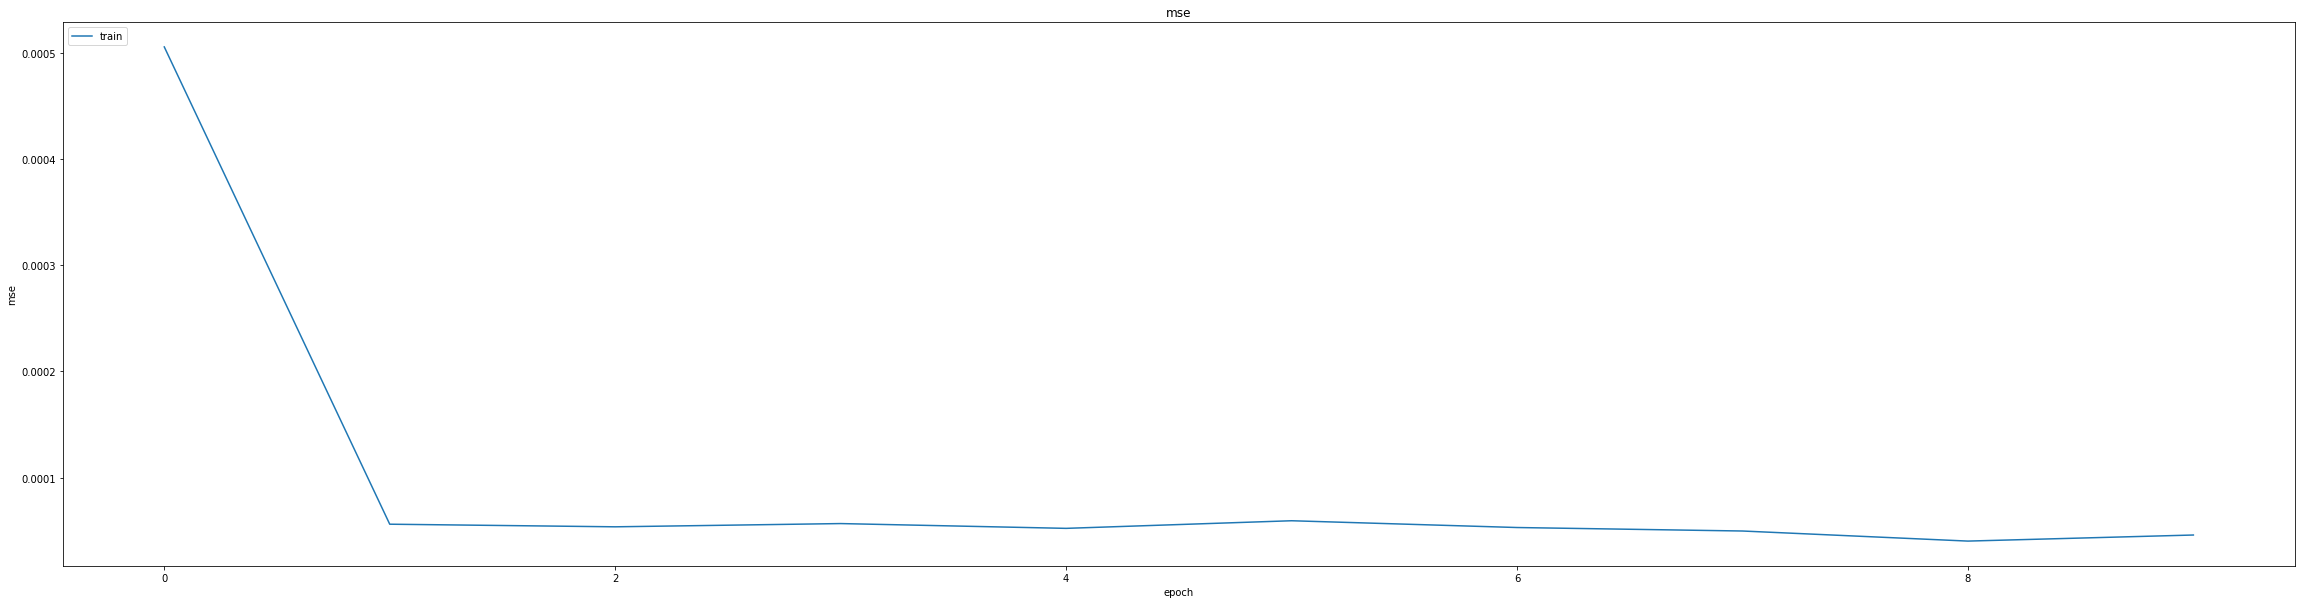

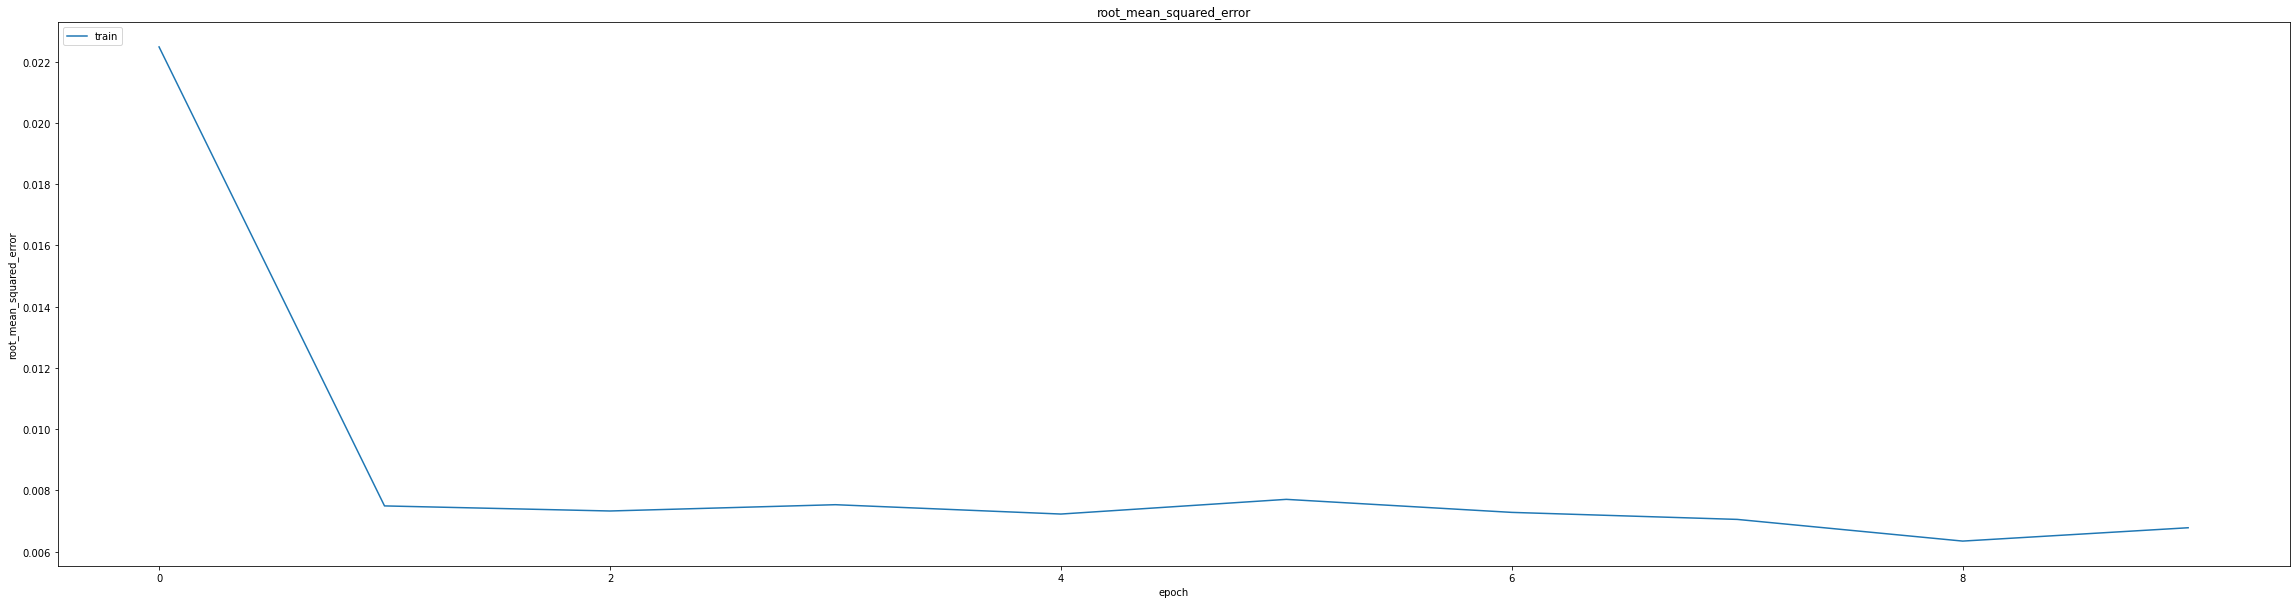

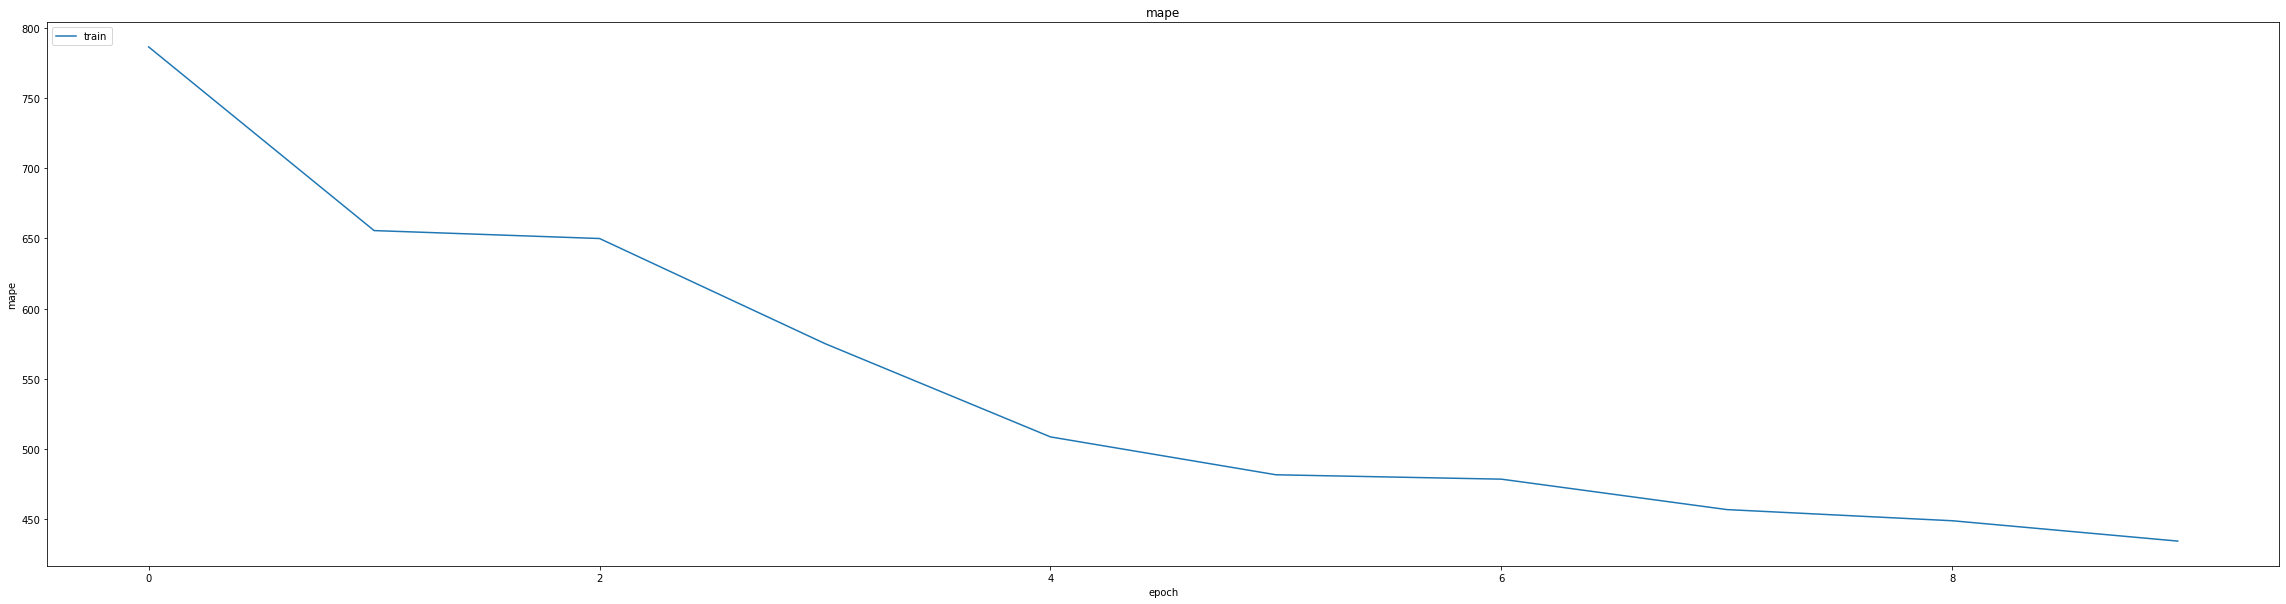

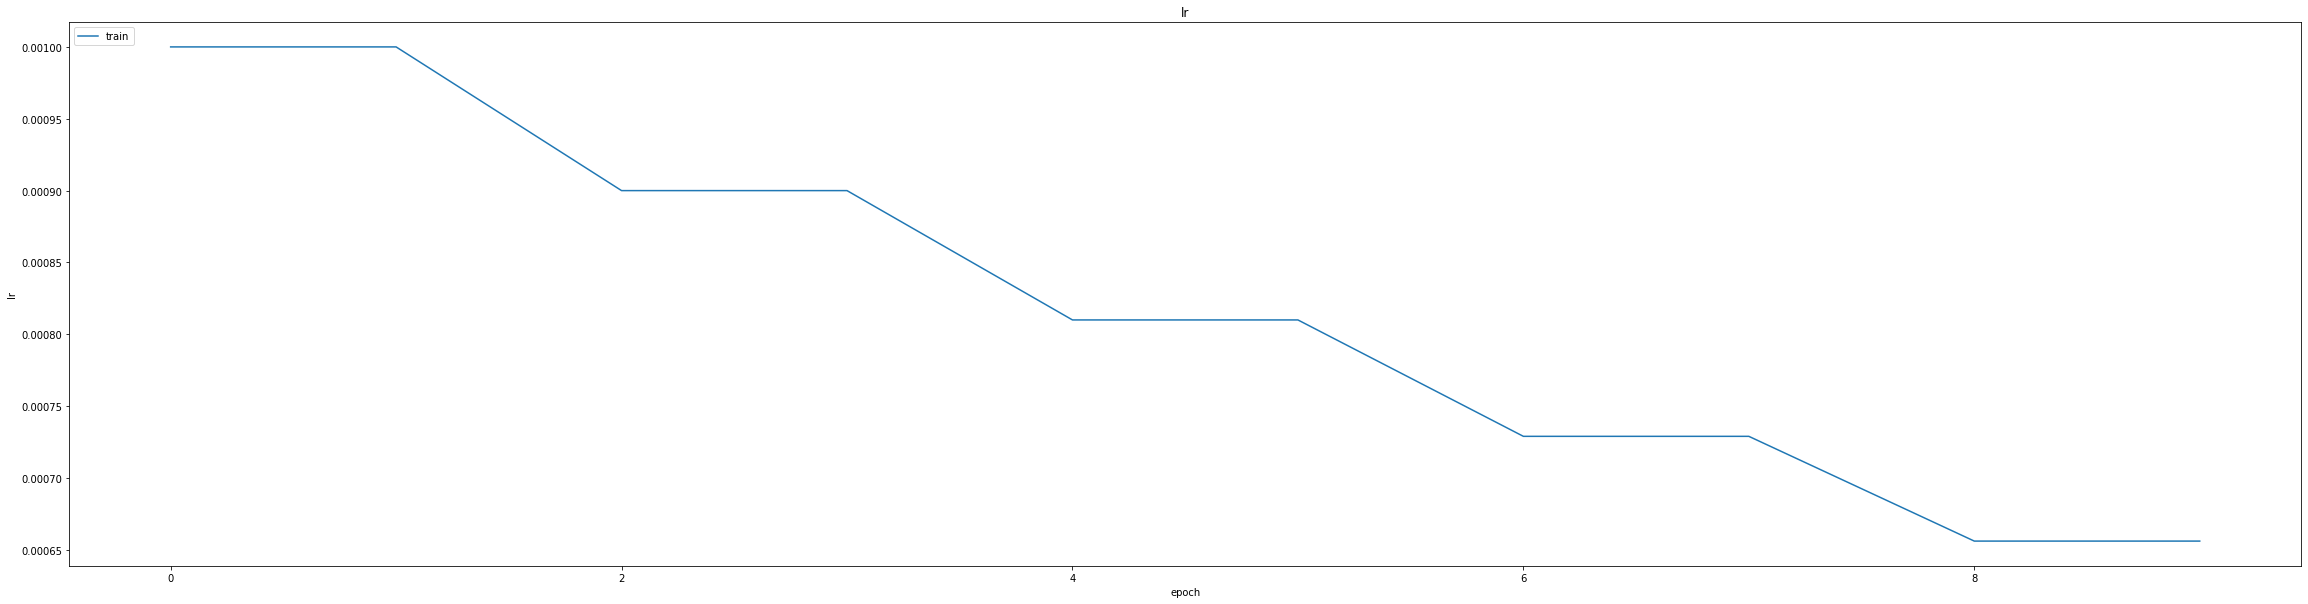

In [ ]:
thesis.SummarizeHistory(history)

In [ ]:
print(min(history.history['val_mae']))
print(min(history.history['val_mae']))
print(min(history.history['val_root_mean_squared_error']))
r2_score=thesis.R_Squared_Score(model, x_val, y_val)
print(r2_score)

0.013674579560756683
0.013674579560756683
0.01813715137541294
234/234 [==============================] - 10s 40ms/step
0.9512313210708162


In [ ]:
model.load_weights("weights.best.hdf5")

234/234 [==============================] - 8s 34ms/step


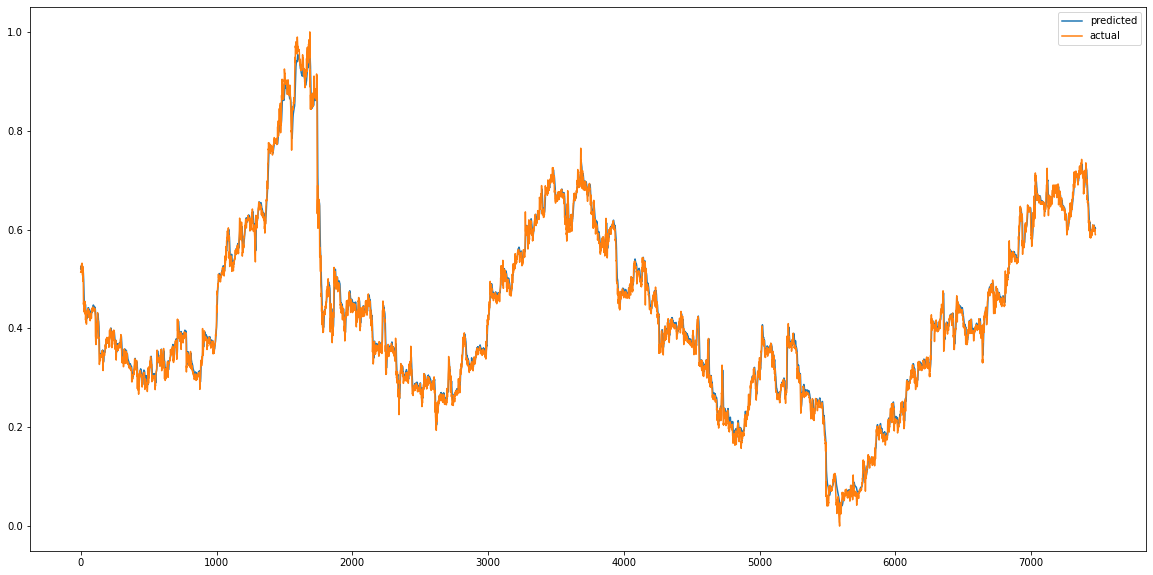

In [ ]:
val_predictions=thesis.CreatPrediction(model,x_val, y_val)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


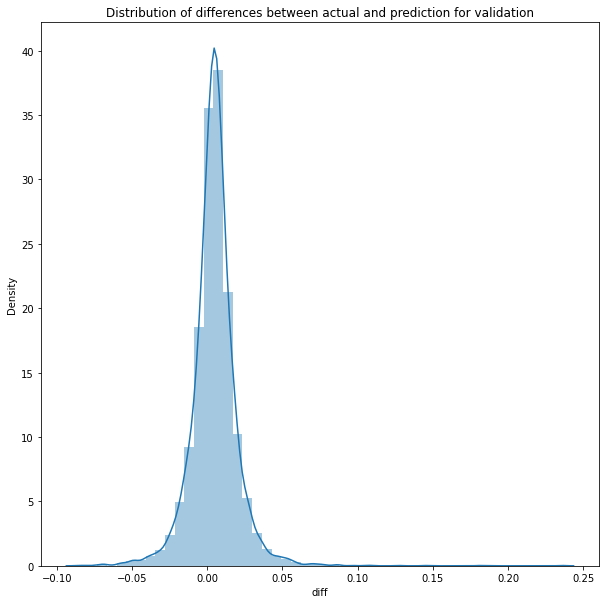

In [ ]:
val_predictions['diff'] = val_predictions['predicted'] - val_predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(val_predictions['diff']);
plt.title('Distribution of differences between actual and prediction for validation')
plt.show()

229/229 [==============================] - 9s 40ms/step


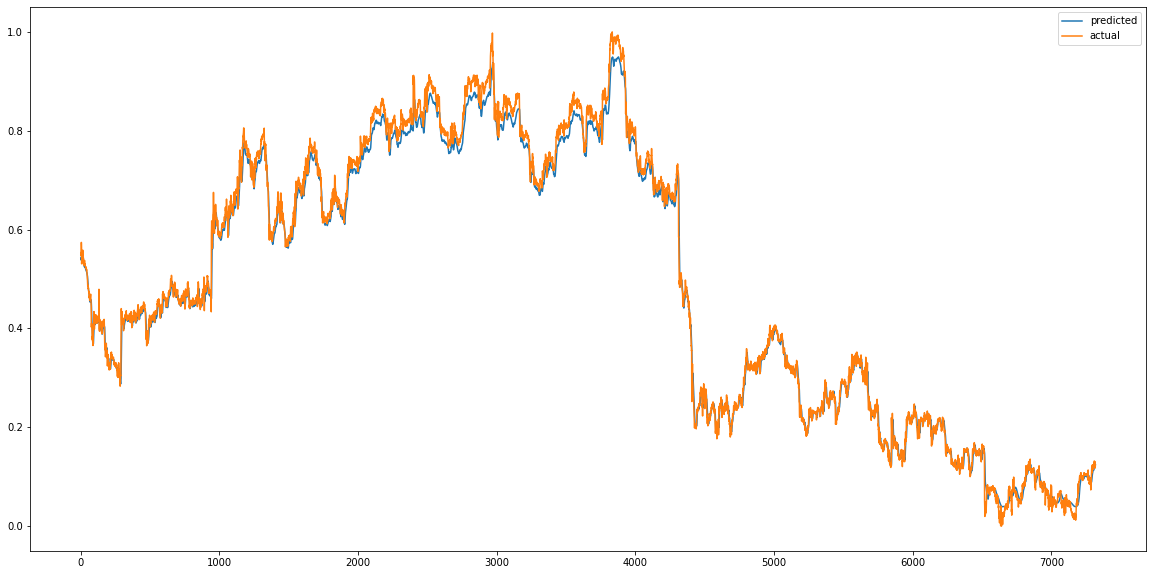

In [ ]:
predictions=thesis.CreatPrediction(model,x_test, y_test)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


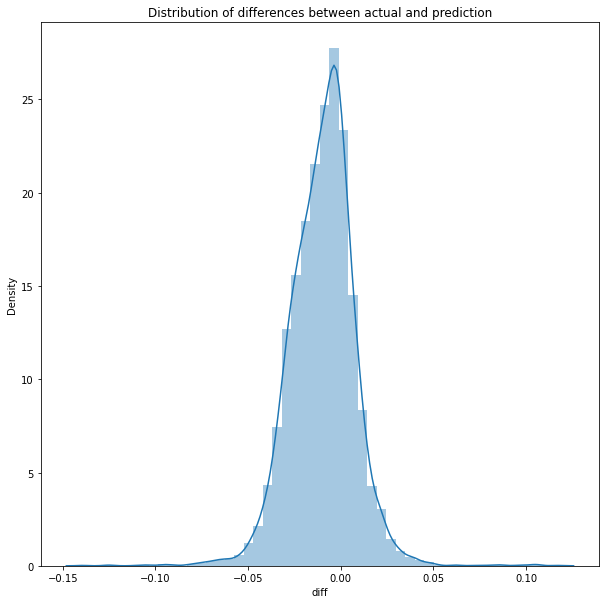

In [ ]:
predictions['diff'] = predictions['predicted'] - predictions['actual']
plt.figure(figsize=(10,10))
sns.distplot(predictions['diff']);
plt.title('Distribution of differences between actual and prediction')
plt.show()

In [ ]:
print("MSE : ", mean_squared_error(predictions['predicted'].values, predictions['actual'].values))
print("MAE : ", mean_absolute_error(predictions['predicted'].values, predictions['actual'].values))
from math import sqrt
print("RMSE : ", sqrt(mean_squared_error(predictions['predicted'].values, predictions['actual'].values)))

test_r2_score=thesis.R_Squared_Score(model, x_test, y_test)
print('R2_Score  :', r2_score)
predictions['diff'].describe()

MSE :  0.00039484553985587523
MAE :  0.014988142863671332
RMSE :  0.019870720667753226
229/229 [==============================] - 8s 34ms/step
R2_Score  : 0.9512313210708162


count    7319.000000
mean       -0.009815
std         0.017279
min        -0.139342
25%        -0.020599
50%        -0.008690
75%         0.000683
max         0.116921
Name: diff, dtype: float64